# Walmart Sales Forecast

## Overview

## Overview
This project aims to forecast weekly sales for Walmart stores using historical sales data. The goal is to build a predictive model that accurately estimates sales across various stores and departments, incorporating factors such as store characteristics, economic indicators, and promotional activities. The dataset consists of three primary components: sales transactions, store details, and additional features including economic and environmental factors.

## Dataset Description

### Train Dataset
The training dataset contains **421,570 records** with the following columns:

| Column        | Description                              | Data Type |
|---------------|------------------------------------------|-----------|
| Store         | Store identifier (1 to 45)              | int64     |
| Dept          | Department identifier (1 to 99)         | int64     |
| Date          | Date of the sales record                | object    |
| Weekly_Sales  | Weekly sales amount                    | float64   |
| IsHoliday     | Boolean indicating holiday week         | bool      |

**Summary Statistics**:

| Statistic     | Store       | Dept        | Weekly_Sales |
|---------------|-------------|-------------|--------------|
| Count         | 421,570     | 421,570     | 421,570      |
| Mean          | 22.20       | 44.26       | 15,981.26    |
| Std           | 12.79       | 30.49       | 22,711.18    |
| Min           | 1           | 1           | -4,988.94    |
| 25%           | 11          | 18          | 2,079.65     |
| 50%           | 22          | 37          | 7,612.03     |
| 75%           | 33          | 74          | 20,205.85    |
| Max           | 45          | 99          | 693,099.36   |

- **Weekly_Sales**: Highly variable with a standard deviation of $22,711.18, indicating diverse sales patterns.
- **Memory Usage**: ~13.3 MB.
- **Missing Values**: None.

### Stores Dataset
The stores dataset includes **45 records** describing store characteristics:

| Column | Description                  | Data Type |
|--------|------------------------------|-----------|
| Store  | Store identifier (1 to 45)  | int64     |
| Type   | Store type (A, B, or other) | object    |
| Size   | Store size (square feet)    | int64     |

**Summary Statistics**:

| Statistic | Store | Size        |
|-----------|-------|-------------|
| Count     | 45    | 45          |
| Mean      | 23.00 | 130,287.60  |
| Std       | 13.13 | 63,825.27   |
| Min       | 1     | 34,875      |
| 25%       | 12    | 70,713      |
| 50%       | 23    | 126,512     |
| 75%       | 34    | 202,307     |
| Max       | 45    | 219,622     |

- **Size**: Varies significantly, reflecting diverse store formats.
- **Memory Usage**: ~1.2 KB.
- **Missing Values**: None.

### Features Dataset
The features dataset contains **8,190 records** with additional variables that may influence sales:

| Column       | Description                          | Data Type |
|--------------|--------------------------------------|-----------|
| Store        | Store identifier (1 to 45)          | int64     |
| Date         | Date of the record                  | object    |
| Temperature  | Local temperature (°F)              | float64   |
| Fuel_Price   | Regional fuel price                 | float64   |
| MarkDown1–5  | Promotional markdowns               | float64   |
| CPI          | Consumer Price Index                | float64   |
| Unemployment | Unemployment rate                   | float64   |
| IsHoliday    | Boolean indicating holiday week     | bool      |

**Summary Statistics**:

| Statistic | Store | Temperature | Fuel_Price | MarkDown1 | MarkDown2 | MarkDown3 | MarkDown4 | MarkDown5 | CPI       | Unemployment |
|-----------|-------|-------------|------------|-----------|-----------|-----------|-----------|-----------|-----------|-------------|
| Count     | 8,190 | 8,190       | 8,190      | 4,032     | 2,921     | 3,613     | 3,464     | 4,050     | 7,605     | 7,605       |
| Mean      | 23.00 | 59.36       | 3.41       | 7,032.37  | 3,384.18  | 1,760.10  | 3,292.94  | 4,132.22  | 172.46    | 7.83        |
| Std       | 12.99 | 18.68       | 0.43       | 9,262.75  | 8,793.58  | 11,276.46 | 6,792.33  | 13,086.69 | 39.74     | 1.88        |
| Min       | 1     | -7.29       | 2.47       | -2,781.45 | -265.76   | -179.26   | 0.22      | -185.17   | 126.06    | 3.68        |
| 25%       | 12    | 45.90       | 3.04       | 1,577.53  | 68.88     | 6.60      | 304.69    | 1,440.83  | 132.36    | 6.63        |
| 50%       | 23    | 60.71       | 3.51       | 4,743.58  | 364.57    | 36.26     | 1,176.43  | 2,727.14  | 182.76    | 7.81        |
| 75%       | 34    | 73.88       | 3.74       | 8,923.31  | 2,153.35  | 163.15    | 3,310.01  | 4,832.56  | 213.93    | 8.57        |
| Max       | 45    | 101.95      | 4.47       | 103,184.98| 104,519.54| 149,483.31| 67,474.85 | 771,448.10| 228.98    | 14.31       |

- **MarkDowns**: Significant missing values (~50–65%) and high variability (e.g., MarkDown5 max $771,448.10).
- **Memory Usage**: ~712.0 KB.
- **Missing Values**: Notable in MarkDown1 (270,889), MarkDown2 (310,322), MarkDown3 (284,479), MarkDown4 (286,603), MarkDown5 (270,138), CPI (585), and Unemployment (585).



---

## Imports
Import all necessary Python libraries here.

---


In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import pearsonr, spearmanr, kendalltau, f_oneway
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import time
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import OrdinalEncoder

---

## Load and Inspect Data
Load your dataset and take a first look at its structure.

---


In [2]:
train_data = pd.read_csv('/kaggle/input/walmart-sales-forecast/train.csv')
stores_data = pd.read_csv('/kaggle/input/walmart-sales-forecast/stores.csv')
features_data = pd.read_csv('/kaggle/input/walmart-sales-forecast/features.csv')

# Add data integrity checks
print("Data Shapes:")
print(f"Train: {train_data.shape}, Stores: {stores_data.shape}, Features: {features_data.shape}")
print("\nDate Ranges:")
print(f"Train: {train_data['Date'].min()} to {train_data['Date'].max()}")
print(f"Features: {features_data['Date'].min()} to {features_data['Date'].max()}")

# Check for duplicate keys
assert train_data[['Store', 'Dept', 'Date']].duplicated().sum() == 0, "Duplicate records in train!"
assert stores_data['Store'].duplicated().sum() == 0, "Duplicate stores!"

Data Shapes:
Train: (421570, 5), Stores: (45, 3), Features: (8190, 12)

Date Ranges:
Train: 2010-02-05 to 2012-10-26
Features: 2010-02-05 to 2013-07-26


In [3]:
print("Train shape:\n")
print(train_data.shape )
print("\n\nTrain head:\n")
print(train_data.head() )
print("\n\nTrain Info:\n")
print(train_data.info() )
print("\n\nTrain Stats:\n")
print(train_data.describe() )

Train shape:

(421570, 5)


Train head:

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False


Train Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None


Train Stats:

               Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.20054

In [4]:
print(" Stores shape:\n")
print(stores_data.shape )
print("\n\n Stores head:\n")
print(stores_data.head() )
print("\n\n Stores Info:\n")
print(stores_data.info() )
print("\n\n Stores Stats:\n")
print(stores_data.describe() )

 Stores shape:

(45, 3)


 Stores head:

   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875


 Stores Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None


 Stores Stats:

           Store           Size
count  45.000000      45.000000
mean   23.000000  130287.600000
std    13.133926   63825.271991
min     1.000000   34875.000000
25%    12.000000   70713.000000
50%    23.000000  126512.000000
75%    34.000000  202307.000000
max    45.000000  219622.000000


In [6]:
print(" Features shape:\n")
print(features_data.shape )
print("\n\n Features head:\n")
print(features_data.head() )
print("\n\n Features Info:\n")
print(features_data.info() )
print("\n\n Features Stats:\n")
print(features_data.describe() )

 Features shape:

(8190, 12)


 Features head:

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  


 Features Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries

### Merging Data

In [5]:
# Merge with validation
Train_Stores_merge = train_data.merge(stores_data, on='Store', how='left', indicator=True)
assert (Train_Stores_merge['_merge'] == 'both').all(), "Some stores in train not in stores_data!"
Train_Stores_merge = Train_Stores_merge.drop('_merge', axis=1)

# Merge features with tracking
data = Train_Stores_merge.merge(features_data, on=['Store', 'Date'], how='left', indicator=True)
merge_stats = data['_merge'].value_counts()
print("Merge Statistics:")
print(merge_stats)
print(f"\nRows without feature data: {(data['_merge'] == 'left_only').sum()}")

data = data.drop('_merge', axis=1)

# Handle IsHoliday duplicates
if 'IsHoliday_x' in data.columns and 'IsHoliday_y' in data.columns:
    mismatch = (data['IsHoliday_x'] != data['IsHoliday_y']).sum()
    if mismatch > 0:
        print(f"WARNING: {mismatch} rows have mismatched IsHoliday values!")
    data['IsHoliday'] = data['IsHoliday_x'] | data['IsHoliday_y']  # Use OR logic
    data = data.drop(['IsHoliday_x', 'IsHoliday_y'], axis=1)

Merge Statistics:
_merge
both          421570
left_only          0
right_only         0
Name: count, dtype: int64

Rows without feature data: 0


In [6]:
print("\n" + "="*60)
print("CREATING HOLIDAY-SPECIFIC FEATURES")
print("="*60)

# Holiday calendar mapping
holiday_map = {
    '2010-02-12': 'Super_Bowl', '2011-02-11': 'Super_Bowl', '2012-02-10': 'Super_Bowl',
    '2010-09-10': 'Labor_Day', '2011-09-09': 'Labor_Day', '2012-09-07': 'Labor_Day',
    '2010-11-26': 'Thanksgiving', '2011-11-25': 'Thanksgiving', '2012-11-23': 'Thanksgiving',
    '2010-12-31': 'Christmas', '2011-12-30': 'Christmas', '2012-12-28': 'Christmas'
}

data['Holiday_Type'] = data['Date'].astype(str).map(holiday_map).fillna('None')

# Create binary indicators for each holiday
data['Is_SuperBowl'] = (data['Holiday_Type'] == 'Super_Bowl').astype(int)
data['Is_Thanksgiving'] = (data['Holiday_Type'] == 'Thanksgiving').astype(int)
data['Is_Christmas'] = (data['Holiday_Type'] == 'Christmas').astype(int)

print(f"✓ Created 3 holiday-specific indicators")
print(f"  Super Bowl weeks: {data['Is_SuperBowl'].sum()}")
print(f"  Thanksgiving weeks: {data['Is_Thanksgiving'].sum()}")
print(f"  Christmas weeks: {data['Is_Christmas'].sum()}")


CREATING HOLIDAY-SPECIFIC FEATURES
✓ Created 3 holiday-specific indicators
  Super Bowl weeks: 8895
  Thanksgiving weeks: 5959
  Christmas weeks: 5946


In [7]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Quarter'] = data['Date'].dt.quarter
data['Week'] = data['Date'].dt.isocalendar().week
data['DayOfWeek'] = data['Date'].dt.dayofweek  # 0=Monday, 6=Sunday
data['IsWeekend'] = (data['DayOfWeek'] >= 5).astype(int)

# Remove Day - it's not useful
# data['Day'] = data['Date'].dt.day  # DON'T DO THIS

# Add cyclical encoding immediately
data['Month_sin'] = np.sin(2 * np.pi * data['Month'] / 12)
data['Month_cos'] = np.cos(2 * np.pi * data['Month'] / 12)
data['Week_sin'] = np.sin(2 * np.pi * data['Week'] / 52)
data['Week_cos'] = np.cos(2 * np.pi * data['Week'] / 52)
data['DayOfWeek_sin'] = np.sin(2 * np.pi * data['DayOfWeek'] / 7)
data['DayOfWeek_cos'] = np.cos(2 * np.pi * data['DayOfWeek'] / 7)

In [8]:
missing_summary = pd.DataFrame({
    'Missing_Count': data.isnull().sum(),
    'Missing_Percent': (data.isnull().sum() / len(data) * 100).round(2)
})
missing_summary = missing_summary[missing_summary['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print("Missing Value Summary:")
print(missing_summary)

# Analyze markdown missing patterns
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
data['Any_Markdown_Missing'] = data[markdown_cols].isnull().all(axis=1)
data['All_Markdown_Missing'] = data[markdown_cols].isnull().all(axis=1)

print(f"\nMarkdown Patterns:")
print(f"Weeks with ALL markdowns missing: {data['All_Markdown_Missing'].sum()} ({data['All_Markdown_Missing'].mean()*100:.1f}%)")
print(f"Weeks with ANY markdown present: {(~data['All_Markdown_Missing']).sum()} ({(~data['All_Markdown_Missing']).mean()*100:.1f}%)")

Missing Value Summary:
           Missing_Count  Missing_Percent
MarkDown2         310322            73.61
MarkDown4         286603            67.98
MarkDown3         284479            67.48
MarkDown1         270889            64.26
MarkDown5         270138            64.08

Markdown Patterns:
Weeks with ALL markdowns missing: 270138 (64.1%)
Weeks with ANY markdown present: 151432 (35.9%)


In [9]:
data.describe()

Store           Dept                           Date  \
count  421570.000000  421570.000000                         421570   
mean       22.200546      44.260317  2011-06-18 08:30:31.963375104   
min         1.000000       1.000000            2010-02-05 00:00:00   
25%        11.000000      18.000000            2010-10-08 00:00:00   
50%        22.000000      37.000000            2011-06-17 00:00:00   
75%        33.000000      74.000000            2012-02-24 00:00:00   
max        45.000000      99.000000            2012-10-26 00:00:00   
std        12.785297      30.492054                            NaN   

        Weekly_Sales           Size    Temperature     Fuel_Price  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean    15981.258123  136727.915739      60.090059       3.361027   
min     -4988.940000   34875.000000      -2.060000       2.472000   
25%      2079.650000   93638.000000      46.680000       2.933000   
50%      7612.030000  140167.000000      62.090000       3.452000   
75%     20205.852500  202505.000000      74.280000       3.738000   
max    693099.360000  219622.000000     100.140000       4.468000   
std     22711.183519   60980.583328      18.447931       0.458515   

           MarkDown1      MarkDown2      MarkDown3  ...        Quarter  \
count  150681.000000  111248.000000  137091.000000  ...  421570.000000   
mean     7246.420196    3334.628621    1439.421384  ...       2.482767   
min         0.270000    -265.760000     -29.100000  ...       1.000000   
25%      2240.270000      41.600000       5.080000  ...       2.000000   
50%      5347.450000     192.000000      24.600000  ...       2.000000   
75%      9210.900000    1926.940000     103.990000  ...       3.000000   
max     88646.760000  104519.540000  141630.610000  ...       4.000000   
std      8291.221345    9475.357325    9623.078290  ...       1.071341   

            Week  DayOfWeek  IsWeekend     Month_sin     Month_cos  Week_sin  \
count   421570.0   421570.0   421570.0  4.215700e+05  4.215700e+05  421570.0   
mean   25.826762        4.0        0.0 -5.863343e-03 -8.628227e-02  0.020117   
min          1.0        4.0        0.0 -1.000000e+00 -1.000000e+00      -1.0   
25%         14.0        4.0        0.0 -8.660254e-01 -8.660254e-01 -0.748511   
50%         26.0        4.0        0.0  1.224647e-16 -1.836970e-16       0.0   
75%         38.0        4.0        0.0  8.660254e-01  5.000000e-01  0.748511   
max         52.0        4.0        0.0  1.000000e+00  1.000000e+00       1.0   
std    14.151887        0.0        0.0  7.267859e-01  6.813997e-01  0.725049   

       Week_cos  DayOfWeek_sin  DayOfWeek_cos  
count  421570.0   4.215700e+05   4.215700e+05  
mean  -0.076954  -4.338837e-01  -9.009689e-01  
min        -1.0  -4.338837e-01  -9.009689e-01  
25%   -0.748511  -4.338837e-01  -9.009689e-01  
50%   -0.120537  -4.338837e-01  -9.009689e-01  
75%    0.568065  -4.338837e-01  -9.009689e-01  
max         1.0  -4.338837e-01  -9.009689e-01  
std     0.68409   3.602012e-12   5.369156e-12  

[8 rows x 29 columns]

---

## Data Cleaning
Clean the data by handling missing values, duplicates, or formatting issues.

---


In [10]:
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# FIRST: Extract information from missingness pattern
data['Promo_Active'] = (~data[markdown_cols].isnull().all(axis=1)).astype(int)
data['Promo_Count'] = data[markdown_cols].notna().sum(axis=1)

# Create individual markdown indicators
for col in markdown_cols:
    data[f'{col}_Active'] = data[col].notna().astype(int)

# THEN: Fill with 0 (now we've preserved the "no promo" signal)
data[markdown_cols] = data[markdown_cols].fillna(0)

# Create total markdown feature
data['Total_Markdown'] = data[markdown_cols].sum(axis=1)
data['Avg_Markdown'] = data['Total_Markdown'] / data['Promo_Count'].replace(0, 1)

print(f"Promotion Coverage: {data['Promo_Active'].mean()*100:.1f}% of weeks have active promotions")

Promotion Coverage: 35.9% of weeks have active promotions


In [11]:
print("\n" + "="*60)
print("HANDLING CPI/UNEMPLOYMENT + TARGET TRANSFORMATION")
print("="*60)

# ========================================
# 1. CPI & Unemployment - Store-specific filling
# ========================================
print("\nHandling CPI and Unemployment missing values...")

data['CPI'] = data.groupby('Store')['CPI'].transform(lambda x: x.fillna(x.median()))
data['Unemployment'] = data.groupby('Store')['Unemployment'].transform(lambda x: x.fillna(x.median()))

data['CPI'] = data['CPI'].fillna(data['CPI'].median())
data['Unemployment'] = data['Unemployment'].fillna(data['Unemployment'].median())

print(f"✓ CPI missing: {data['CPI'].isnull().sum()}")
print(f"✓ Unemployment missing: {data['Unemployment'].isnull().sum()}")

# ========================================
# 2. Extract Return Information
# ========================================
print("\nExtracting return information...")

data['Returns_Week'] = (data['Weekly_Sales'] < 0).astype(int)
data['Return_Amount'] = data['Weekly_Sales'].clip(upper=0).abs()
data['Gross_Sales'] = data['Weekly_Sales'].clip(lower=0)

print(f"✓ Weeks with returns: {data['Returns_Week'].sum()}")

# ========================================
# 3. IMPROVED Target Transformation
# ========================================
print("\nApplying log transformation (more stable than Box-Cox)...")

# Use log1p (log(x+1)) - more stable and interpretable
data['Sales_Log'] = np.log1p(data['Gross_Sales'])

print(f"✓ Original skewness: {stats.skew(data['Gross_Sales']):.3f}")
print(f"✓ Log-transformed skewness: {stats.skew(data['Sales_Log']):.3f}")
print(f"✓ Original mean: ${data['Gross_Sales'].mean():,.2f}")
print(f"✓ Log mean: {data['Sales_Log'].mean():.3f}")

# Check for any invalid values
if data['Sales_Log'].isnull().any() or np.isinf(data['Sales_Log']).any():
    print("⚠️  WARNING: Found NaN or Inf in transformed data!")
    print(f"   NaN count: {data['Sales_Log'].isnull().sum()}")
    print(f"   Inf count: {np.isinf(data['Sales_Log']).sum()}")
else:
    print("✓ No invalid values in transformed target")

print("✓ Target preprocessing complete")


HANDLING CPI/UNEMPLOYMENT + TARGET TRANSFORMATION

Handling CPI and Unemployment missing values...
✓ CPI missing: 0
✓ Unemployment missing: 0

Extracting return information...
✓ Weeks with returns: 1285

Applying log transformation (more stable than Box-Cox)...
✓ Original skewness: 3.262
✓ Log-transformed skewness: -1.291
✓ Original mean: $15,981.47
✓ Log mean: 8.501
✓ No invalid values in transformed target
✓ Target preprocessing complete


In [12]:
# Check for duplicates on natural key
key_duplicates = data.duplicated(subset=['Store', 'Dept', 'Date']).sum()
print(f"Duplicate Store-Dept-Date combinations: {key_duplicates}")

if key_duplicates > 0:
    print("\nExample duplicates:")
    dup_mask = data.duplicated(subset=['Store', 'Dept', 'Date'], keep=False)
    print(data[dup_mask].sort_values(['Store', 'Dept', 'Date']).head(10))
    
    # Remove duplicates (keep first occurrence)
    data = data.drop_duplicates(subset=['Store', 'Dept', 'Date'], keep='first')
    print(f"Removed {key_duplicates} duplicates")

Duplicate Store-Dept-Date combinations: 0


---

## Exploratory Data Analysis (EDA)
Visualize and summarize the data to uncover patterns and insights.

---


In [13]:
plt.style.use('default')
sns.set_palette("husl")

print("DATASET ANALYSIS")
print("="*60)
print("Dataset Info:")
print(f"Shape: {data.shape}")
print(f"Columns: {list(data.columns)}")
print("\nColumn Types:")
print(data.dtypes)
print("="*60)

if 'loan_id' in data.columns:
    data_clean = data.drop('loan_id', axis=1)
    print("Dropped 'loan_id' column")
else:
    data_clean = data.copy()
    print("No 'loan_id' column found, using all columns")

categorical_columns = []
numerical_columns = []

for col in data_clean.columns:
    if data_clean[col].dtype == 'object':
        categorical_columns.append(col)
    else:
        numerical_columns.append(col)

print(f"\nAuto-detected columns:")
print(f"Categorical columns ({len(categorical_columns)}): {categorical_columns}")
print(f"Numerical columns ({len(numerical_columns)}): {numerical_columns}")
print("="*60)

DATASET ANALYSIS
Dataset Info:
Shape: (421570, 47)
Columns: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'Type', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'Holiday_Type', 'Is_SuperBowl', 'Is_Thanksgiving', 'Is_Christmas', 'Year', 'Month', 'Quarter', 'Week', 'DayOfWeek', 'IsWeekend', 'Month_sin', 'Month_cos', 'Week_sin', 'Week_cos', 'DayOfWeek_sin', 'DayOfWeek_cos', 'Any_Markdown_Missing', 'All_Markdown_Missing', 'Promo_Active', 'Promo_Count', 'MarkDown1_Active', 'MarkDown2_Active', 'MarkDown3_Active', 'MarkDown4_Active', 'MarkDown5_Active', 'Total_Markdown', 'Avg_Markdown', 'Returns_Week', 'Return_Amount', 'Gross_Sales', 'Sales_Log']

Column Types:
Store                            int64
Dept                             int64
Date                    datetime64[ns]
Weekly_Sales                   float64
Type                            object
Size                             int64
Temperature     

Selected numerical columns: ['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Is_SuperBowl', 'Is_Thanksgiving', 'Is_Christmas', 'IsWeekend', 'Month_sin', 'Month_cos', 'DayOfWeek_sin', 'DayOfWeek_cos', 'Promo_Active', 'Promo_Count', 'MarkDown1_Active', 'MarkDown2_Active', 'MarkDown3_Active', 'MarkDown4_Active', 'MarkDown5_Active', 'Total_Markdown', 'Avg_Markdown', 'Returns_Week', 'Return_Amount', 'Gross_Sales', 'Sales_Log']


NUMERICAL COLUMNS ANALYSIS
----------------------------------------


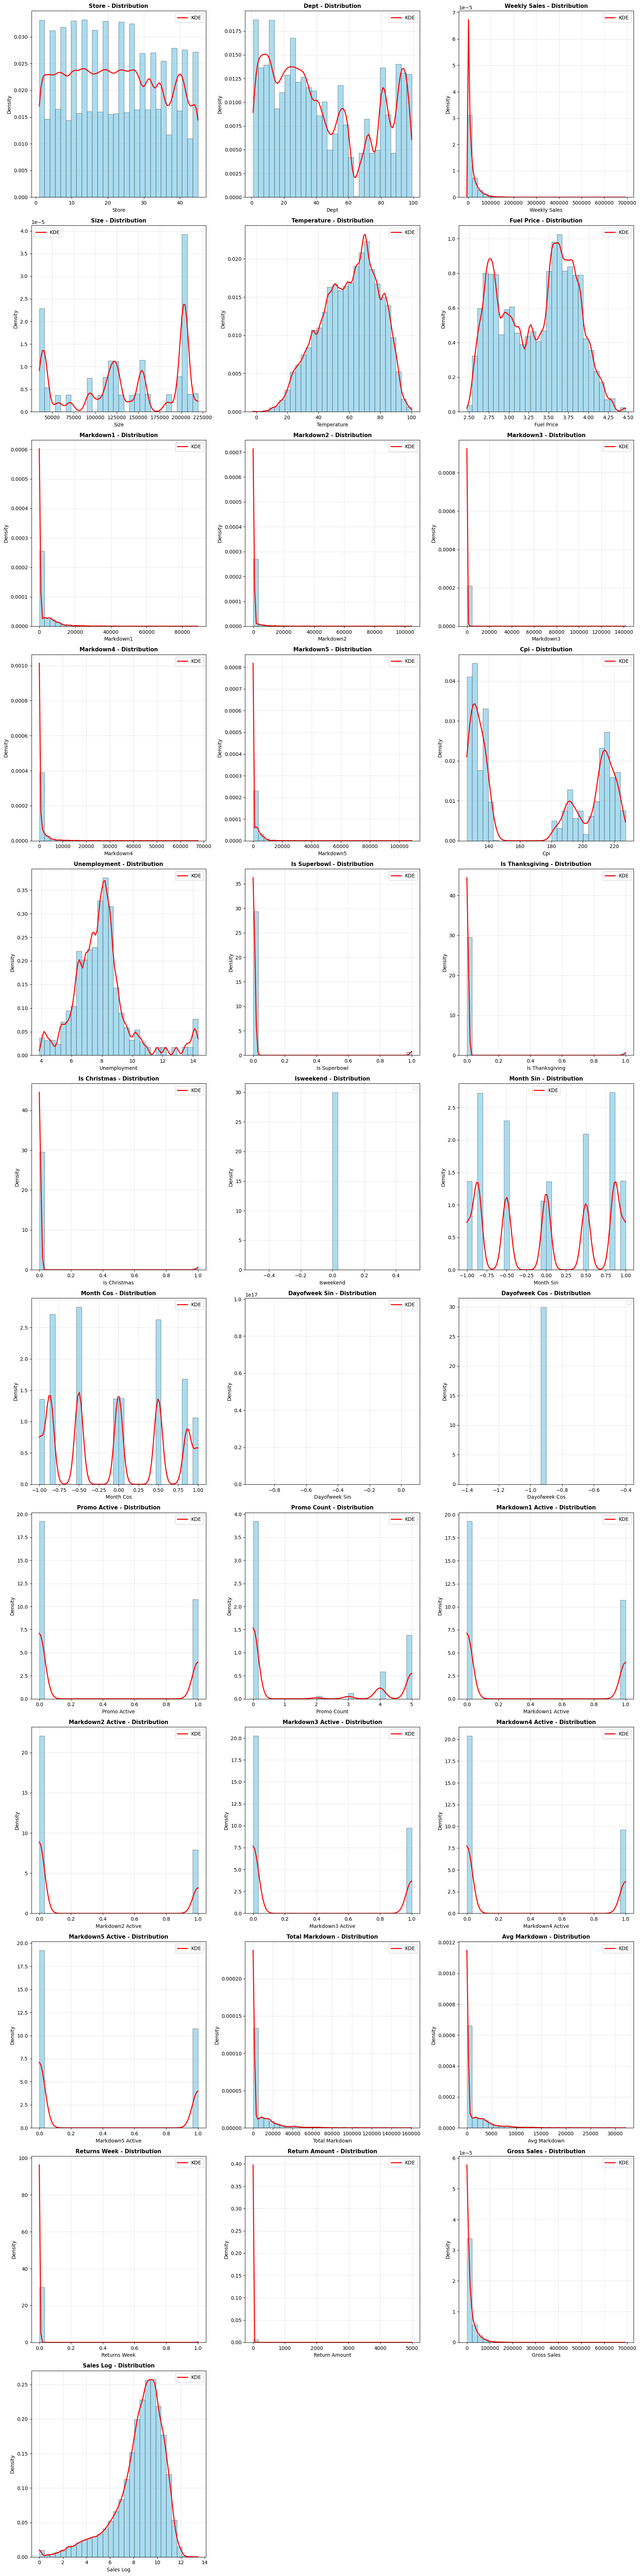

In [16]:
numerical_columns = [col for col in data_clean.columns 
                    if data_clean[col].dtype in ['int64', 'float64']]

print("Selected numerical columns:", numerical_columns)

if len(numerical_columns) > 0:
    print("\n\nNUMERICAL COLUMNS ANALYSIS")
    print("-" * 40)
    
    n_num_cols = len(numerical_columns)
    num_rows = (n_num_cols + 2) // 3
    num_cols = 3
    
    # Histograms
    fig_hist, axes_hist = plt.subplots(num_rows, num_cols, figsize=(18, 6*num_rows))    
    axes_hist = axes_hist.flatten() if n_num_cols > 1 else [axes_hist]
    
    for i, col in enumerate(numerical_columns):
        if i < len(axes_hist):
            axes_hist[i].hist(data_clean[col], bins=30, alpha=0.7, color='skyblue', 
                             density=True, edgecolor='black', linewidth=0.5)
            
            try:
                kde_x = np.linspace(data_clean[col].min(), data_clean[col].max(), 100)
                kde = stats.gaussian_kde(data_clean[col])
                axes_hist[i].plot(kde_x, kde(kde_x), color='red', linewidth=2, label='KDE')
            except:
                pass
            
            axes_hist[i].set_title(f'{col.title().replace("_", " ")} - Distribution', 
                                  fontweight='bold', fontsize=11)
            axes_hist[i].set_xlabel(col.title().replace("_", " "))
            axes_hist[i].set_ylabel('Density')
            axes_hist[i].grid(True, alpha=0.3)
            axes_hist[i].legend()
    
    for i in range(n_num_cols, len(axes_hist)):
        axes_hist[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    

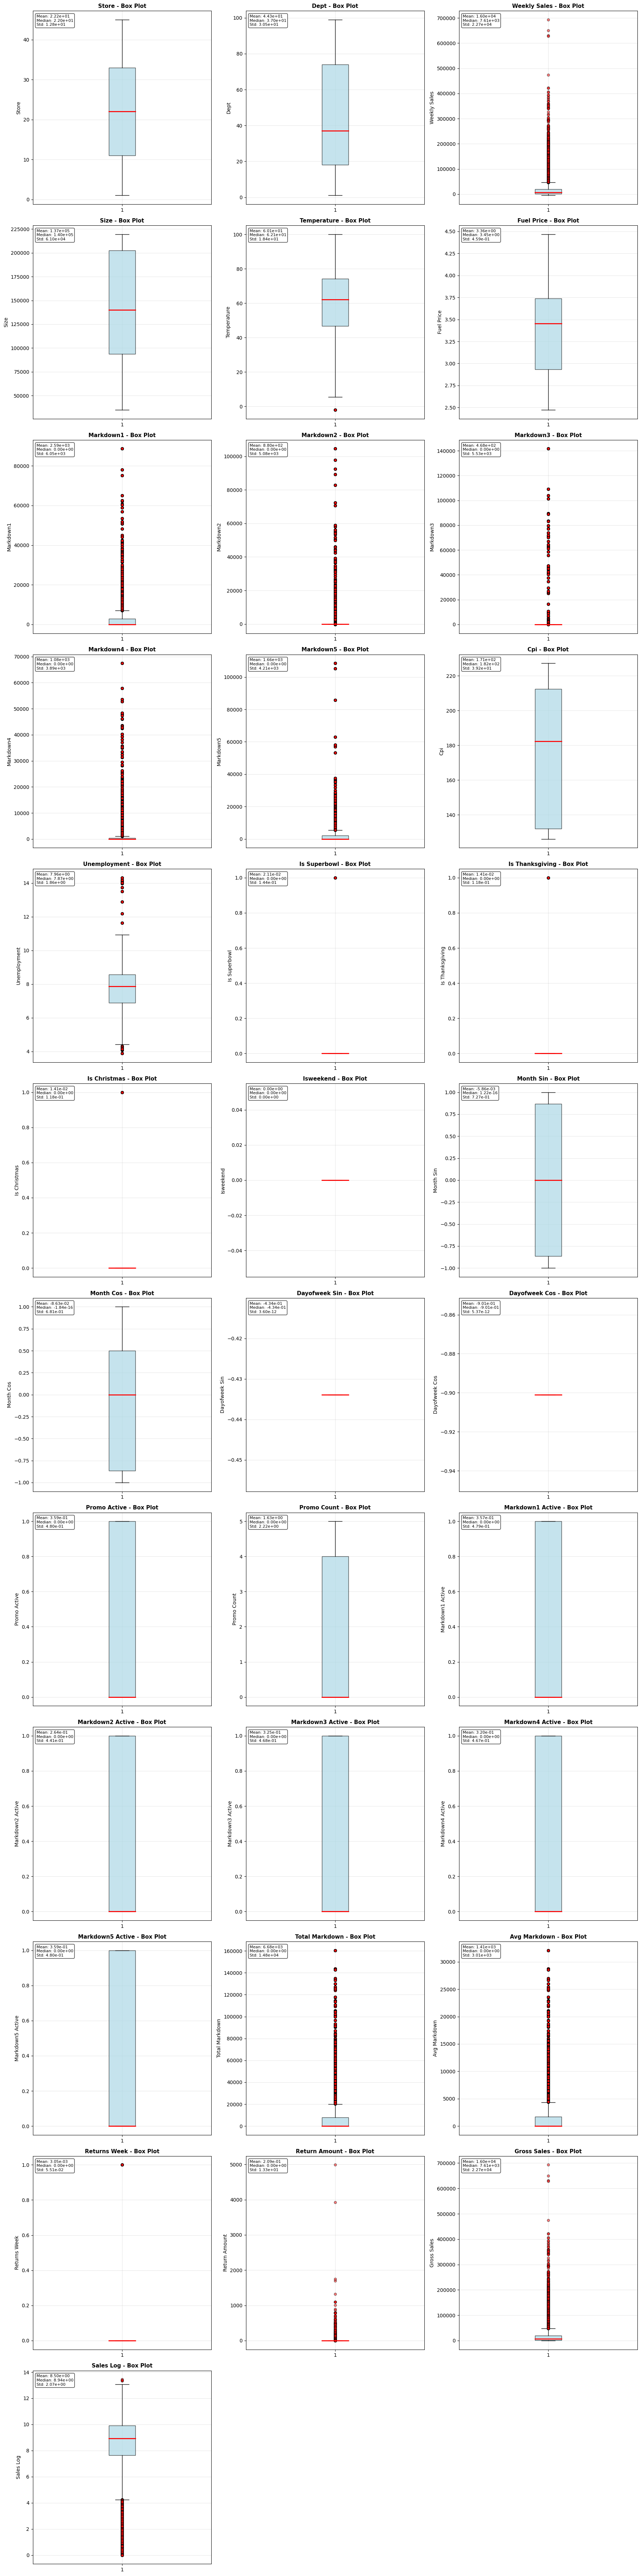


Numerical Variables Summary Statistics:
             Store      Dept  Weekly_Sales      Size  Temperature  Fuel_Price  \
count     4.22e+05  4.22e+05      4.22e+05  4.22e+05     4.22e+05    4.22e+05   
mean      2.22e+01  4.43e+01      1.60e+04  1.37e+05     6.01e+01    3.36e+00   
std       1.28e+01  3.05e+01      2.27e+04  6.10e+04     1.84e+01    4.59e-01   
min       1.00e+00  1.00e+00     -4.99e+03  3.49e+04    -2.06e+00    2.47e+00   
25%       1.10e+01  1.80e+01      2.08e+03  9.36e+04     4.67e+01    2.93e+00   
50%       2.20e+01  3.70e+01      7.61e+03  1.40e+05     6.21e+01    3.45e+00   
75%       3.30e+01  7.40e+01      2.02e+04  2.03e+05     7.43e+01    3.74e+00   
max       4.50e+01  9.90e+01      6.93e+05  2.20e+05     1.00e+02    4.47e+00   
skewness  7.78e-02  3.58e-01      3.26e+00 -3.26e-01    -3.21e-01   -1.05e-01   
kurtosis -1.15e+00 -1.22e+00      2.15e+01 -1.21e+00    -6.36e-01   -1.19e+00   

          MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5    

In [18]:
# Box Plots
fig_box, axes_box = plt.subplots(num_rows, num_cols, figsize=(18, 6*num_rows))
axes_box = axes_box.flatten() if n_num_cols > 1 else [axes_box]

for i, col in enumerate(numerical_columns):
    if i < len(axes_box):
        box_plot = axes_box[i].boxplot(data_clean[col], patch_artist=True, 
                                      boxprops=dict(facecolor='lightblue', alpha=0.7),
                                      medianprops=dict(color='red', linewidth=2),
                                      flierprops=dict(marker='o', markerfacecolor='red', 
                                                    markersize=5, alpha=0.5))
        
        axes_box[i].set_title(f'{col.title().replace("_", " ")} - Box Plot', 
                             fontweight='bold', fontsize=11)
        axes_box[i].set_ylabel(col.title().replace("_", " "))
        axes_box[i].grid(True, alpha=0.3)
        
        q1, median, q3 = np.percentile(data_clean[col], [25, 50, 75])
        mean_val = data_clean[col].mean()
        std_val = data_clean[col].std()
        
        stats_text = f'Mean: {mean_val:.2e}\nMedian: {median:.2e}\nStd: {std_val:.2e}'
        axes_box[i].text(0.02, 0.98, stats_text, transform=axes_box[i].transAxes,
                        verticalalignment='top', bbox=dict(boxstyle='round', 
                        facecolor='white', alpha=0.8), fontsize=8)

for i in range(n_num_cols, len(axes_box)):
    axes_box[i].set_visible(False)

plt.tight_layout()
plt.show()

print("\nNumerical Variables Summary Statistics:")
print("=" * 80)

summary_stats = data_clean[numerical_columns].describe()

additional_stats = pd.DataFrame(index=['skewness', 'kurtosis'])
for col in numerical_columns:
    additional_stats.loc['skewness', col] = stats.skew(data_clean[col])
    additional_stats.loc['kurtosis', col] = stats.kurtosis(data_clean[col])

full_summary = pd.concat([summary_stats, additional_stats])

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.2e}'.format)

print(full_summary)

pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.float_format')
    
    



CORRELATION ANALYSIS (IMPROVED VISUALIZATION)
----------------------------------------


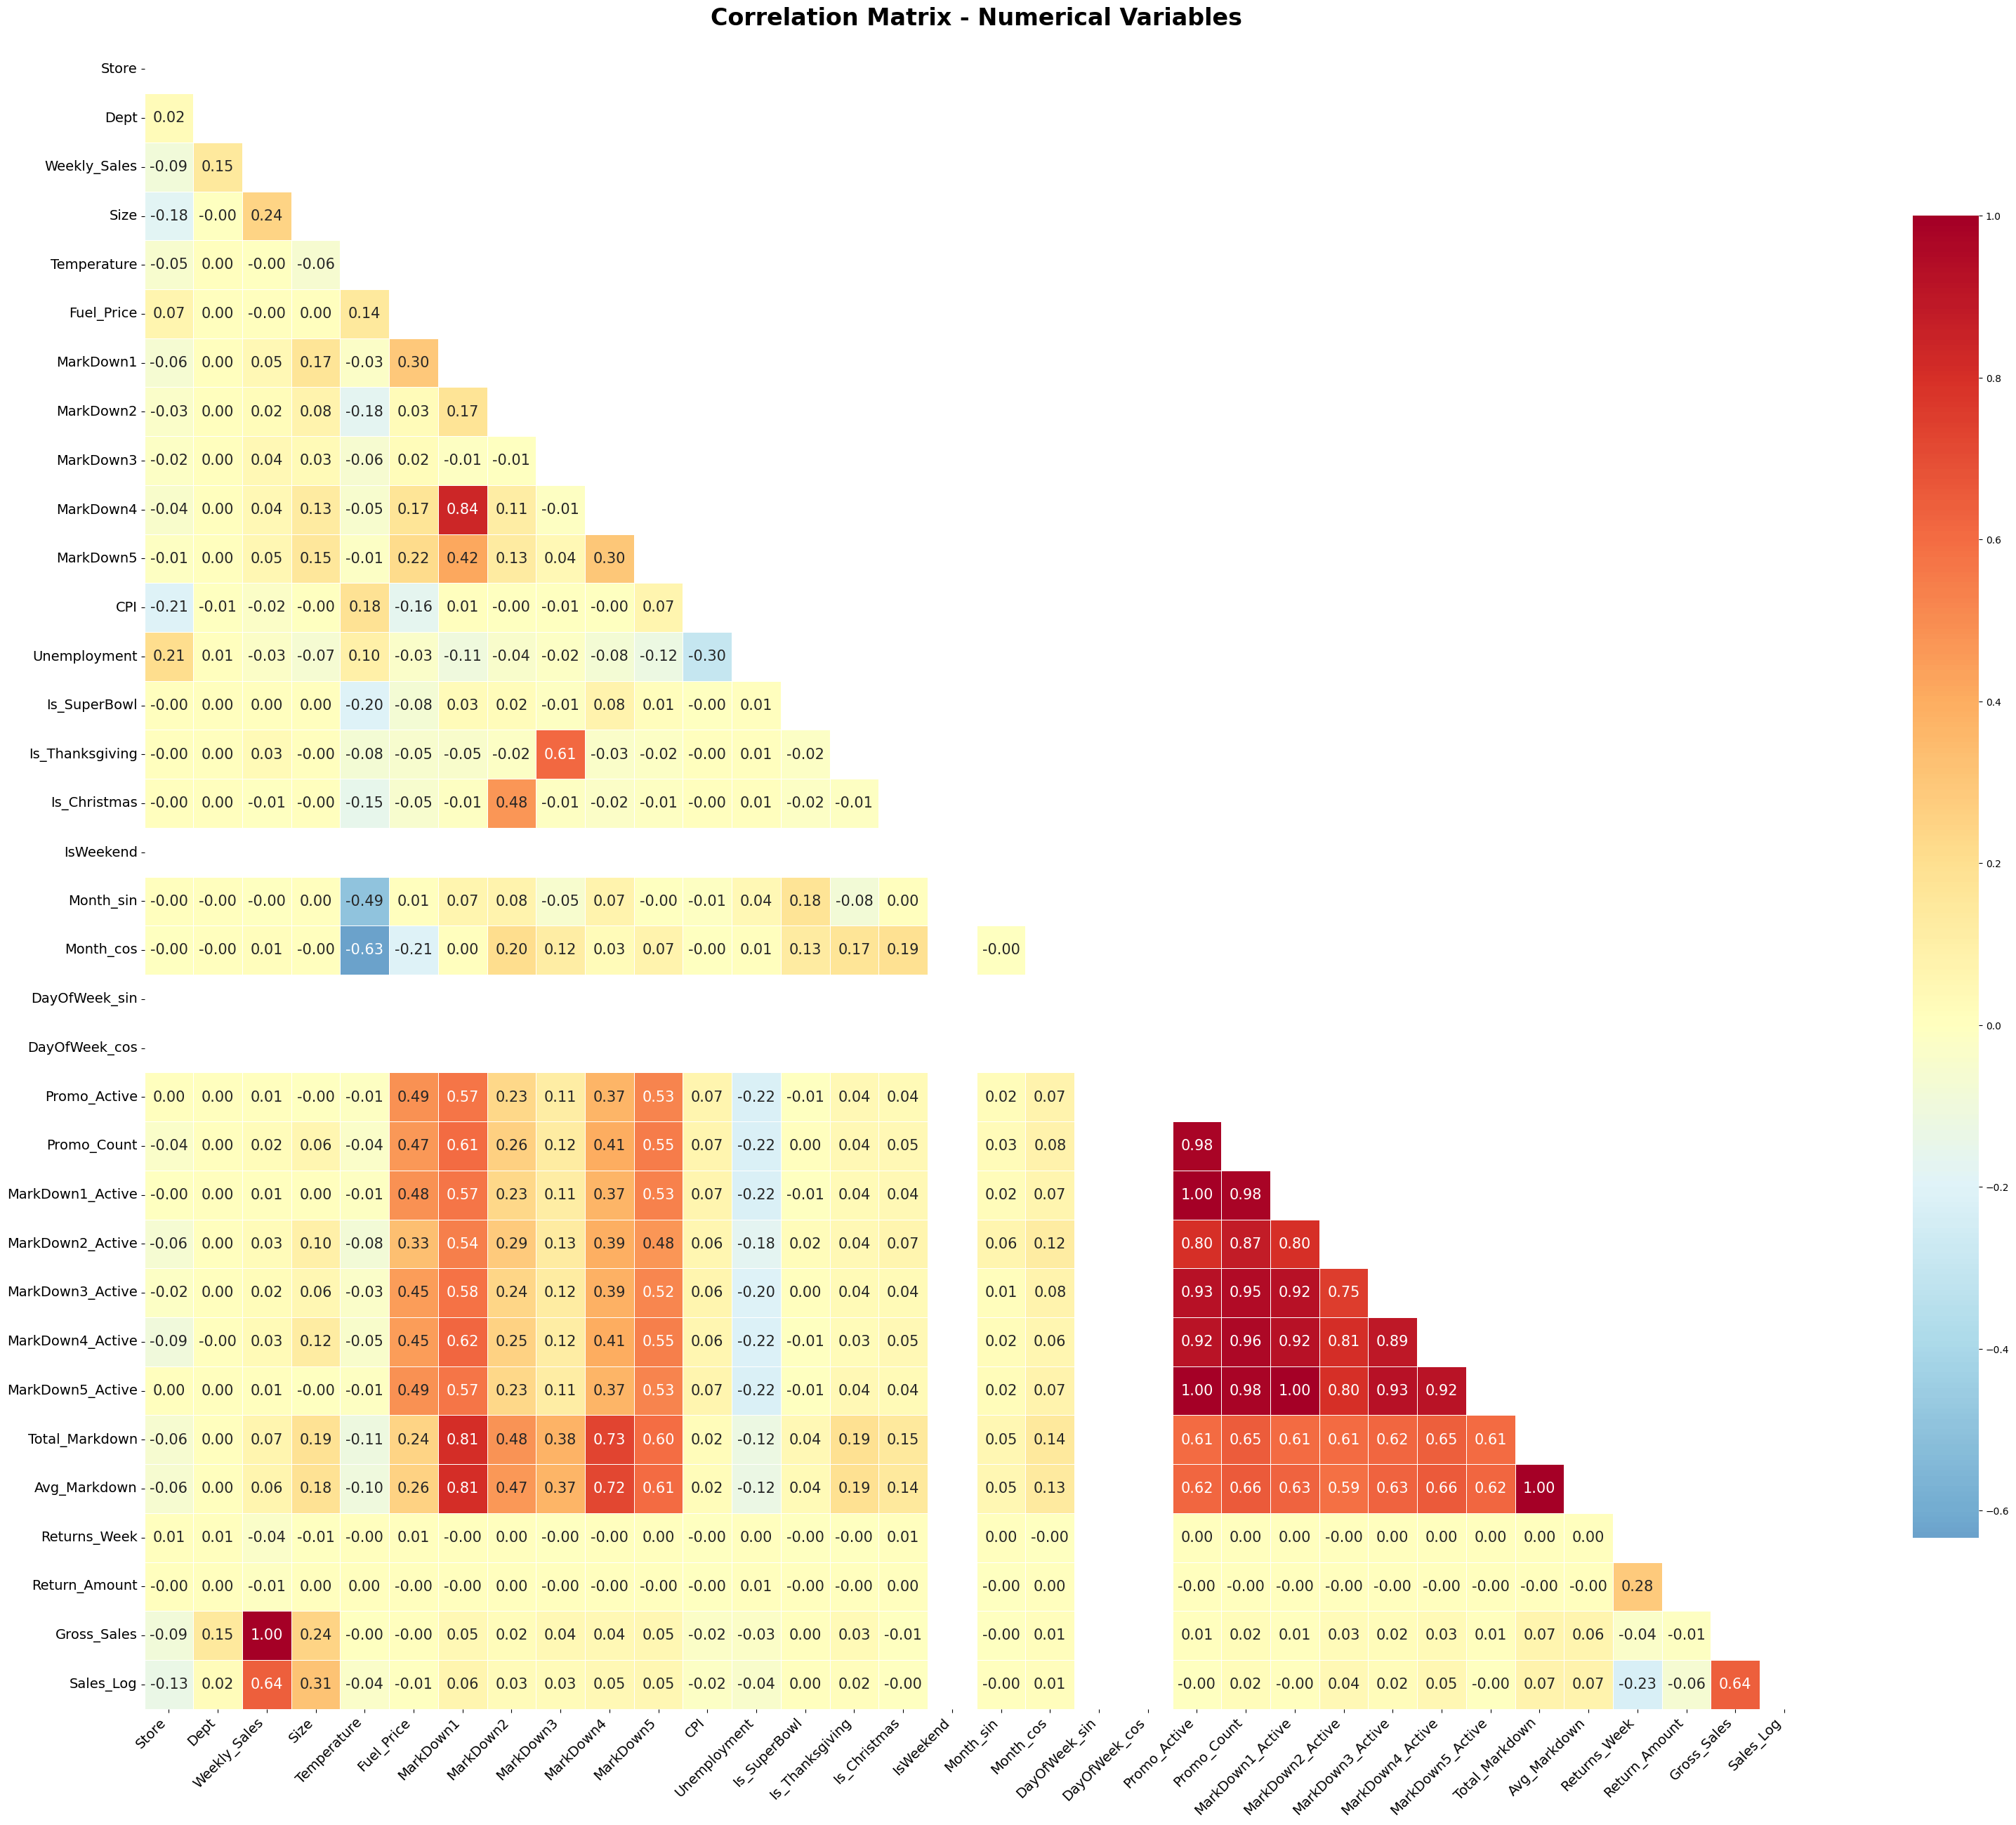

Highly Correlated Variable Pairs (|correlation| > 0.7):
  Weekly_Sales ↔ Gross_Sales: 1.000
  MarkDown1 ↔ MarkDown4: 0.839
  MarkDown1 ↔ Total_Markdown: 0.805
  MarkDown1 ↔ Avg_Markdown: 0.807
  MarkDown4 ↔ Total_Markdown: 0.729
  MarkDown4 ↔ Avg_Markdown: 0.722
  Promo_Active ↔ Promo_Count: 0.980
  Promo_Active ↔ MarkDown1_Active: 0.996
  Promo_Active ↔ MarkDown2_Active: 0.800
  Promo_Active ↔ MarkDown3_Active: 0.927
  Promo_Active ↔ MarkDown4_Active: 0.917
  Promo_Active ↔ MarkDown5_Active: 1.000
  Promo_Count ↔ MarkDown1_Active: 0.981
  Promo_Count ↔ MarkDown2_Active: 0.874
  Promo_Count ↔ MarkDown3_Active: 0.948
  Promo_Count ↔ MarkDown4_Active: 0.956
  Promo_Count ↔ MarkDown5_Active: 0.980
  MarkDown1_Active ↔ MarkDown2_Active: 0.802
  MarkDown1_Active ↔ MarkDown3_Active: 0.925
  MarkDown1_Active ↔ MarkDown4_Active: 0.920
  MarkDown1_Active ↔ MarkDown5_Active: 0.996
  MarkDown2_Active ↔ MarkDown3_Active: 0.751
  MarkDown2_Active ↔ MarkDown4_Active: 0.807
  MarkDown2_Active ↔ MarkD

In [23]:
# This assumes 'data_clean' and 'numerical_columns' are already defined
if len(numerical_columns) > 1:
    print("\n\nCORRELATION ANALYSIS (IMPROVED VISUALIZATION)")
    print("-" * 40)
    
    correlation_matrix = data_clean[numerical_columns].corr()
    
    # --- IMPROVEMENTS ARE HERE ---
    
    # 1. MASSIVELY INCREASE FIGURE SIZE to give each cell enough space
    plt.figure(figsize=(32, 28)) 
    
    # 2. CREATE A MASK for the upper triangle (your code was already correct here)
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    # 3. PLOT THE HEATMAP with adjusted font size and format
    heatmap = sns.heatmap(
        correlation_matrix, 
        mask=mask, 
        annot=True, 
        cmap='RdYlBu_r', 
        center=0, 
        square=True, 
        linewidths=0.5,  # Slightly thicker lines for better separation
        cbar_kws={"shrink": .7}, # Adjust color bar size
        fmt='.2f',  # Use 2 decimal places, it's cleaner and saves space
        annot_kws={'size': 15} # Slightly smaller font size for annotations
    )
    
    # 4. ENHANCE TITLES AND LABELS for the larger plot
    plt.title('Correlation Matrix - Numerical Variables', fontweight='bold', fontsize=24, pad=20)
    plt.xticks(rotation=45, ha='right', fontsize=14)
    plt.yticks(rotation=0, fontsize=14)
    
    # 5. USE A MORE ROBUST LAYOUT ADJUSTMENT
    plt.tight_layout(pad=1.5) 
    
    plt.show()
        
    print("Highly Correlated Variable Pairs (|correlation| > 0.7):")
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:
                high_corr_pairs.append((correlation_matrix.columns[i], 
                                       correlation_matrix.columns[j], 
                                       corr_val))
    
    if high_corr_pairs:
        for var1, var2, corr in high_corr_pairs:
            print(f"  {var1} ↔ {var2}: {corr:.3f}")
    else:
        print("  No highly correlated pairs found (threshold: |correlation| > 0.7)")


In [17]:
numeric_cols = data.select_dtypes(include=['int64']).columns
skewness = data[numeric_cols].skew()
cols_to_log = skewness[abs(skewness) > 0.5].index
transformation_columns = [col for col in cols_to_log if col != 'loan_status']
print(f"Columns with skewness > 0.5: {cols_to_log.tolist()}" )

Columns with skewness > 0.5: ['Is_SuperBowl', 'Is_Thanksgiving', 'Is_Christmas', 'Promo_Active', 'Promo_Count', 'MarkDown1_Active', 'MarkDown2_Active', 'MarkDown3_Active', 'MarkDown4_Active', 'MarkDown5_Active', 'Returns_Week']


In [24]:
# Separate "real outliers" from "data errors"
def analyze_outliers_contextual(data, col, iqr_multiplier=3):  # Use 3 IQR, not 1.5
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - iqr_multiplier * iqr
    upper_bound = q3 + iqr_multiplier * iqr
    
    outlier_mask = (data[col] < lower_bound) | (data[col] > upper_bound)
    outliers = data[outlier_mask]
    
    print(f"\n{col}:")
    print(f"  Outliers: {outlier_mask.sum()} ({outlier_mask.mean()*100:.2f}%)")
    
    # Check if outliers are on holidays (then they're real, not errors)
    if 'IsHoliday' in data.columns and outlier_mask.sum() > 0:
        holiday_outliers = outliers['IsHoliday'].mean()
        print(f"  Of outliers, {holiday_outliers*100:.1f}% are holiday weeks (expected!)")
    
    return outlier_mask

# Analyze but DON'T remove outliers (they're real in retail)
for col in numerical_columns:
    outlier_mask = analyze_outliers_contextual(data, col, iqr_multiplier=3)
    
# Only cap extreme markdown outliers (likely data errors)
for markdown_col in markdown_cols:
    p99 = data[markdown_col].quantile(0.99)
    extreme_mask = data[markdown_col] > p99 * 5  # 5x the 99th percentile
    if extreme_mask.sum() > 0:
        print(f"Capping {extreme_mask.sum()} extreme values in {markdown_col}")
        data.loc[extreme_mask, markdown_col] = p99


Store:
  Outliers: 0 (0.00%)

Dept:
  Outliers: 0 (0.00%)

Weekly_Sales:
  Outliers: 12830 (3.04%)
  Of outliers, 8.0% are holiday weeks (expected!)

Size:
  Outliers: 0 (0.00%)

Temperature:
  Outliers: 0 (0.00%)

Fuel_Price:
  Outliers: 0 (0.00%)

MarkDown1:
  Outliers: 26162 (6.21%)
  Of outliers, 9.9% are holiday weeks (expected!)

MarkDown2:
  Outliers: 98958 (23.47%)
  Of outliers, 9.7% are holiday weeks (expected!)

MarkDown3:
  Outliers: 75196 (17.84%)
  Of outliers, 12.9% are holiday weeks (expected!)

MarkDown4:
  Outliers: 61565 (14.60%)
  Of outliers, 6.7% are holiday weeks (expected!)

MarkDown5:
  Outliers: 14028 (3.33%)
  Of outliers, 4.1% are holiday weeks (expected!)

CPI:
  Outliers: 0 (0.00%)

Unemployment:
  Outliers: 13756 (3.26%)
  Of outliers, 6.9% are holiday weeks (expected!)

Is_SuperBowl:
  Outliers: 8895 (2.11%)
  Of outliers, 100.0% are holiday weeks (expected!)

Is_Thanksgiving:
  Outliers: 5959 (1.41%)
  Of outliers, 100.0% are holiday weeks (expected!)


In [20]:
data.dtypes

Store                            int64
Dept                             int64
Date                    datetime64[ns]
Weekly_Sales                   float64
Type                            object
Size                             int64
Temperature                    float64
Fuel_Price                     float64
MarkDown1                      float64
MarkDown2                      float64
MarkDown3                      float64
MarkDown4                      float64
MarkDown5                      float64
CPI                            float64
Unemployment                   float64
IsHoliday                         bool
Holiday_Type                    object
Is_SuperBowl                     int64
Is_Thanksgiving                  int64
Is_Christmas                     int64
Year                             int32
Month                            int32
Quarter                          int32
Week                            UInt32
DayOfWeek                        int32
IsWeekend                

=== CORRELATION ANALYSIS WITH WEEKLY SALES ===
Dataset shape: (421570, 47)
Number of numeric features: 40

TOP 10 STRONGEST CORRELATIONS WITH WEEKLY_SALES:
--------------------------------------------------
Gross_Sales    :  1.000 (Strong Positive)
Sales_Log      :  0.641 (Moderate Positive)
Size           :  0.244 (Weak Positive)
Dept           :  0.148 (Weak Positive)
Store          : -0.085 (Weak Negative)
Total_Markdown :  0.065 (Weak Positive)
Avg_Markdown   :  0.064 (Weak Positive)
MarkDown5      :  0.056 (Weak Positive)
MarkDown3      :  0.055 (Weak Positive)
MarkDown1      :  0.047 (Weak Positive)

WEAKEST CORRELATIONS (closest to 0):
-----------------------------------
Fuel_Price     : -0.000
Temperature    : -0.002
Month_sin      : -0.003
Is_SuperBowl   :  0.003
Week_sin       : -0.004

=== STATISTICAL INSIGHTS ===
Weekly Sales - Mean: $15,981.26
Weekly Sales - Std:  $22,711.18
Weekly Sales - Min:  $-4,988.94
Weekly Sales - Max:  $693,099.36

MARKDOWN IMPACT ANALYSIS:
-------

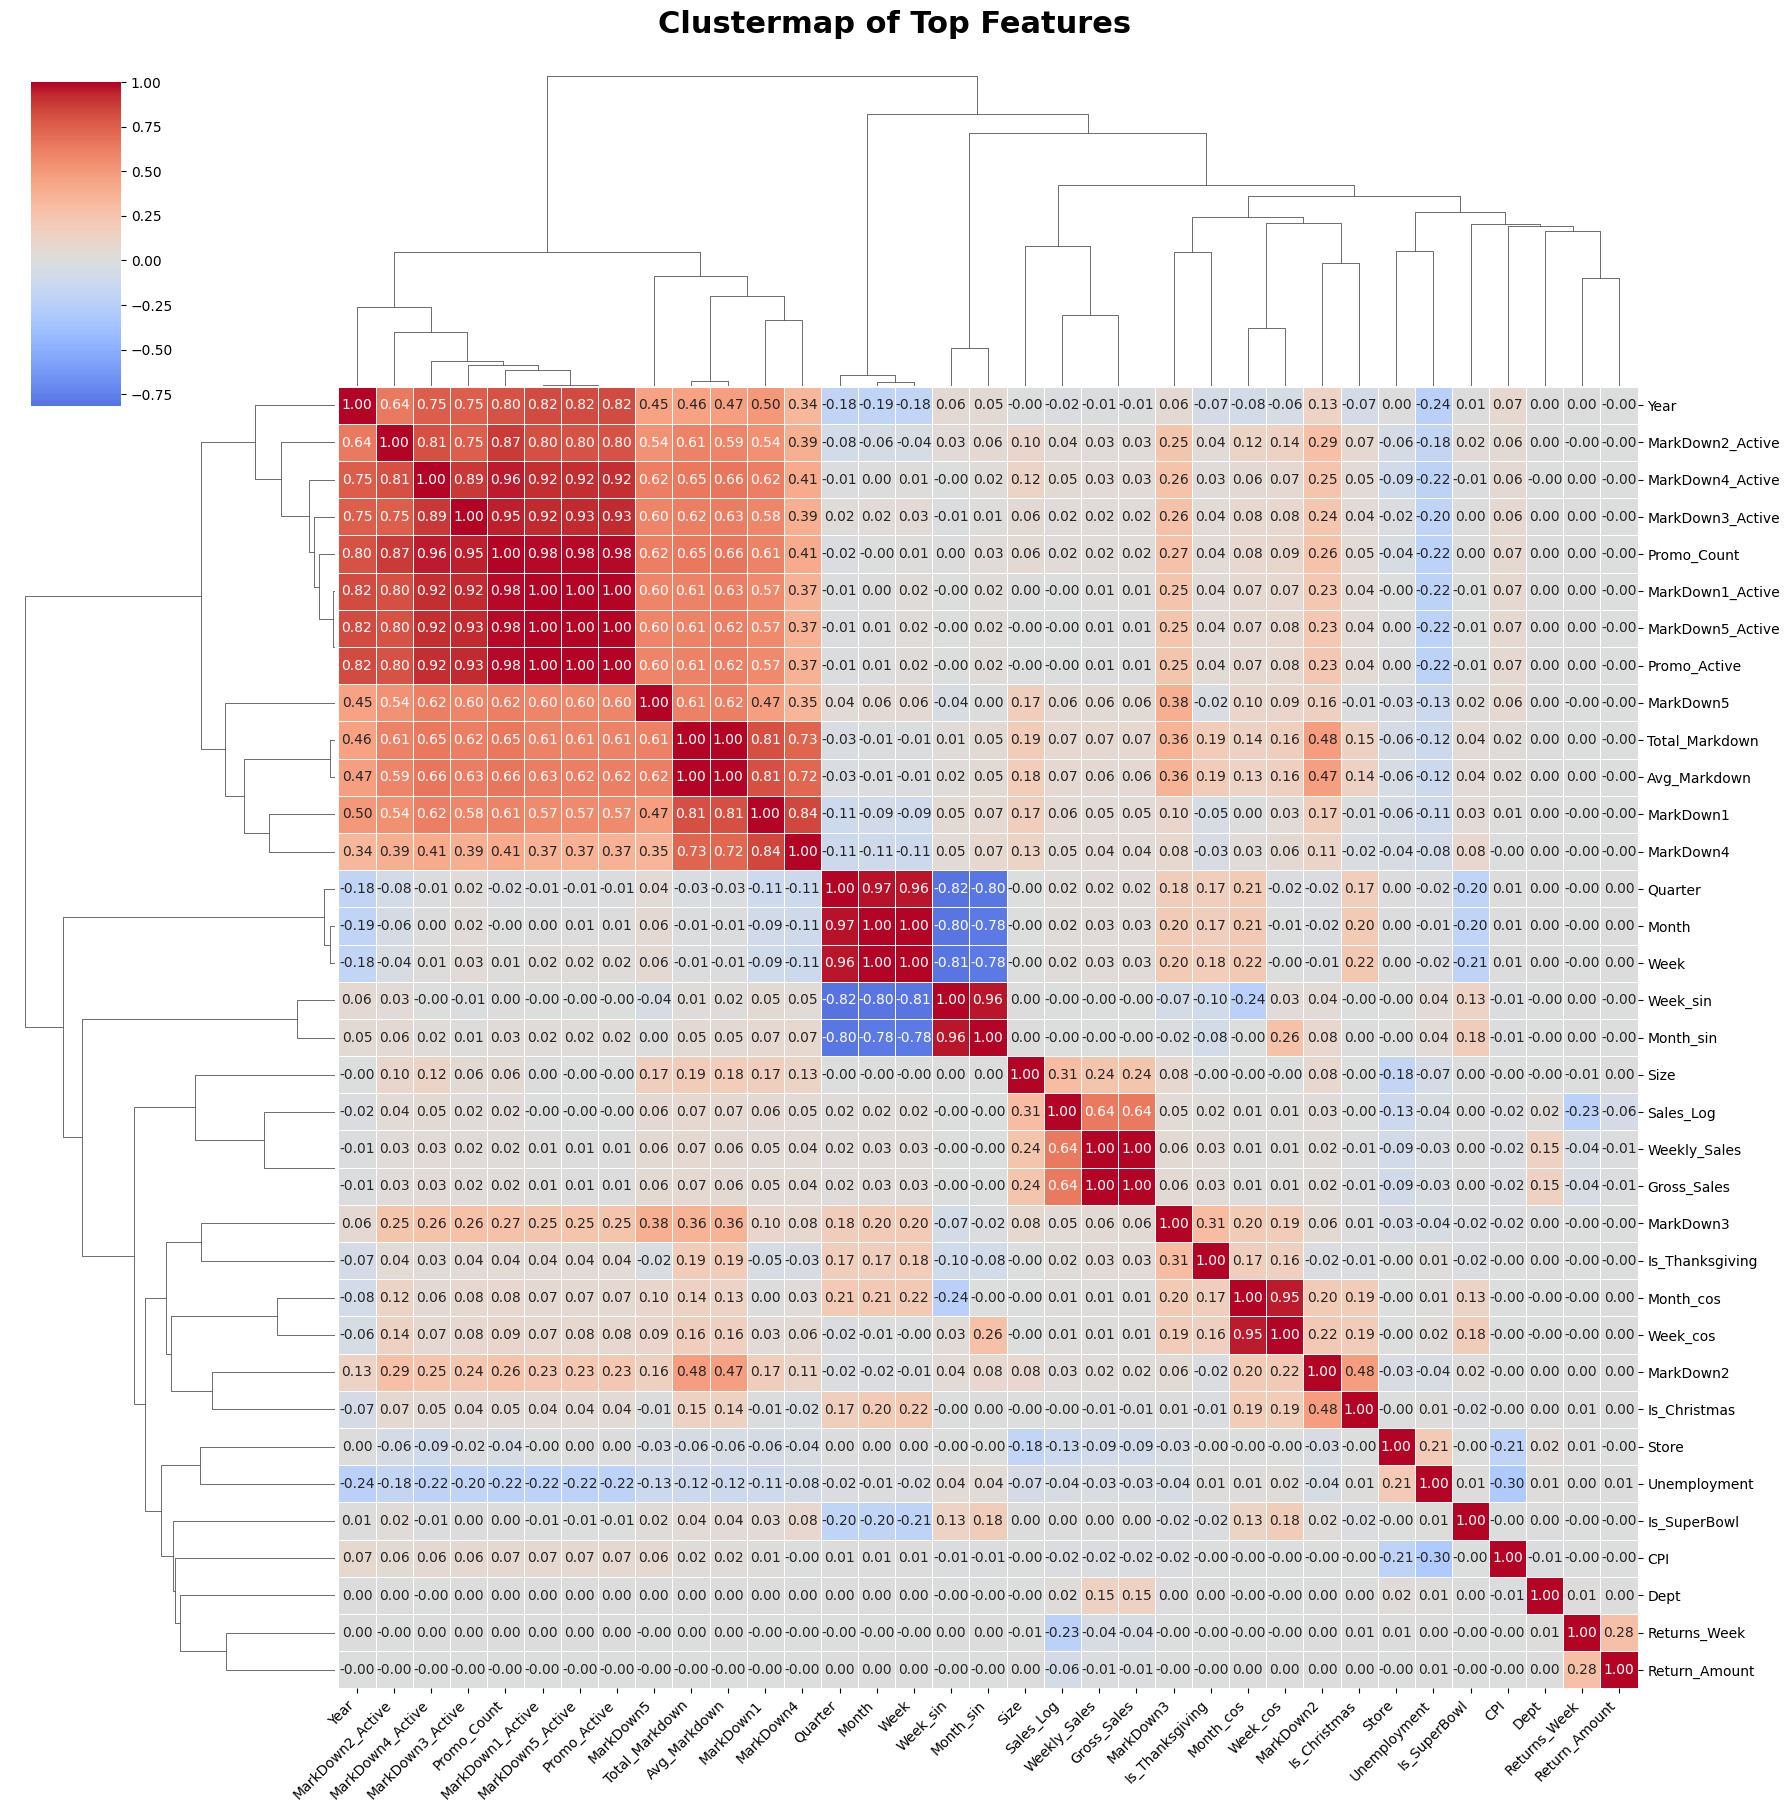

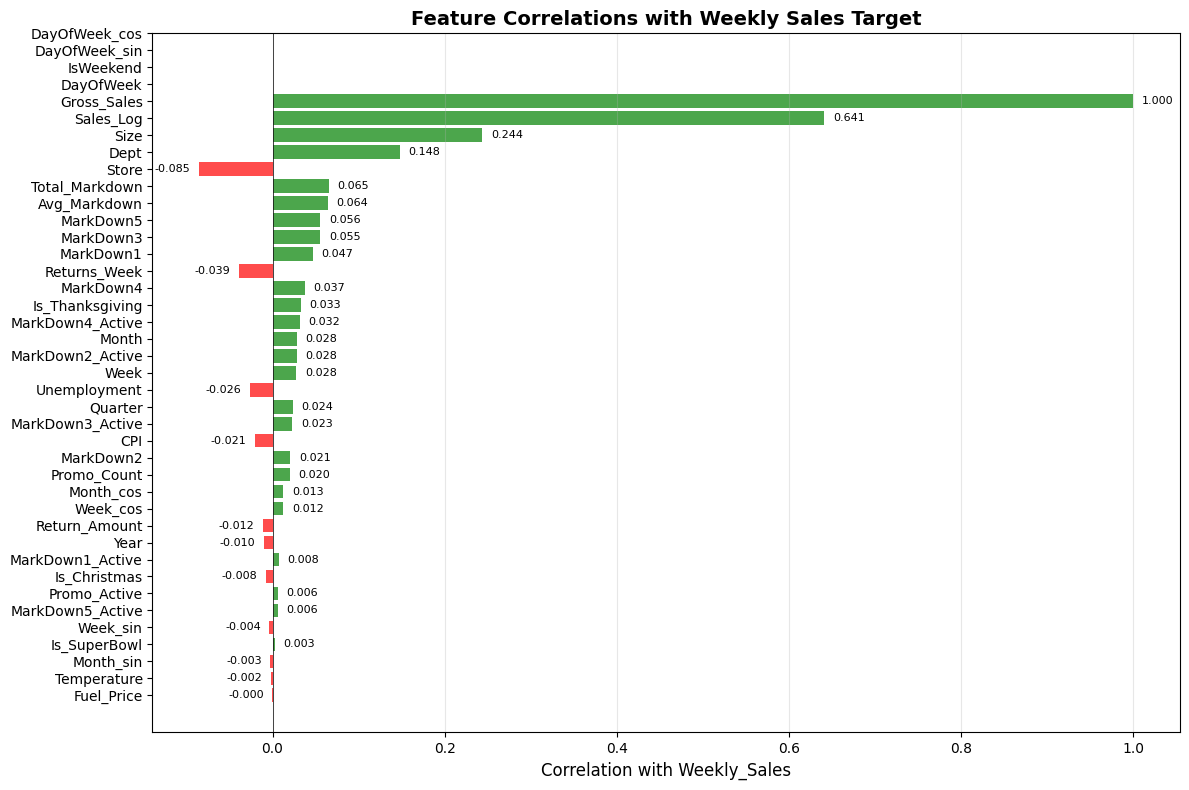


=== FEATURE IMPORTANCE INSIGHTS ===
Found 2 features with strong correlation (>0.5):
  - Gross_Sales: 1.000
  - Sales_Log: 0.641

=== DETAILED FEATURE ANALYSIS ===
Holiday Impact:
  - Holiday weeks avg sales: $17,035.82
  - Regular weeks avg sales: $15,901.45
  - Holiday impact: +7.1%


In [37]:
def analyze_sales_correlations(df):
    """
    Analyze correlations with Weekly_Sales target variable and create visualizations
    """
    
    # Select numeric columns for correlation analysis
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Remove Date column if it exists in numeric form
    if 'Date' in numeric_columns:
        numeric_columns.remove('Date')
    
    # Calculate correlation matrix
    correlation_matrix = df[numeric_columns].corr()
    
    # Get correlations with Weekly_Sales
    target_correlations = correlation_matrix['Weekly_Sales'].sort_values(key=abs, ascending=False)
    
    print("=== CORRELATION ANALYSIS WITH WEEKLY SALES ===")
    print(f"Dataset shape: {df.shape}")
    print(f"Number of numeric features: {len(numeric_columns)-1}")  # -1 to exclude target
    print()
    
    # Print top positive and negative correlations
    print("TOP 10 STRONGEST CORRELATIONS WITH WEEKLY_SALES:")
    print("-" * 50)
    for feature, corr in target_correlations.head(11).items():  # 11 to include target itself
        if feature != 'Weekly_Sales':
            strength = "Strong" if abs(corr) > 0.7 else "Moderate" if abs(corr) > 0.5 else "Weak"
            direction = "Positive" if corr > 0 else "Negative"
            print(f"{feature:15s}: {corr:6.3f} ({strength} {direction})")
    
    print()
    print("WEAKEST CORRELATIONS (closest to 0):")
    print("-" * 35)
    weak_corrs = target_correlations[target_correlations.index != 'Weekly_Sales']
    weak_corrs_sorted = weak_corrs.reindex(weak_corrs.abs().sort_values().index)
    for feature, corr in weak_corrs_sorted.head(5).items():
        print(f"{feature:15s}: {corr:6.3f}")
    
    # Statistical insights
    print()
    print("=== STATISTICAL INSIGHTS ===")
    print(f"Weekly Sales - Mean: ${df['Weekly_Sales'].mean():,.2f}")
    print(f"Weekly Sales - Std:  ${df['Weekly_Sales'].std():,.2f}")
    print(f"Weekly Sales - Min:  ${df['Weekly_Sales'].min():,.2f}")
    print(f"Weekly Sales - Max:  ${df['Weekly_Sales'].max():,.2f}")
    
    # Lag analysis
    lag_features = [col for col in df.columns if col.startswith('Lag_')]
    if lag_features:
        print()
        print("LAG FEATURE ANALYSIS:")
        print("-" * 20)
        for lag_feature in sorted(lag_features):
            corr_val = correlation_matrix.loc['Weekly_Sales', lag_feature]
            print(f"{lag_feature}: {corr_val:.3f}")
    
    # Markdown analysis
    markdown_features = [col for col in df.columns if col.startswith('MarkDown')]
    if markdown_features:
        print()
        print("MARKDOWN IMPACT ANALYSIS:")
        print("-" * 25)
        for markdown in sorted(markdown_features):
            corr_val = correlation_matrix.loc['Weekly_Sales', markdown]
            avg_markdown = df[markdown].mean()
            print(f"{markdown}: Correlation={corr_val:.3f}, Avg=${avg_markdown:.2f}")
    
    # Seasonal analysis
    seasonal_features = ['Month_sin', 'Month_cos', 'Week_sin', 'Week_cos']
    seasonal_present = [col for col in seasonal_features if col in df.columns]
    if seasonal_present:
        print()
        print("SEASONAL PATTERN ANALYSIS:")
        print("-" * 26)
        for seasonal in seasonal_present:
            corr_val = correlation_matrix.loc['Weekly_Sales', seasonal]
            print(f"{seasonal}: {corr_val:.3f}")
    
    # --- THE SUPERIOR CLUSTERMAP IMPLEMENTATION ---

    # We'll use the same top 20 features for clarity
    # You could use more, but 20-25 is a good starting point.
    top_features = correlation_matrix['Weekly_Sales'].abs().sort_values(ascending=False).head(35).index
    top_corr_matrix = data[top_features].corr()
    
    print("\n[INFO] Generating advanced clustermap for deeper pattern discovery...")
    
    # sns.clustermap returns a ClusterGrid object, which we can customize
    g = sns.clustermap(
        top_corr_matrix,
        annot=True,                # Show the correlation values
        fmt='.2f',                 # Format them cleanly
        cmap='coolwarm',           # Use a diverging colormap
        center=0,                  # Center the colormap at zero
        figsize=(18, 18),          # Give it plenty of space
        linewidths=.5,
        annot_kws={"size": 10}      # Keep font size reasonable
    )
    
    # Adjust the plot for readability
    g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation=45, ha='right')
    g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation=0)
    
    # Add a title (clustermap titles need a bit more work to position)
    g.fig.suptitle('Clustermap of Top Features', fontsize=22, fontweight='bold', y=1.02)
    
    plt.show()
    
    # Create a focused correlation plot for Weekly_Sales
    plt.figure(figsize=(12, 8))
    target_corr_df = target_correlations.drop('Weekly_Sales').to_frame('Correlation')
    target_corr_df['Abs_Correlation'] = target_corr_df['Correlation'].abs()
    target_corr_df = target_corr_df.sort_values('Abs_Correlation', ascending=True)
    
    # Color coding for positive/negative correlations
    colors = ['red' if x < 0 else 'green' for x in target_corr_df['Correlation']]
    
    plt.barh(range(len(target_corr_df)), target_corr_df['Correlation'], color=colors, alpha=0.7)
    plt.yticks(range(len(target_corr_df)), target_corr_df.index, fontsize=10)
    plt.xlabel('Correlation with Weekly_Sales', fontsize=12)
    plt.title('Feature Correlations with Weekly Sales Target', fontsize=14, fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.grid(axis='x', alpha=0.3)
    
    # Add correlation values as text on bars
    for i, v in enumerate(target_corr_df['Correlation']):
        plt.text(v + (0.01 if v >= 0 else -0.01), i, f'{v:.3f}', 
                va='center', ha='left' if v >= 0 else 'right', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # Feature importance insights
    print()
    print("=== FEATURE IMPORTANCE INSIGHTS ===")
    strong_features = target_correlations[abs(target_correlations) > 0.5]
    strong_features = strong_features.drop('Weekly_Sales')
    
    if len(strong_features) > 0:
        print(f"Found {len(strong_features)} features with strong correlation (>0.5):")
        for feature, corr in strong_features.items():
            print(f"  - {feature}: {corr:.3f}")
    else:
        print("No features show strong correlation (>0.5) with Weekly_Sales")
    
    moderate_features = target_correlations[(abs(target_correlations) > 0.3) & 
                                          (abs(target_correlations) <= 0.5)]
    moderate_features = moderate_features.drop('Weekly_Sales', errors='ignore')
    
    if len(moderate_features) > 0:
        print(f"Found {len(moderate_features)} features with moderate correlation (0.3-0.5):")
        for feature, corr in moderate_features.items():
            print(f"  - {feature}: {corr:.3f}")
    
    return correlation_matrix, target_correlations


def detailed_feature_analysis(df):
    """
    Provide detailed analysis of key features
    """
    print()
    print("=== DETAILED FEATURE ANALYSIS ===")
    
    if 'Store_encoded' in df.columns:
        print(f"Store Analysis:")
        print(f"  - Number of unique stores: {df['Store_encoded'].nunique()}")
        print(f"  - Store encoding range: {df['Store_encoded'].min():.2f} to {df['Store_encoded'].max():.2f}")
    
    if 'Dept_encoded' in df.columns:
        print(f"Department Analysis:")
        print(f"  - Number of unique departments: {df['Dept_encoded'].nunique()}")
        print(f"  - Dept encoding range: {df['Dept_encoded'].min():.2f} to {df['Dept_encoded'].max():.2f}")
    
    if 'IsHoliday' in df.columns:
        holiday_sales = df[df['IsHoliday'] == 1]['Weekly_Sales'].mean()
        regular_sales = df[df['IsHoliday'] == 0]['Weekly_Sales'].mean()
        print(f"Holiday Impact:")
        print(f"  - Holiday weeks avg sales: ${holiday_sales:,.2f}")
        print(f"  - Regular weeks avg sales: ${regular_sales:,.2f}")
        print(f"  - Holiday impact: {((holiday_sales/regular_sales-1)*100):+.1f}%")
    
    type_cols = [col for col in df.columns if col.startswith('Type_')]
    if type_cols:
        print("Store Type Analysis:")
        for type_col in type_cols:
            type_sales = df[df[type_col] == True]['Weekly_Sales'].mean()
            print(f"  - {type_col} avg sales: ${type_sales:,.2f}")

correlation_matrix, target_correlations = analyze_sales_correlations(data)
detailed_feature_analysis(data)



---

## Feature Selection 

The `comprehensive_feature_selection` function analyzes numerical (Pearson/Spearman correlation) and categorical (ANOVA/Kendall's Tau) features to rank their importance for predicting `Weekly_Sales`, generating visualizations and selecting top features by threshold or rank.

---

In [38]:
def comprehensive_feature_selection(data, target_col='Weekly_Sales', significance_level=0.05):
    """
    Perform comprehensive feature selection using appropriate statistical tests
    """
    
    # Separate features from target
    X = data.drop(target_col, axis=1)
    y = data[target_col]
    
    print("=== COMPREHENSIVE FEATURE SELECTION ANALYSIS ===")
    print(f"Dataset shape: {data.shape}")
    print(f"Target variable: {target_col}")
    print(f"Significance level: {significance_level}")
    print()
    
    # Initialize results storage
    feature_results = {}
    
    # Identify feature types
    numerical_features = []
    categorical_features = []
    
    for col in X.columns:
        # Skip datetime columns
        if X[col].dtype.kind in ['M', 'm']:  # datetime64 and timedelta64
            print(f"Skipping datetime column: {col}")
            continue
        # Categorical features
        elif X[col].dtype in ['bool', 'object'] or col.startswith('Type_') or col == 'IsHoliday':
            categorical_features.append(col)
        # Numerical features
        else:
            numerical_features.append(col)
    
    print(f"Numerical features ({len(numerical_features)}): {numerical_features}")
    print(f"Categorical features ({len(categorical_features)}): {categorical_features}")
    print()
    
    # ===========================================
    # NUMERICAL FEATURES ANALYSIS
    # ===========================================
    
    print("=== NUMERICAL FEATURES ANALYSIS ===")
    print("Testing: Pearson's and Spearman's correlation")
    print("-" * 60)
    
    numerical_results = []
    
    for feature in numerical_features:
        # Pearson correlation
        pearson_corr, pearson_p = pearsonr(X[feature], y)
        
        # Spearman correlation  
        spearman_corr, spearman_p = spearmanr(X[feature], y)
        
        # Store results
        result = {
            'Feature': feature,
            'Feature_Type': 'Numerical',
            'Pearson_Corr': pearson_corr,
            'Pearson_p_value': pearson_p,
            'Spearman_Corr': spearman_corr,
            'Spearman_p_value': spearman_p,
            'Pearson_Significant': pearson_p < significance_level,
            'Spearman_Significant': spearman_p < significance_level,
            'Max_Abs_Corr': max(abs(pearson_corr), abs(spearman_corr))
        }
        
        numerical_results.append(result)
        feature_results[feature] = result
        
        # Print results
        pearson_sig = "***" if pearson_p < 0.001 else "**" if pearson_p < 0.01 else "*" if pearson_p < 0.05 else ""
        spearman_sig = "***" if spearman_p < 0.001 else "**" if spearman_p < 0.01 else "*" if spearman_p < 0.05 else ""
        
        print(f"{feature:15s}: Pearson={pearson_corr:6.3f}{pearson_sig:3s} (p={pearson_p:.3e})")
        print(f"{'':15s}  Spearman={spearman_corr:6.3f}{spearman_sig:3s} (p={spearman_p:.3e})")
        print()
    
    # ===========================================
    # CATEGORICAL FEATURES ANALYSIS  
    # ===========================================
    
    print("=== CATEGORICAL FEATURES ANALYSIS ===")
    print("Testing: ANOVA F-test and Kendall's Tau")
    print("-" * 60)
    
    categorical_results = []
    
    for feature in categorical_features:
        try:
            # Get unique values/groups
            unique_vals = X[feature].unique()
            groups = [y[X[feature] == val] for val in unique_vals]
            
            # Remove empty groups
            groups = [group for group in groups if len(group) > 0]
            
            if len(groups) < 2:
                print(f"{feature:15s}: Skipped - insufficient groups")
                continue
            
            # ANOVA F-test
            f_stat, anova_p = f_oneway(*groups)
            
            # Kendall's Tau (treat categorical as ordinal for this test)
            kendall_corr, kendall_p = kendalltau(X[feature].astype(float), y)
            
            # Store results
            result = {
                'Feature': feature,
                'Feature_Type': 'Categorical',
                'ANOVA_F_stat': f_stat,
                'ANOVA_p_value': anova_p,
                'Kendall_Tau': kendall_corr,
                'Kendall_p_value': kendall_p,
                'ANOVA_Significant': anova_p < significance_level,
                'Kendall_Significant': kendall_p < significance_level,
                'Max_Abs_Corr': abs(kendall_corr)
            }
            
            categorical_results.append(result)
            feature_results[feature] = result
            
            # Print results
            anova_sig = "***" if anova_p < 0.001 else "**" if anova_p < 0.01 else "*" if anova_p < 0.05 else ""
            kendall_sig = "***" if kendall_p < 0.001 else "**" if kendall_p < 0.01 else "*" if kendall_p < 0.05 else ""
            
            print(f"{feature:15s}: ANOVA F={f_stat:6.2f}{anova_sig:3s} (p={anova_p:.3e})")
            print(f"{'':15s}  Kendall τ={kendall_corr:6.3f}{kendall_sig:3s} (p={kendall_p:.3e})")
            print()
            
        except Exception as e:
            print(f"{feature:15s}: Error in analysis - {str(e)}")
            continue
    
    # ===========================================
    # SUMMARY AND RANKINGS
    # ===========================================
    
    print("=== FEATURE IMPORTANCE SUMMARY ===")
    
    # Create comprehensive results DataFrame
    all_results = []
    for feature, result in feature_results.items():
        if result['Feature_Type'] == 'Numerical':
            all_results.append({
                'Feature': feature,
                'Type': 'Numerical',
                'Primary_Score': abs(result['Pearson_Corr']),
                'Secondary_Score': abs(result['Spearman_Corr']),
                'Primary_p_value': result['Pearson_p_value'],
                'Secondary_p_value': result['Spearman_p_value'],
                'Primary_Significant': result['Pearson_Significant'],
                'Secondary_Significant': result['Spearman_Significant'],
                'Overall_Score': result['Max_Abs_Corr']
            })
        else:
            all_results.append({
                'Feature': feature,
                'Type': 'Categorical',
                'Primary_Score': result['ANOVA_F_stat'],
                'Secondary_Score': abs(result['Kendall_Tau']),
                'Primary_p_value': result['ANOVA_p_value'],
                'Secondary_p_value': result['Kendall_p_value'],
                'Primary_Significant': result['ANOVA_Significant'],
                'Secondary_Significant': result['Kendall_Significant'],
                'Overall_Score': result['Max_Abs_Corr']
            })
    
    results_df = pd.DataFrame(all_results)
    
    # Sort by overall importance
    results_df = results_df.sort_values('Overall_Score', ascending=False)
    
    print("\nTOP 15 MOST IMPORTANT FEATURES:")
    print("-" * 70)
    print(f"{'Rank':<4} {'Feature':<15} {'Type':<11} {'Score':<8} {'Significant':<12}")
    print("-" * 70)
    
    for i, (_, row) in enumerate(results_df.head(15).iterrows(), 1):
        sig_status = "Yes" if (row['Primary_Significant'] or row['Secondary_Significant']) else "No"
        print(f"{i:<4} {row['Feature']:<15} {row['Type']:<11} {row['Overall_Score']:<8.3f} {sig_status:<12}")
    
    # Statistical significance summary
    significant_features = results_df[
        (results_df['Primary_Significant']) | (results_df['Secondary_Significant'])
    ]
    
    print(f"\nSTATISTICAL SIGNIFICANCE SUMMARY:")
    print(f"Total features analyzed: {len(results_df)}")
    print(f"Statistically significant features: {len(significant_features)}")
    print(f"Non-significant features: {len(results_df) - len(significant_features)}")
    
    # Feature selection recommendations
    print(f"\n=== FEATURE SELECTION RECOMMENDATIONS ===")
    
    # High importance features (top quartile)
    high_importance = results_df.head(max(1, len(results_df)//4))
    print(f"HIGH IMPORTANCE ({len(high_importance)} features):")
    for feature in high_importance['Feature'].values:
        print(f"  - {feature}")
    
    # Medium importance features  
    medium_start = len(results_df)//4
    medium_end = len(results_df)//2
    medium_importance = results_df.iloc[medium_start:medium_end]
    if len(medium_importance) > 0:
        print(f"\nMEDIUM IMPORTANCE ({len(medium_importance)} features):")
        for feature in medium_importance['Feature'].values:
            print(f"  - {feature}")
    
    # Low importance features
    low_importance = results_df.tail(len(results_df)//2)
    if len(low_importance) > 0:
        print(f"\nLOW IMPORTANCE ({len(low_importance)} features - consider removing):")
        for feature in low_importance['Feature'].values:
            print(f"  - {feature}")
    
    return results_df, feature_results


In [39]:

def create_feature_importance_visualizations(results_df):
    """
    Create visualizations for feature importance analysis
    """
    
    # Set up the plotting style
    plt.style.use('default')
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Top 15 features bar plot
    top_15 = results_df.head(15)
    colors = ['skyblue' if t == 'Numerical' else 'lightcoral' for t in top_15['Type']]
    
    bars = ax1.barh(range(len(top_15)), top_15['Overall_Score'], color=colors)
    ax1.set_yticks(range(len(top_15)))
    ax1.set_yticklabels(top_15['Feature'], fontsize=10)
    ax1.set_xlabel('Importance Score')
    ax1.set_title('Top 15 Feature Importance Scores')
    ax1.grid(axis='x', alpha=0.3)
    
    # Add significance markers
    for i, (_, row) in enumerate(top_15.iterrows()):
        if row['Primary_Significant'] or row['Secondary_Significant']:
            ax1.text(row['Overall_Score'] + 0.01, i, '*', fontsize=12, va='center')
    
    # 2. Feature type distribution
    type_counts = results_df['Type'].value_counts()
    ax2.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', 
            colors=['skyblue', 'lightcoral'])
    ax2.set_title('Distribution of Feature Types')
    
    # 3. Significance analysis
    sig_data = []
    for _, row in results_df.iterrows():
        if row['Primary_Significant'] or row['Secondary_Significant']:
            sig_data.append('Significant')
        else:
            sig_data.append('Not Significant')
    
    sig_counts = pd.Series(sig_data).value_counts()
    ax3.bar(sig_counts.index, sig_counts.values, color=['green', 'red'], alpha=0.7)
    ax3.set_title('Statistical Significance Distribution')
    ax3.set_ylabel('Number of Features')
    
    # 4. Score distribution by type
    numerical_scores = results_df[results_df['Type'] == 'Numerical']['Overall_Score']
    categorical_scores = results_df[results_df['Type'] == 'Categorical']['Overall_Score']
    
    ax4.hist([numerical_scores, categorical_scores], bins=10, alpha=0.7, 
             label=['Numerical', 'Categorical'], color=['skyblue', 'lightcoral'])
    ax4.set_xlabel('Importance Score')
    ax4.set_ylabel('Frequency')
    ax4.set_title('Score Distribution by Feature Type')
    ax4.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Create a detailed correlation heatmap for top features
    return results_df


In [40]:

def select_features_by_threshold(results_df, importance_threshold=0.1, top_k=None):
    """
    Select features based on importance threshold or top-k
    """
    
    print(f"\n=== FEATURE SELECTION RESULTS ===")
    
    if top_k:
        selected_features = results_df.head(top_k)['Feature'].tolist()
        print(f"Selected top {top_k} features:")
    else:
        selected_features = results_df[results_df['Overall_Score'] >= importance_threshold]['Feature'].tolist()
        print(f"Selected features with importance >= {importance_threshold}:")
    
    print(f"Number of selected features: {len(selected_features)}")
    print("Selected features:")
    for i, feature in enumerate(selected_features, 1):
        score = results_df[results_df['Feature'] == feature]['Overall_Score'].iloc[0]
        feature_type = results_df[results_df['Feature'] == feature]['Type'].iloc[0]
        print(f"  {i:2d}. {feature:<15} (Type: {feature_type}, Score: {score:.3f})")
    
    return selected_features


=== COMPREHENSIVE FEATURE SELECTION ANALYSIS ===
Dataset shape: (421570, 47)
Target variable: Weekly_Sales
Significance level: 0.05

Skipping datetime column: Date
Numerical features (40): ['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Is_SuperBowl', 'Is_Thanksgiving', 'Is_Christmas', 'Year', 'Month', 'Quarter', 'Week', 'DayOfWeek', 'IsWeekend', 'Month_sin', 'Month_cos', 'Week_sin', 'Week_cos', 'DayOfWeek_sin', 'DayOfWeek_cos', 'Promo_Active', 'Promo_Count', 'MarkDown1_Active', 'MarkDown2_Active', 'MarkDown3_Active', 'MarkDown4_Active', 'MarkDown5_Active', 'Total_Markdown', 'Avg_Markdown', 'Returns_Week', 'Return_Amount', 'Gross_Sales', 'Sales_Log']
Categorical features (5): ['Type', 'IsHoliday', 'Holiday_Type', 'Any_Markdown_Missing', 'All_Markdown_Missing']

=== NUMERICAL FEATURES ANALYSIS ===
Testing: Pearson's and Spearman's correlation
--------------------------------------------------

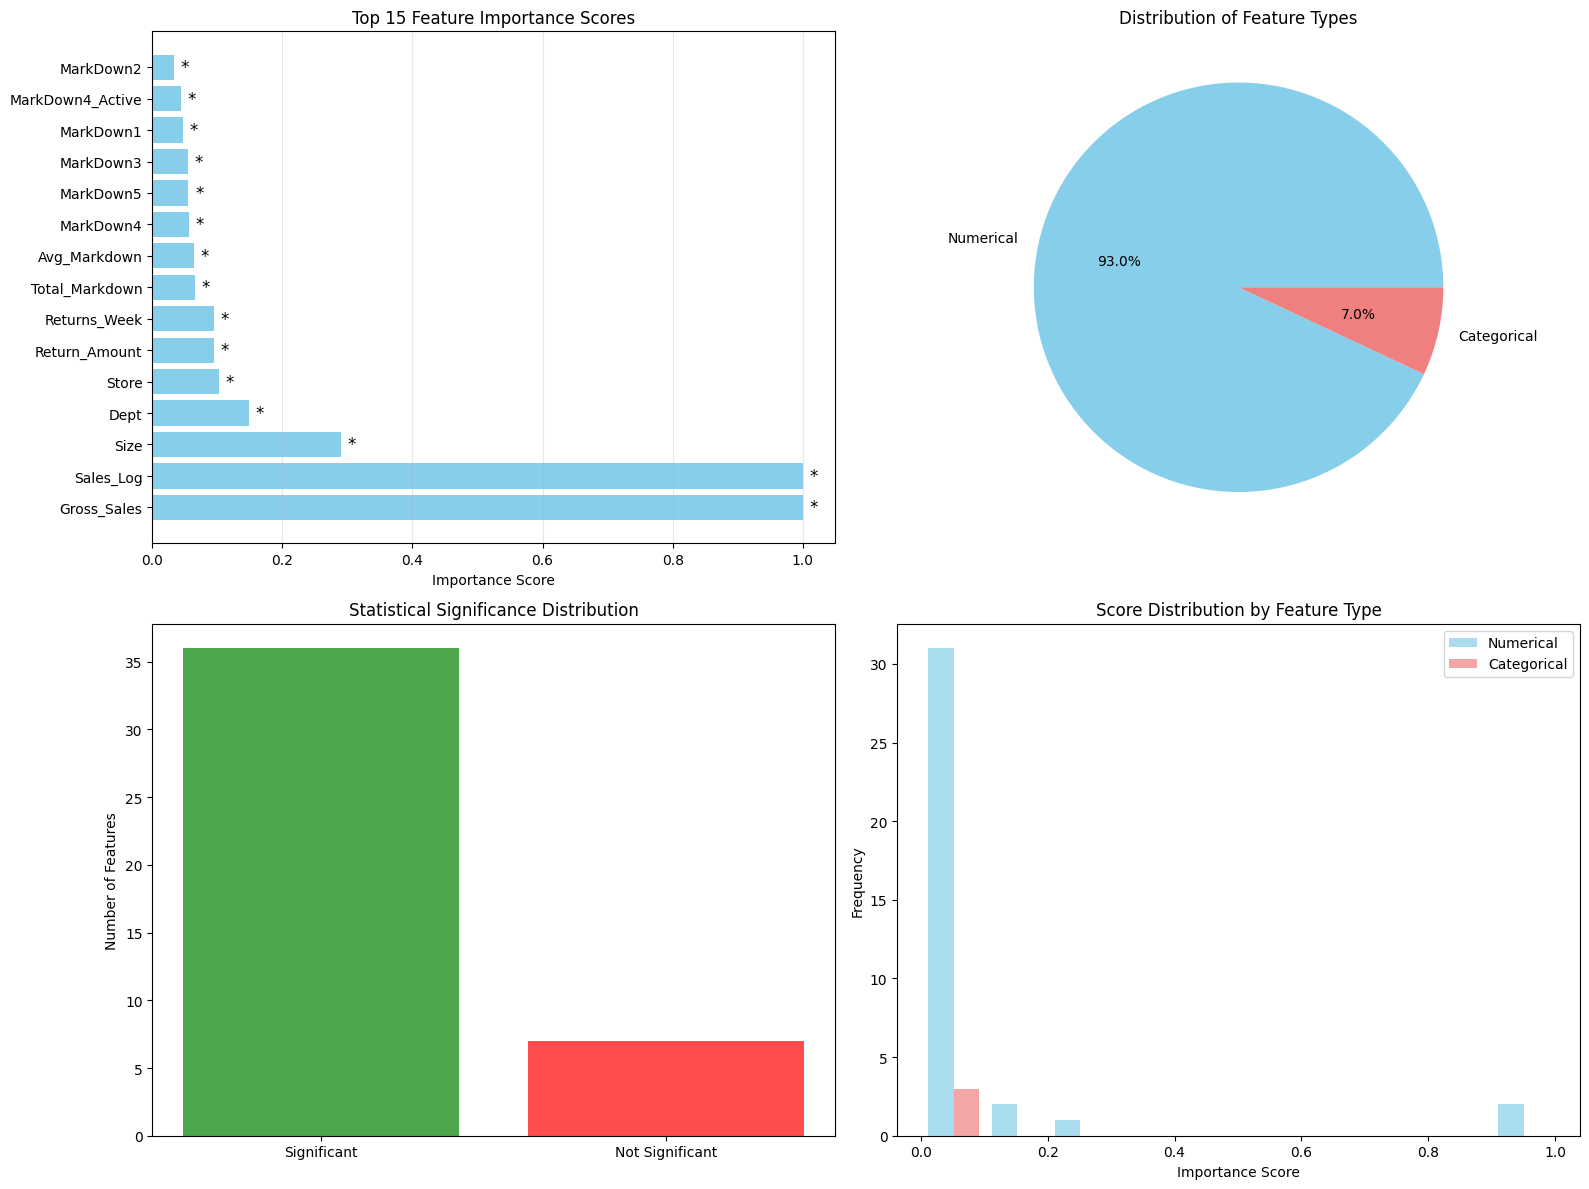


=== FEATURE SELECTION RESULTS ===
Selected top 15 features:
Number of selected features: 15
Selected features:
   1. Gross_Sales     (Type: Numerical, Score: 1.000)
   2. Sales_Log       (Type: Numerical, Score: 1.000)
   3. Size            (Type: Numerical, Score: 0.290)
   4. Dept            (Type: Numerical, Score: 0.148)
   5. Store           (Type: Numerical, Score: 0.102)
   6. Return_Amount   (Type: Numerical, Score: 0.095)
   7. Returns_Week    (Type: Numerical, Score: 0.095)
   8. Total_Markdown  (Type: Numerical, Score: 0.065)
   9. Avg_Markdown    (Type: Numerical, Score: 0.064)
  10. MarkDown4       (Type: Numerical, Score: 0.056)
  11. MarkDown5       (Type: Numerical, Score: 0.056)
  12. MarkDown3       (Type: Numerical, Score: 0.055)
  13. MarkDown1       (Type: Numerical, Score: 0.047)
  14. MarkDown4_Active (Type: Numerical, Score: 0.043)
  15. MarkDown2       (Type: Numerical, Score: 0.034)


In [41]:
results_df, feature_results = comprehensive_feature_selection(data)
create_feature_importance_visualizations(results_df)
selected_features = select_features_by_threshold(results_df, top_k=15)

In [26]:
print("=" * 60)
print("MULTICOLLINEARITY CHECK (VIF)")
print("=" * 60)

from statsmodels.stats.outliers_influence import variance_inflation_factor

num_features = [f for f in selected_features if data[f].dtype in ['int64', 'float64']]
sample = data[num_features].sample(n=min(10000, len(data)), random_state=42)

vif_data = pd.DataFrame()
vif_data["Feature"] = sample.columns
vif_data["VIF"] = [variance_inflation_factor(sample.values, i) for i in range(len(sample.columns))]
vif_data = vif_data.sort_values('VIF', ascending=False)

print("\nTop 10 Features by VIF:")
print(vif_data.head(10).to_string(index=False))

high_vif = vif_data[vif_data['VIF'] > 10]
if len(high_vif) > 0:
    print(f"\n⚠️  {len(high_vif)} features have VIF > 10")
    print("💡 Tree-based models handle this well; linear models use regularization")
else:
    print("\n✓ No severe multicollinearity (all VIF < 10)")

MULTICOLLINEARITY CHECK (VIF)

Top 10 Features by VIF:
         Feature        VIF
  Total_Markdown 217.816234
    Avg_Markdown 213.887212
       Sales_Log  12.394703
       MarkDown1   7.504309
            Size   6.743224
       MarkDown4   4.946101
           Store   3.511006
MarkDown4_Active   3.435866
            Dept   2.911678
       MarkDown5   2.417303

⚠️  3 features have VIF > 10
💡 Tree-based models handle this well; linear models use regularization


---

# Data Preparation and Model Evaluation

Preparing the Walmart sales dataset and evaluating model performance. Data preparation involves cleaning, transforming, and engineering features to ensure compatibility with predictive models, while model evaluation uses appropriate metrics (e.g., RMSE, MAE) to assess forecasting accuracy.

---

In [27]:
data['Date'] = pd.to_datetime(data['Date'])

data['Store'] = data['Store'].astype('category')
data['Dept'] = data['Dept'].astype('category')
data['Type'] = data['Type'].astype('category')

data['IsHoliday'] = data['IsHoliday'].astype(int)

data[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = \
    data[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)

data['Month_sin'] = np.sin(2 * np.pi * data['Month'] / 12)
data['Month_cos'] = np.cos(2 * np.pi * data['Month'] / 12)
data['Week_sin'] = np.sin(2 * np.pi * data['Week'] / 52)
data['Week_cos'] = np.cos(2 * np.pi * data['Week'] / 52)

# Find the global date range
min_date = data['Date'].min()
max_date = data['Date'].max()
date_range = (max_date - min_date).days

# Split by DATE, not by row count
split_date = min_date + pd.Timedelta(days=int(date_range * 0.8))

print(f"Date range: {min_date} to {max_date}")
print(f"Split date: {split_date}")
print(f"Train period: {min_date} to {split_date}")
print(f"Test period: {split_date} to {max_date}")

# Ensure all stores have data in both train and test
data = data.sort_values(['Store', 'Dept', 'Date'])
train_data = data[data['Date'] < split_date].copy()
test_data = data[data['Date'] >= split_date].copy()

print(f"\nTrain size: {len(train_data)} ({len(train_data)/len(data)*100:.1f}%)")
print(f"Test size: {len(test_data)} ({len(test_data)/len(data)*100:.1f}%)")

# Verify all stores exist in both sets
train_stores = set(train_data['Store'].unique())
test_stores = set(test_data['Store'].unique())
assert train_stores == test_stores, f"Store mismatch! Train only: {train_stores - test_stores}, Test only: {test_stores - train_stores}"

num_cols = ['Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 
            'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 
            'Month_sin', 'Month_cos', 'Week_sin', 'Week_cos', 'Lag_1', 'Rolling_Avg_4']
cat_cols = ['Store', 'Dept', 'Type', 'IsHoliday']



Date range: 2010-02-05 00:00:00 to 2012-10-26 00:00:00
Split date: 2012-04-10 00:00:00
Train period: 2010-02-05 00:00:00 to 2012-04-10 00:00:00
Test period: 2012-04-10 00:00:00 to 2012-10-26 00:00:00

Train size: 335761 (79.6%)
Test size: 85809 (20.4%)


AUTOCORRELATION ANALYSIS


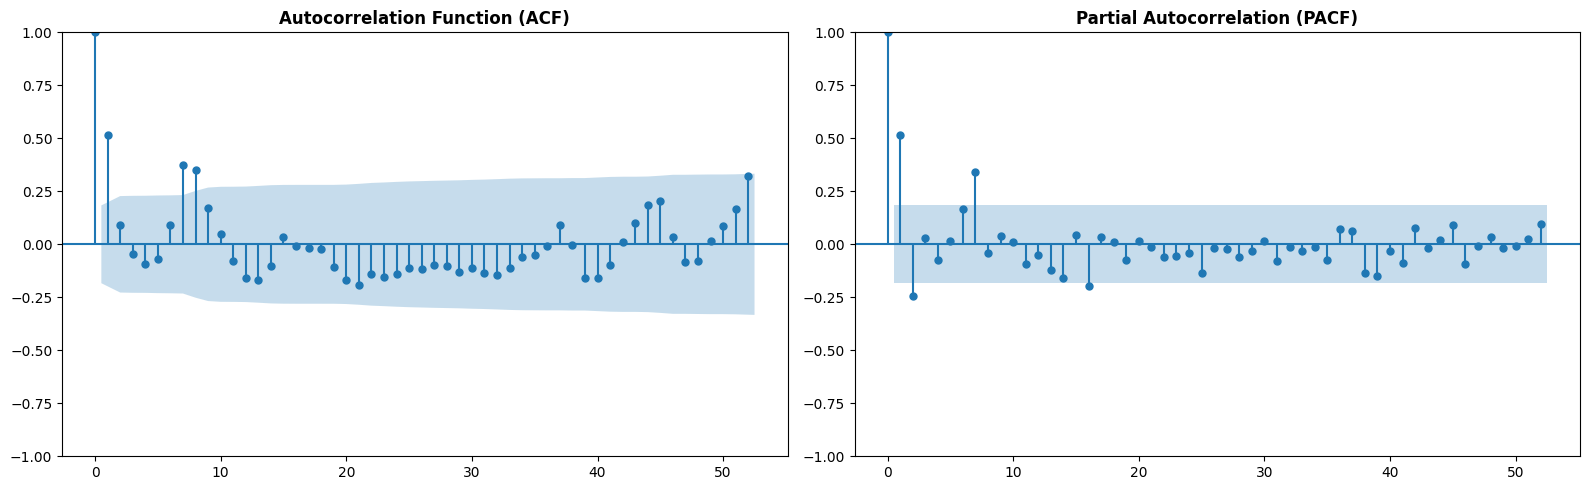

✓ ACF confirms weekly momentum (lags 1-4) and yearly seasonality (lag 52)


In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

print("=" * 60)
print("AUTOCORRELATION ANALYSIS")
print("=" * 60)

# Sample store-dept for ACF/PACF
sample_ts = train_data[(train_data['Store'] == 1) & (train_data['Dept'] == 1)].sort_values('Date')['Weekly_Sales']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
plot_acf(sample_ts, lags=52, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)', fontweight='bold')
plot_pacf(sample_ts, lags=52, ax=ax2)
ax2.set_title('Partial Autocorrelation (PACF)', fontweight='bold')
plt.tight_layout()
plt.show()

print("✓ ACF confirms weekly momentum (lags 1-4) and yearly seasonality (lag 52)")

In [29]:
print("\n" + "="*60)
print("CREATING LAG FEATURES + TRAIN/TEST SPLIT")
print("="*60)

# ========================================
# 1. Sort data by time
# ========================================
data = data.sort_values(['Store', 'Dept', 'Date'])

# ========================================
# 2. Create Lag Features (on FULL data first)
# ========================================
print("\nCreating comprehensive lag features...")

def add_comprehensive_lag_features(df):
    """Add multiple lag and rolling features"""
    df = df.sort_values(['Store', 'Dept', 'Date']).copy()
    
    # Multiple lag features
    for lag in [1, 2, 3, 4, 52]:
        df[f'Lag_{lag}'] = df.groupby(['Store', 'Dept'])['Gross_Sales'].shift(lag)
    
    # Multiple rolling windows
    for window in [4, 8, 12]:
        df[f'Rolling_Avg_{window}'] = df.groupby(['Store', 'Dept'])['Gross_Sales'].transform(
            lambda x: x.rolling(window, min_periods=1).mean().shift(1)
        )
        df[f'Rolling_Std_{window}'] = df.groupby(['Store', 'Dept'])['Gross_Sales'].transform(
            lambda x: x.rolling(window, min_periods=1).std().shift(1)
        )
    
    # Sales momentum
    df['Sales_Momentum'] = df.groupby(['Store', 'Dept'])['Lag_1'].diff()
    
    return df

# Apply lag features to full dataset
data = add_comprehensive_lag_features(data)

print(f"✓ Created lag features: {[col for col in data.columns if col.startswith(('Lag_', 'Rolling_', 'Sales_'))]}")

# ========================================
# 3. Train/Test Split BY DATE (not row count!)
# ========================================
print("\nSplitting data by date...")

# Find date range
min_date = data['Date'].min()
max_date = data['Date'].max()
date_range_days = (max_date - min_date).days

# Split at 80% of date range
split_date = min_date + pd.Timedelta(days=int(date_range_days * 0.8))

print(f"Date range: {min_date.date()} to {max_date.date()}")
print(f"Split date: {split_date.date()}")

train_data = data[data['Date'] < split_date].copy()
test_data = data[data['Date'] >= split_date].copy()

print(f"Train size: {len(train_data)} ({len(train_data)/len(data)*100:.1f}%)")
print(f"Test size: {len(test_data)} ({len(test_data)/len(data)*100:.1f}%)")

# ========================================
# 4. Fill NaN in Lag Features
# ========================================
print("\nFilling NaN in lag features...")

lag_cols = [col for col in data.columns if col.startswith(('Lag_', 'Rolling_', 'Sales_'))]

# Fill with 0 (cold start periods)
train_data[lag_cols] = train_data[lag_cols].fillna(0)
test_data[lag_cols] = test_data[lag_cols].fillna(0)

print(f"✓ Train missing values: {train_data[lag_cols].isnull().sum().sum()}")
print(f"✓ Test missing values: {test_data[lag_cols].isnull().sum().sum()}")

# ========================================
# 5. Define Feature Lists
# ========================================
num_cols = ['Size', 'Temperature', 'Fuel_Price', 
            'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 
            'CPI', 'Unemployment',
            'Month_sin', 'Month_cos', 'Week_sin', 'Week_cos',
            'Is_SuperBowl', 'Is_Thanksgiving', 'Is_Christmas',
            'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_52',
            'Rolling_Avg_4', 'Rolling_Avg_8', 'Rolling_Avg_12',
            'Rolling_Std_4', 'Rolling_Std_8', 'Rolling_Std_12',
            'Sales_Momentum']

cat_cols = ['Store', 'Dept', 'Type', 'IsHoliday']

print(f"\n✓ Total features: {len(num_cols) + len(cat_cols)}")
print(f"  Numerical: {len(num_cols)}")
print(f"  Categorical: {len(cat_cols)}")
print("\n" + "="*60)


CREATING LAG FEATURES + TRAIN/TEST SPLIT

Creating comprehensive lag features...
✓ Created lag features: ['Sales_Log', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_52', 'Rolling_Avg_4', 'Rolling_Std_4', 'Rolling_Avg_8', 'Rolling_Std_8', 'Rolling_Avg_12', 'Rolling_Std_12', 'Sales_Momentum']

Splitting data by date...
Date range: 2010-02-05 to 2012-10-26
Split date: 2012-04-10
Train size: 335761 (79.6%)
Test size: 85809 (20.4%)

Filling NaN in lag features...
✓ Train missing values: 0
✓ Test missing values: 0

✓ Total features: 33
  Numerical: 29
  Categorical: 4



In [30]:
def add_time_features(df, lag_weeks=1, rolling_window=4):
    df = df.sort_values(['Store', 'Dept', 'Date'])
    df['Lag_1'] = df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(lag_weeks)
    df['Rolling_Avg_4'] = df.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(
        lambda x: x.rolling(rolling_window, min_periods=1, closed='left').mean()
    )
    return df
def add_time_features_comprehensive(df, is_training=True):
    """
    Add comprehensive time-series features
    is_training: If True, compute on current df. If False, requires historical data passed separately
    """
    df = df.sort_values(['Store', 'Dept', 'Date']).copy()
    
    # Multiple lag features for different time scales
    lag_periods = [1, 2, 3, 4, 52]  # Last week, 2-4 weeks ago, same week last year
    for lag in lag_periods:
        df[f'Lag_{lag}'] = df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(lag)
    
    # Multiple rolling windows for different trend lengths
    for window in [4, 8, 12, 26]:  # 1 month, 2 months, 3 months, 6 months
        df[f'Rolling_Avg_{window}'] = df.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(
            lambda x: x.rolling(window, min_periods=1, closed='left').mean()
        )
        df[f'Rolling_Std_{window}'] = df.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(
            lambda x: x.rolling(window, min_periods=1, closed='left').std()
        )
    
    # Expanding window features (cumulative)
    df['Expanding_Mean'] = df.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(
        lambda x: x.expanding(min_periods=1).mean().shift(1)
    )
    
    # Sales momentum (acceleration)
    df['Sales_Momentum'] = df.groupby(['Store', 'Dept'])['Lag_1'].diff()
    
    # Coefficient of variation (volatility measure)
    df['Sales_CV_12w'] = df['Rolling_Std_12'] / (df['Rolling_Avg_12'] + 1)
    
    return df

In [31]:
# Apply comprehensive lag features to train
train_data = add_time_features_comprehensive(train_data.copy(), is_training=True)

# For test, need historical context (take max of all lag periods needed)
max_lag_needed = 52  # Maximum lag we're using
last_train_rows = train_data.groupby(['Store', 'Dept']).tail(max_lag_needed)

# Combine and compute test lags
temp_data = pd.concat([last_train_rows, test_data], ignore_index=False)
temp_data = temp_data.sort_values(['Store', 'Dept', 'Date'])
test_data_with_lags = add_time_features_comprehensive(temp_data, is_training=False)

# Extract only test period
test_data = test_data_with_lags[test_data_with_lags['Date'] >= split_date].copy()

# Handle cold start problem (Store-Dept in test but not train)
cold_start_mask = test_data['Lag_1'].isnull()
if cold_start_mask.sum() > 0:
    print(f"WARNING: {cold_start_mask.sum()} rows have no historical data (cold start)")
    # Fill with store-dept averages from training data
    store_dept_means = train_data.groupby(['Store', 'Dept'])['Weekly_Sales'].mean()
    test_data['Lag_1'] = test_data.apply(
        lambda row: store_dept_means.get((row['Store'], row['Dept']), train_data['Weekly_Sales'].median()) 
        if pd.isnull(row['Lag_1']) else row['Lag_1'], 
        axis=1
    )

# Final fillna for all lag features (use forward fill within Store-Dept, then 0)
lag_cols = [col for col in test_data.columns if col.startswith(('Lag_', 'Rolling_', 'Expanding', 'Sales_'))]
test_data[lag_cols] = test_data.groupby(['Store', 'Dept'])[lag_cols].fillna(method='ffill').fillna(0)
train_data[lag_cols] = train_data[lag_cols].fillna(0)

print(f"Train shape: {train_data.shape}, Test shape: {test_data.shape}")
print(f"Lag features created: {len(lag_cols)}")

Train shape: (335761, 63), Test shape: (85809, 63)
Lag features created: 17


In [32]:
# Store-Department baseline performance
def add_store_dept_features(train, test):
    # Calculate baselines from training data only
    store_dept_stats = train.groupby(['Store', 'Dept']).agg({
        'Weekly_Sales': ['mean', 'std', 'min', 'max'],
        'Gross_Sales': ['mean', 'std']
    }).reset_index()
    store_dept_stats.columns = ['Store', 'Dept', 'StoreDept_Mean', 'StoreDept_Std', 
                                  'StoreDept_Min', 'StoreDept_Max', 
                                  'StoreDept_GrossMean', 'StoreDept_GrossStd']
    
    # Merge to both train and test
    train = train.merge(store_dept_stats, on=['Store', 'Dept'], how='left')
    test = test.merge(store_dept_stats, on=['Store', 'Dept'], how='left')
    
    # Relative performance metrics
    train['Sales_vs_Baseline'] = train['Gross_Sales'] / (train['StoreDept_Mean'] + 1)
    test['Sales_vs_Baseline'] = test['Gross_Sales'] / (test['StoreDept_Mean'] + 1)
    
    return train, test

# Store-level aggregations (competitive interaction)
def add_store_level_features(df):
    # Total store sales for this week (across all departments)
    df['Store_Total_Sales'] = df.groupby(['Store', 'Date'])['Gross_Sales'].transform('sum')
    
    # This department's share of store sales
    df['Dept_Share_of_Store'] = df['Gross_Sales'] / (df['Store_Total_Sales'] + 1)
    
    # Number of departments active this week in this store
    df['Store_Dept_Count'] = df.groupby(['Store', 'Date'])['Dept'].transform('count')
    
    return df

# Macro-economic interactions
def add_macro_interactions(df):
    # Larger stores more sensitive to unemployment
    df['Size_x_Unemployment'] = df['Size'] * df['Unemployment']
    
    # Type-specific economic sensitivity
    df['TypeA_x_CPI'] = (df['Type'] == 'A').astype(int) * df['CPI']
    df['TypeB_x_CPI'] = (df['Type'] == 'B').astype(int) * df['CPI']
    
    return df

# Department-Holiday interactions
def add_dept_holiday_interactions(train, test):
    # Calculate holiday lift by department from training data
    holiday_dept_lift = train.groupby(['Dept', 'IsHoliday'])['Gross_Sales'].mean().unstack(fill_value=0)
    holiday_dept_lift['Holiday_Lift'] = (holiday_dept_lift[1] / holiday_dept_lift[0]).replace([np.inf, -np.inf], 1)
    holiday_dept_lift = holiday_dept_lift[['Holiday_Lift']].reset_index()
    
    # Merge to both sets
    train = train.merge(holiday_dept_lift, on='Dept', how='left')
    test = test.merge(holiday_dept_lift, on='Dept', how='left')
    
    # Interaction: This dept's holiday sensitivity × IsHoliday
    train['Dept_Holiday_Expected_Lift'] = train['Holiday_Lift'] * train['IsHoliday']
    test['Dept_Holiday_Expected_Lift'] = test['Holiday_Lift'] * test['IsHoliday']
    
    return train, test

# Apply all feature engineering
print("Adding Store-Dept baseline features...")
train_data, test_data = add_store_dept_features(train_data, test_data)

print("Adding store-level competition features...")
train_data = add_store_level_features(train_data)
test_data = add_store_level_features(test_data)

print("Adding macro-economic interactions...")
train_data = add_macro_interactions(train_data)
test_data = add_macro_interactions(test_data)

print("Adding department-holiday interactions...")
train_data, test_data = add_dept_holiday_interactions(train_data, test_data)

print(f"\nFinal feature count: {train_data.shape[1]} columns")

Adding Store-Dept baseline features...
Adding store-level competition features...
Adding macro-economic interactions...
Adding department-holiday interactions...

Final feature count: 78 columns


In [33]:
# ========================================
# FINAL FEATURE DEFINITION
# ========================================
print("="*60)
print("DEFINING FINAL FEATURE SET FOR MODELING")
print("="*60)

# Define the full list of features to be used
# This list should include all original, engineered, and lag features.
selected_features = [
    # Base Features
    'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
    
    # Categorical Features (will be handled by the preprocessor)
    'Store', 'Dept', 'Type', 'IsHoliday',

    # Markdown Features (Original and Engineered)
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
    'Promo_Active', 'Promo_Count', 'Total_Markdown',

    # Cyclical Time Features
    'Month_sin', 'Month_cos', 'Week_sin', 'Week_cos',

    # Specific Holiday Features
    'Is_SuperBowl', 'Is_Thanksgiving', 'Is_Christmas',

    # Lag and Rolling Window Features
    'Lag_1', 'Lag_2', 'Lag_4', 'Lag_52',
    'Rolling_Avg_4', 'Rolling_Avg_8', 'Rolling_Avg_12',
    'Rolling_Std_4', 'Rolling_Std_8', 'Rolling_Std_12',
    'Sales_Momentum',

    # Store/Dept Interaction Features
    'StoreDept_Mean', 'StoreDept_Std', 'Sales_vs_Baseline',
    'Store_Total_Sales', 'Dept_Share_of_Store',
    'Size_x_Unemployment', 'Dept_Holiday_Expected_Lift'
]

# Ensure all selected features actually exist in the dataframe to prevent errors
existing_features = [f for f in selected_features if f in train_data.columns]
if len(existing_features) != len(selected_features):
    print(f"WARNING: The following features were defined but not found in the data: {set(selected_features) - set(existing_features)}")

# Separate into numeric and categorical lists FOR THE PREPROCESSOR
numeric_features = [f for f in existing_features if train_data[f].dtype in ['int64', 'float64', 'int32']]
categorical_features = [f for f in existing_features if f in ['Store', 'Dept', 'Type', 'IsHoliday']]


print(f"✓ Using {len(existing_features)} features for modeling.")
print(f"  - {len(numeric_features)} Numerical features")
print(f"  - {len(categorical_features)} Categorical features")
print("="*60)

DEFINING FINAL FEATURE SET FOR MODELING
✓ Using 42 features for modeling.
  - 37 Numerical features
  - 4 Categorical features


In [35]:
# ========================================
# CORRECTED DIAGNOSTIC: Check for NaN/Inf before modeling
# ========================================
print("="*60)
print("DIAGNOSING MISSING VALUES BEFORE MODELING")
print("="*60)

# Check for NaN values across all features
nan_check = train_data[existing_features].isnull().sum()

# CORRECTED: Check for Inf values ONLY in numeric features
inf_check = np.isinf(train_data[numeric_features]).sum()

# Get a list of all columns with issues
nan_cols = nan_check[nan_check > 0].index
inf_cols = inf_check[inf_check > 0].index
problematic_cols = nan_cols.union(inf_cols)

if not problematic_cols.empty:
    print(f"⚠️ Found issues in the following {len(problematic_cols)} columns:")
    for col in problematic_cols:
        nan_count = nan_check.get(col, 0)
        inf_count = inf_check.get(col, 0)
        print(f"  - Column '{col}': {nan_count} NaNs, {inf_count} Infs")
    print("\n💡 These will be handled by the SimpleImputer in the model pipeline.")
else:
    print("✓ No NaN or Inf values found in the feature set.")
print("="*60)

DIAGNOSING MISSING VALUES BEFORE MODELING
⚠️ Found issues in the following 2 columns:
  - Column 'StoreDept_Std': 33 NaNs, 0 Infs
  - Column 'Dept_Holiday_Expected_Lift': 7 NaNs, 0 Infs

💡 These will be handled by the SimpleImputer in the model pipeline.


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import TimeSeriesSplit
import time

print("="*60)
print("PREPARING DATA FOR MODEL TRAINING (LOG-TRANSFORM VERSION)")
print("="*60)

# 1. Use the FINAL feature lists defined in cell 33
# (Run cell 33 again if you are not sure)
X_train = train_data[existing_features]
X_test = test_data[existing_features]

# 2. Use the LOG-TRANSFORMED target
y_train = train_data['Sales_Log']
y_test = test_data['Sales_Log']

# 3. Keep original scale for final evaluation
y_train_original = train_data['Gross_Sales']
y_test_original = test_data['Gross_Sales']

print(f"✓ X_train shape: {X_train.shape}")
print(f"✓ y_train shape: {y_train.shape} (using Sales_Log)")
print(f"✓ X_test shape: {X_test.shape}")
print(f"✓ y_test shape: {y_test.shape} (using Sales_Log)")

# 4. Initialize results storage
results = {}

# 5. Setup Time-Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)

# 6. Define preprocessors using the FINAL feature lists
#    (numeric_features and categorical_features from cell 33)
preprocessors = {
    'linear': ColumnTransformer(transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        # Force dense output for linear models
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ], remainder='passthrough'),
    
    'tree': ColumnTransformer(transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_features),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features)
    ], remainder='passthrough')
}

print("\n✓ Preprocessing pipelines created.")
print(f"  Linear preprocessor will handle {len(numeric_features)} num + {len(categorical_features)} cat features.")
print(f"  Tree preprocessor will handle {len(numeric_features)} num + {len(categorical_features)} cat features.")
print("="*60)

PREPARING DATA FOR MODEL TRAINING (LOG-TRANSFORM VERSION)
✓ X_train shape: (335761, 42)
✓ y_train shape: (335761,) (using Sales_Log)
✓ X_test shape: (85809, 42)
✓ y_test shape: (85809,) (using Sales_Log)

✓ Preprocessing pipelines created.
  Linear preprocessor will handle 37 num + 4 cat features.
  Tree preprocessor will handle 37 num + 4 cat features.


In [38]:
import os
# --- CORRECTED SAMPLING METHOD ---
print("Creating a time-series-aware sample for the Streamlit app...")

# 1. Identify all unique store-department pairs in your test data
unique_pairs = test_data[['Store', 'Dept']].drop_duplicates()
print(f"Found {len(unique_pairs)} unique Store-Dept pairs in the test data.")

# 2. Randomly select a SUBSET of these pairs (e.g., 50)
# This gives you a good variety without making the file too large.
num_pairs_to_sample = 50 
sampled_pairs = unique_pairs.sample(n=min(num_pairs_to_sample, len(unique_pairs)), random_state=42)
print(f"Sampling all historical data for {len(sampled_pairs)} pairs...")

# 3. Filter the original test_data to get ALL rows for the selected pairs
time_series_sample_df = pd.merge(test_data, sampled_pairs, on=['Store', 'Dept'], how='inner')

# 4. Save this new, corrected sample
output_path = 'data/test_sample.csv'
if not os.path.exists('data'):
    os.makedirs('data')
time_series_sample_df.to_csv(output_path, index=False)

print(f"✓ Successfully saved a time-series-aware sample with {len(time_series_sample_df)} rows to: {output_path}")

Creating a time-series-aware sample for the Streamlit app...
Found 3168 unique Store-Dept pairs in the test data.
Sampling all historical data for 50 pairs...
✓ Successfully saved a time-series-aware sample with 1371 rows to: data/test_sample.csv


In [39]:
# --- NEW METHOD: SAVING THE FULL TEST DATASET ---
import os

# Define a new, clearer filename for the app's data source
output_path = 'data/app_data.csv'

# Create the directory if it doesn't exist
if not os.path.exists('data'):
    os.makedirs('data')

# Save the ENTIRE test_data DataFrame
# This contains the full time-series for all store-dept pairs in the test set.
test_data.to_csv(output_path, index=False)

print(f"✓ Successfully saved the FULL test dataset ({len(test_data)} rows) to: {output_path}")

✓ Successfully saved the FULL test dataset (85809 rows) to: data/app_data.csv


---
LINEAR REGRESSION MODEL

---

In [34]:
from sklearn.preprocessing import RobustScaler # <--- Import RobustScaler

print("="*60)
print("UPGRADE: Redefining preprocessor with RobustScaler")
print("="*60)

# Define preprocessors with the RobustScaler fix
preprocessors = {
    'linear': ColumnTransformer(transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', RobustScaler()) # <--- USE RobustScaler
        ]), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ], remainder='passthrough'),
    
    'tree': ColumnTransformer(transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_features),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features)
    ], remainder='passthrough')
}

print("✓ Preprocessors redefined.")
print("  The 'linear' preprocessor now uses RobustScaler.")

UPGRADE: Redefining preprocessor with RobustScaler
✓ Preprocessors redefined.
  The 'linear' preprocessor now uses RobustScaler.


In [37]:
from sklearn.linear_model import RidgeCV # <--- Import RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import time

print("=" * 80)
print("OPTIMIZED RIDGE TUNING with RidgeCV (Log-Transform) + Extra Logging")
print("=" * 80)

# 1. Define a wider range of alphas to test
alphas_to_try = np.logspace(-2, 4, 20) # 20 steps from 0.01 to 10,000

# 2. Define the base pipeline using RidgeCV
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessors['linear']),
    # RidgeCV will automatically find the best alpha from our list
    ('regressor', RidgeCV(alphas=alphas_to_try, cv=tscv, scoring='r2')) 
])


print(f"\n[LOG] Starting automated RidgeCV fit (testing {len(alphas_to_try)} alphas across 5 folds)...")
start_time = time.time()
# 3. Fit the pipeline directly.
ridge_pipeline.fit(X_train, y_train)
end_time = time.time()
print(f"[LOG] RidgeCV fit completed in {(end_time - start_time)/60:.2f} minutes.")

# 4. Get the best model and best alpha
best_alpha = ridge_pipeline.named_steps['regressor'].alpha_
print("\n--- RidgeCV Results ---")
print(f"Best Alpha Found: {best_alpha:.4f}")
print(f"Best CV R² Score: {ridge_pipeline.named_steps['regressor'].best_score_:.4f}")

# 5. Make predictions (on transformed scale)
print("\n[LOG] Starting predictions on train and test sets...")
ridge_train_pred = ridge_pipeline.predict(X_train)
ridge_test_pred = ridge_pipeline.predict(X_test)
print("[LOG] Predictions complete.")

# 6. Inverse transform predictions back to original scale
print("[LOG] Inverse transforming predictions using np.expm1()...")
ridge_train_pred_original = np.expm1(ridge_train_pred)
ridge_test_pred_original = np.expm1(ridge_test_pred)

# 7. Clean up any NaN/inf/negative values
print("[LOG] Cleaning predictions (NaNs, negatives)...")
train_nan_count = np.isnan(ridge_train_pred_original).sum()
test_nan_count = np.isnan(ridge_test_pred_original).sum()

if train_nan_count > 0 or test_nan_count > 0:
    print(f"    ⚠️  Found {train_nan_count} NaNs in training and {test_nan_count} in test.")
    print("        Replacing them with 0.")
    ridge_train_pred_original = np.nan_to_num(ridge_train_pred_original, nan=0.0, posinf=0.0, neginf=0.0)
    ridge_test_pred_original = np.nan_to_num(ridge_test_pred_original, nan=0.0, posinf=0.0, neginf=0.0)

ridge_train_pred_original = np.maximum(0, ridge_train_pred_original)
ridge_test_pred_original = np.maximum(0, ridge_test_pred_original)
print("[LOG] Cleaning complete.")

# 8. Evaluate the cleaned predictions on the ORIGINAL scale
print("[LOG] Calculating final metrics on original scale...")
ridge_results = {
    'train_rmse': np.sqrt(mean_squared_error(y_train_original, ridge_train_pred_original)),
    'test_rmse': np.sqrt(mean_squared_error(y_test_original, ridge_test_pred_original)),
    'train_mae': mean_absolute_error(y_train_original, ridge_train_pred_original),
    'test_mae': mean_absolute_error(y_test_original, ridge_test_pred_original),
    'train_r2': r2_score(y_train_original, ridge_train_pred_original),
    'test_r2': r2_score(y_test_original, ridge_test_pred_original),
    'train_pred': ridge_train_pred_original,
    'test_pred': ridge_test_pred_original
}
print("[LOG] Metrics calculation complete.")

print(f"\nFinal Optimized RidgeCV Results (Original Scale):")
print(f"  Train RMSE: ${ridge_results['train_rmse']:,.2f}")
print(f"  Test RMSE:  ${ridge_results['test_rmse']:,.2f}")
print(f"  Train R²:   {ridge_results['train_r2']:.4f}")
print(f"  Test R²:    {ridge_results['test_r2']:.4f}")

# Store results
results['Ridge'] = ridge_results

OPTIMIZED RIDGE TUNING with RidgeCV (Log-Transform) + Extra Logging

[LOG] Starting automated RidgeCV fit (testing 20 alphas across 5 folds)...
[LOG] RidgeCV fit completed in 3.50 minutes.

--- RidgeCV Results ---
Best Alpha Found: 61.5848
Best CV R² Score: 0.7018

[LOG] Starting predictions on train and test sets...
[LOG] Predictions complete.
[LOG] Inverse transforming predictions using np.expm1()...
[LOG] Cleaning predictions (NaNs, negatives)...
[LOG] Cleaning complete.
[LOG] Calculating final metrics on original scale...
[LOG] Metrics calculation complete.

Final Optimized RidgeCV Results (Original Scale):
  Train RMSE: $11,797,230,374,510.62
  Test RMSE:  $142,696,245,135,189,164,032.00
  Train R²:   -265411263588039200.0000
  Test R²:    -42231936967310018955369447948288.0000


In [37]:
# Save final pipeline and metadata
import os
import json
import joblib
import numpy as np


MODEL_DIR = "/kaggle/working/ridge_saved_model"   
os.makedirs(MODEL_DIR, exist_ok=True)

# 1) Save the pipeline object (includes preprocessor + regressor)
pipeline_path = os.path.join(MODEL_DIR, "ridge_pipeline.joblib")
joblib.dump(ridge_pipeline, pipeline_path)
print(f"Saved pipeline to: {pipeline_path}")

# 2) Collect metadata 
metadata = {}

# best alpha (if available)
try:
    metadata['best_alpha'] = float(ridge_pipeline.named_steps['regressor'].alpha_)
except Exception:
    metadata['best_alpha'] = None

# best_score_ (CV) if available
try:
    metadata['best_cv_score'] = float(ridge_pipeline.named_steps['regressor'].best_score_)
except Exception:
    metadata['best_cv_score'] = None

# feature names (best-effort): prefer X_train.columns, else try preprocessor.get_feature_names_out
feature_names = None
try:
    if hasattr(X_train, "columns"):
        feature_names = list(X_train.columns)
    else:
        # sklearn ColumnTransformer API (sklearn>=1.0)
        pre = ridge_pipeline.named_steps.get('preprocessor', None)
        if pre is not None and hasattr(pre, "get_feature_names_out"):
            feature_names = list(pre.get_feature_names_out())
except Exception:
    feature_names = None

metadata['feature_names'] = feature_names

# target transform info: you used log1p / expm1 roundtrip
metadata['target_transform'] = "log1p (use np.expm1 to recover original scale)"
metadata['notes'] = "Pipeline expects the same input columns/order as feature_names. \
If feature_names is None, pass a DataFrame with the same columns used for training."

# optionally save sample input schema (if X_train is a DataFrame)
try:
    if hasattr(X_train, "head"):
        metadata['sample_input'] = X_train.head(1).to_dict(orient="records")[0]
except Exception:
    metadata['sample_input'] = None

# Save metadata as JSON
meta_path = os.path.join(MODEL_DIR, "metadata.json")
with open(meta_path, "w") as f:
    json.dump(metadata, f, indent=2, default=str)
print(f"Saved metadata to: {meta_path}")

# 3) (Optional) Save the final predictions or evaluation results
results_path = os.path.join(MODEL_DIR, "ridge_results.joblib")
joblib.dump(results.get('Ridge', {}), results_path)
print(f"Saved final results dict to: {results_path}")



Saved pipeline to: /kaggle/working/ridge_saved_model/ridge_pipeline.joblib
Saved metadata to: /kaggle/working/ridge_saved_model/metadata.json
Saved final results dict to: /kaggle/working/ridge_saved_model/ridge_results.joblib


---
LIGHTGBM MODEL

---

In [40]:
#New
from lightgbm import LGBMRegressor
import lightgbm as lgb
import warnings
import pandas as pd # Make sure pandas is imported
import numpy as np # Make sure numpy is imported
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Ensure metrics are imported

warnings.filterwarnings('ignore', category=UserWarning)

print("=" * 60)
print("LIGHTGBM WITH ENHANCED HYPERPARAMETER TUNING (GPU-ENABLED)")
print("=" * 60)

# 1. EXPANDED Hyperparameter grid
lgbm_params_grid = [
    {'n_estimators': 300, 'learning_rate': 0.1, 'num_leaves': 31},
    {'n_estimators': 500, 'learning_rate': 0.05, 'num_leaves': 63},
    {'n_estimators': 700, 'learning_rate': 0.03, 'num_leaves': 127},
    {'n_estimators': 1000, 'learning_rate': 0.02, 'num_leaves': 150}, # Deeper and slower
    {'n_estimators': 1200, 'learning_rate': 0.02, 'num_leaves': 180},
    {'n_estimators': 1500, 'learning_rate': 0.02, 'num_leaves': 200},
]

best_lgbm_score = -np.inf
best_lgbm_params = None

print(f"Testing {len(lgbm_params_grid)} parameter combinations using {tscv.n_splits}-fold TimeSeriesSplit...")

for params in lgbm_params_grid:
    print(f"\n[LOG] Testing params: {params}")
    cv_scores = []
    
    for fold, (train_idx, val_idx) in enumerate(tscv.split(X_train)):
        X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # Preprocess
        preprocessor = preprocessors['tree']
        X_train_processed = preprocessor.fit_transform(X_train_cv)
        X_val_processed = preprocessor.transform(X_val_cv)
        
        # Get categorical feature indices
        cat_indices = list(range(len(numeric_features), len(numeric_features) + len(categorical_features)))
        
        # 2. ADDED GPU ACCELERATION
        lgbm = LGBMRegressor(
            **params,
            device='gpu', # <--- USE GPU
            min_child_samples=20,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            #categorical_feature=cat_indices,
            verbose=-1
        )
        
        lgbm.fit(
            X_train_processed, y_train_cv,
            eval_set=[(X_val_processed, y_val_cv)],
            callbacks=[
                lgb.early_stopping(stopping_rounds=50, verbose=False),
                lgb.log_evaluation(period=0)
            ]
        )
        
        y_val_pred = lgbm.predict(X_val_processed)
        score = r2_score(y_val_cv, y_val_pred)
        cv_scores.append(score)
        print(f"  ... Fold {fold+1}/{tscv.n_splits}, R² = {score:.4f}")
    
    mean_cv_score = np.mean(cv_scores)
    print(f"[LOG] Result: CV R² = {mean_cv_score:.4f} ± {np.std(cv_scores):.4f}")
    
    if mean_cv_score > best_lgbm_score:
        best_lgbm_score = mean_cv_score
        best_lgbm_params = params

print(f"\nBest LightGBM params found: {best_lgbm_params}")
print(f"Best CV R² Score (on log-scale): {best_lgbm_score:.4f}")

# Train final model
print("\n[LOG] Training final model on all training data...")
preprocessor = preprocessors['tree']
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# 3. ROBUST FEATURE NAME GATHERING
try:
    feature_names = preprocessor.get_feature_names_out()
    print(f"[LOG] Successfully extracted {len(feature_names)} feature names from preprocessor.")
except:
    print("[LOG] Could not use get_feature_names_out(), falling back to 'existing_features' list.")
    feature_names = existing_features # Fallback

cat_indices = list(range(len(numeric_features), len(numeric_features) + len(categorical_features)))

lgbm_final = LGBMRegressor(
    **best_lgbm_params,
    device='gpu', # <--- USE GPU
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    #categorical_feature=cat_indices,
    verbose=-1
)

lgbm_final.fit(X_train_processed, y_train)
print("[LOG] Final model trained.")

# Predictions on transformed scale
lgbm_train_pred = lgbm_final.predict(X_train_processed)
lgbm_test_pred = lgbm_final.predict(X_test_processed)
print("[LOG] Predictions complete.")

# 4. CRITICAL FIX: Inverse transform to original scale
print("[LOG] Inverse transforming predictions with np.expm1()...")
lgbm_train_pred_original = np.expm1(lgbm_train_pred)
lgbm_test_pred_original = np.expm1(lgbm_test_pred)

# Clean up negatives (just in case)
lgbm_train_pred_original = np.maximum(0, lgbm_train_pred_original)
lgbm_test_pred_original = np.maximum(0, lgbm_test_pred_original)

# Calculate metrics
print("[LOG] Calculating metrics on original $ scale...")
lgbm_results = {
    'train_rmse': np.sqrt(mean_squared_error(y_train_original, lgbm_train_pred_original)),
    'test_rmse': np.sqrt(mean_squared_error(y_test_original, lgbm_test_pred_original)),
    'train_mae': mean_absolute_error(y_train_original, lgbm_train_pred_original),
    'test_mae': mean_absolute_error(y_test_original, lgbm_test_pred_original),
    'train_r2': r2_score(y_train_original, lgbm_train_pred_original),
    'test_r2': r2_score(y_test_original, lgbm_test_pred_original),
    'train_pred': lgbm_train_pred_original,
    'test_pred': lgbm_test_pred_original,
    'feature_importance': pd.DataFrame({
        'feature': feature_names, # <--- Use robust feature names
        'importance': lgbm_final.feature_importances_
    }).sort_values('importance', ascending=False)
}

print(f"\nLightGBM Results (Original Scale):")
print(f"  Train RMSE: ${lgbm_results['train_rmse']:,.2f}")
print(f"  Test RMSE:  ${lgbm_results['test_rmse']:,.2f}")
print(f"  Train R²:   {lgbm_results['train_r2']:.4f}")
print(f"  Test R²:    {lgbm_results['test_r2']:.4f}")

print(f"\nTop 10 Most Important Features:")
print(lgbm_results['feature_importance'].head(10).to_string(index=False))

results['LightGBM'] = lgbm_results

LIGHTGBM WITH ENHANCED HYPERPARAMETER TUNING (GPU-ENABLED)
Testing 6 parameter combinations using 5-fold TimeSeriesSplit...

[LOG] Testing params: {'n_estimators': 300, 'learning_rate': 0.1, 'num_leaves': 31}
  ... Fold 1/5, R² = 0.9980
  ... Fold 2/5, R² = 0.9986
  ... Fold 3/5, R² = 0.9990
  ... Fold 4/5, R² = 0.9991
  ... Fold 5/5, R² = 0.9995
[LOG] Result: CV R² = 0.9988 ± 0.0005

[LOG] Testing params: {'n_estimators': 500, 'learning_rate': 0.05, 'num_leaves': 63}
  ... Fold 1/5, R² = 0.9981
  ... Fold 2/5, R² = 0.9989
  ... Fold 3/5, R² = 0.9992
  ... Fold 4/5, R² = 0.9994
  ... Fold 5/5, R² = 0.9997
[LOG] Result: CV R² = 0.9991 ± 0.0006

[LOG] Testing params: {'n_estimators': 700, 'learning_rate': 0.03, 'num_leaves': 127}
  ... Fold 1/5, R² = 0.9981
  ... Fold 2/5, R² = 0.9991
  ... Fold 3/5, R² = 0.9993
  ... Fold 4/5, R² = 0.9994
  ... Fold 5/5, R² = 0.9997
[LOG] Result: CV R² = 0.9991 ± 0.0005

[LOG] Testing params: {'n_estimators': 1000, 'learning_rate': 0.02, 'num_leaves': 1

In [47]:
#New
from lightgbm import LGBMRegressor
import lightgbm as lgb
import warnings
import pandas as pd # Make sure pandas is imported
import numpy as np # Make sure numpy is imported
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Ensure metrics are imported

warnings.filterwarnings('ignore', category=UserWarning)

print("=" * 60)
print("LIGHTGBM WITH ENHANCED HYPERPARAMETER TUNING (GPU-ENABLED)")
print("=" * 60)

# 1. EXPANDED Hyperparameter grid
lgbm_params_grid = [
    {'n_estimators': 1500, 'learning_rate': 0.02, 'num_leaves': 400},
]

best_lgbm_score = -np.inf
best_lgbm_params = None

print(f"Testing {len(lgbm_params_grid)} parameter combinations using {tscv.n_splits}-fold TimeSeriesSplit...")

for params in lgbm_params_grid:
    print(f"\n[LOG] Testing params: {params}")
    cv_scores = []
    
    for fold, (train_idx, val_idx) in enumerate(tscv.split(X_train)):
        X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # Preprocess
        preprocessor = preprocessors['tree']
        X_train_processed = preprocessor.fit_transform(X_train_cv)
        X_val_processed = preprocessor.transform(X_val_cv)
        
        # Get categorical feature indices
        cat_indices = list(range(len(numeric_features), len(numeric_features) + len(categorical_features)))
        
        # 2. ADDED GPU ACCELERATION
        lgbm = LGBMRegressor(
            **params,
            device='gpu', # <--- USE GPU
            min_child_samples=20,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            #categorical_feature=cat_indices,
            verbose=-1
        )
        
        lgbm.fit(
            X_train_processed, y_train_cv,
            eval_set=[(X_val_processed, y_val_cv)],
            callbacks=[
                lgb.early_stopping(stopping_rounds=50, verbose=False),
                lgb.log_evaluation(period=0)
            ]
        )
        
        y_val_pred = lgbm.predict(X_val_processed)
        score = r2_score(y_val_cv, y_val_pred)
        cv_scores.append(score)
        print(f"  ... Fold {fold+1}/{tscv.n_splits}, R² = {score:.4f}")
    
    mean_cv_score = np.mean(cv_scores)
    print(f"[LOG] Result: CV R² = {mean_cv_score:.4f} ± {np.std(cv_scores):.4f}")
    
    if mean_cv_score > best_lgbm_score:
        best_lgbm_score = mean_cv_score
        best_lgbm_params = params

print(f"\nBest LightGBM params found: {best_lgbm_params}")
print(f"Best CV R² Score (on log-scale): {best_lgbm_score:.4f}")

# Train final model
print("\n[LOG] Training final model on all training data...")
preprocessor = preprocessors['tree']
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# 3. ROBUST FEATURE NAME GATHERING
try:
    feature_names = preprocessor.get_feature_names_out()
    print(f"[LOG] Successfully extracted {len(feature_names)} feature names from preprocessor.")
except:
    print("[LOG] Could not use get_feature_names_out(), falling back to 'existing_features' list.")
    feature_names = existing_features # Fallback

cat_indices = list(range(len(numeric_features), len(numeric_features) + len(categorical_features)))

lgbm_final = LGBMRegressor(
    **best_lgbm_params,
    device='gpu', # <--- USE GPU
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    #categorical_feature=cat_indices,
    verbose=-1
)

lgbm_final.fit(X_train_processed, y_train)
print("[LOG] Final model trained.")

# Predictions on transformed scale
lgbm_train_pred = lgbm_final.predict(X_train_processed)
lgbm_test_pred = lgbm_final.predict(X_test_processed)
print("[LOG] Predictions complete.")

# 4. CRITICAL FIX: Inverse transform to original scale
print("[LOG] Inverse transforming predictions with np.expm1()...")
lgbm_train_pred_original = np.expm1(lgbm_train_pred)
lgbm_test_pred_original = np.expm1(lgbm_test_pred)

# Clean up negatives (just in case)
lgbm_train_pred_original = np.maximum(0, lgbm_train_pred_original)
lgbm_test_pred_original = np.maximum(0, lgbm_test_pred_original)

# Calculate metrics
print("[LOG] Calculating metrics on original $ scale...")
lgbm_results = {
    'train_rmse': np.sqrt(mean_squared_error(y_train_original, lgbm_train_pred_original)),
    'test_rmse': np.sqrt(mean_squared_error(y_test_original, lgbm_test_pred_original)),
    'train_mae': mean_absolute_error(y_train_original, lgbm_train_pred_original),
    'test_mae': mean_absolute_error(y_test_original, lgbm_test_pred_original),
    'train_r2': r2_score(y_train_original, lgbm_train_pred_original),
    'test_r2': r2_score(y_test_original, lgbm_test_pred_original),
    'train_pred': lgbm_train_pred_original,
    'test_pred': lgbm_test_pred_original,
    'feature_importance': pd.DataFrame({
        'feature': feature_names, # <--- Use robust feature names
        'importance': lgbm_final.feature_importances_
    }).sort_values('importance', ascending=False)
}

print(f"\nLightGBM Results (Original Scale):")
print(f"  Train RMSE: ${lgbm_results['train_rmse']:,.2f}")
print(f"  Test RMSE:  ${lgbm_results['test_rmse']:,.2f}")
print(f"  Train R²:   {lgbm_results['train_r2']:.4f}")
print(f"  Test R²:    {lgbm_results['test_r2']:.4f}")

print(f"\nTop 10 Most Important Features:")
print(lgbm_results['feature_importance'].head(10).to_string(index=False))

results['LightGBM'] = lgbm_results

LIGHTGBM WITH ENHANCED HYPERPARAMETER TUNING (GPU-ENABLED)
Testing 1 parameter combinations using 5-fold TimeSeriesSplit...

[LOG] Testing params: {'n_estimators': 1500, 'learning_rate': 0.02, 'num_leaves': 400}
  ... Fold 1/5, R² = 0.9982
  ... Fold 2/5, R² = 0.9991
  ... Fold 3/5, R² = 0.9993
  ... Fold 4/5, R² = 0.9994
  ... Fold 5/5, R² = 0.9997
[LOG] Result: CV R² = 0.9991 ± 0.0005

Best LightGBM params found: {'n_estimators': 1500, 'learning_rate': 0.02, 'num_leaves': 400}
Best CV R² Score (on log-scale): 0.9991

[LOG] Training final model on all training data...
[LOG] Successfully extracted 43 feature names from preprocessor.
[LOG] Final model trained.
[LOG] Predictions complete.
[LOG] Inverse transforming predictions with np.expm1()...
[LOG] Calculating metrics on original $ scale...

LightGBM Results (Original Scale):
  Train RMSE: $391.67
  Test RMSE:  $433.84
  Train R²:   0.9997
  Test R²:    0.9996

Top 10 Most Important Features:
                 feature  importance
     

In [49]:
# Cell A: Save preprocessor + LightGBM model + metadata 
import os
import json
import joblib
import numpy as np
import pandas as pd
import lightgbm as lgb

MODEL_DIR = "/kaggle/working/lgbm_saved_model_2"
os.makedirs(MODEL_DIR, exist_ok=True)

# 1) Save preprocessor (ColumnTransformer, pipeline, etc.)
preproc_path = os.path.join(MODEL_DIR, "preprocessor.joblib")
joblib.dump(preprocessor, preproc_path)
print(f"Saved preprocessor to: {preproc_path}")

# 2) Save the LightGBM model object
model_path = os.path.join(MODEL_DIR, "lgbm_final.joblib")
joblib.dump(lgbm_final, model_path)
print(f"Saved LightGBM sklearn-wrapper to: {model_path}")

# 2b) (Optional) Also save the native LightGBM booster text file for interoperability
try:
    booster_path = os.path.join(MODEL_DIR, "lgbm_final_booster.txt")
    lgbm_final.booster_.save_model(booster_path)
    print(f"Saved native LightGBM booster to: {booster_path}")
except Exception as e:
    print("Could not save booster via lgbm_final.booster_.save_model():", e)

# 3) Save feature names and categorical indices if available
meta = {}

# best params/score info
meta['best_params'] = best_lgbm_params if 'best_lgbm_params' in globals() else None
meta['best_cv_score'] = float(best_lgbm_score) if 'best_lgbm_score' in globals() else None

# feature names fallback logic
try:
    # if you already extracted feature_names earlier
    fn = list(feature_names) if 'feature_names' in globals() and feature_names is not None else None
    if fn is None:
        # try from preprocessor (sklearn >=1.0)
        if hasattr(preprocessor, "get_feature_names_out"):
            fn = list(preprocessor.get_feature_names_out())
except Exception:
    fn = None

if fn is None:
    # fallback to any 'existing_features' list variable
    fn = list(existing_features) if 'existing_features' in globals() else None

meta['feature_names'] = fn

# categorical feature indices (best-effort)
try:
    cat_indices = list(cat_indices) if 'cat_indices' in globals() else None
except Exception:
    cat_indices = None
meta['categorical_feature_indices'] = cat_indices

# store target-transform note (you used log1p -> expm1)
meta['target_transform'] = "log1p (inference: use np.expm1 on predictions to recover original scale)"

# sample input (one-row dict) to show expected raw input schema
try:
    if hasattr(X_train, "head"):
        meta['sample_input'] = X_train.head(1).to_dict(orient="records")[0]
    else:
        meta['sample_input'] = None
except Exception:
    meta['sample_input'] = None

# Save metadata JSON
meta_path = os.path.join(MODEL_DIR, "metadata.json")
with open(meta_path, "w") as f:
    json.dump(meta, f, indent=2, default=str)
print(f"Saved metadata to: {meta_path}")

# 4) Save results/metrics & feature importance (CSV)
try:
    results_path = os.path.join(MODEL_DIR, "lgbm_results.joblib")
    joblib.dump(results.get('LightGBM', {}), results_path)
    print(f"Saved results dict to: {results_path}")
except Exception:
    pass

# Feature importance DataFrame (if computed)
try:
    fi_df = lgbm_results['feature_importance']
    fi_csv = os.path.join(MODEL_DIR, "feature_importance.csv")
    fi_df.to_csv(fi_csv, index=False)
    print(f"Saved feature importance to: {fi_csv}")
except Exception:
    # try to compute from model if feature_names exists
    try:
        feat_names = meta['feature_names']
        importances = lgbm_final.feature_importances_
        if feat_names is not None and len(feat_names) == len(importances):
            fi_df = pd.DataFrame({'feature': feat_names, 'importance': importances}).sort_values('importance', ascending=False)
            fi_df.to_csv(os.path.join(MODEL_DIR, "feature_importance.csv"), index=False)
            print("Saved computed feature importance CSV.")
    except Exception:
        print("Could not save feature importance.")



Saved preprocessor to: /kaggle/working/lgbm_saved_model_2/preprocessor.joblib
Saved LightGBM sklearn-wrapper to: /kaggle/working/lgbm_saved_model_2/lgbm_final.joblib
Saved native LightGBM booster to: /kaggle/working/lgbm_saved_model_2/lgbm_final_booster.txt
Saved metadata to: /kaggle/working/lgbm_saved_model_2/metadata.json
Saved results dict to: /kaggle/working/lgbm_saved_model_2/lgbm_results.joblib
Saved feature importance to: /kaggle/working/lgbm_saved_model_2/feature_importance.csv


---
XGBOOST MODEL

---

In [39]:
#New
from xgboost import XGBRegressor
import numpy as np # Make sure numpy is imported
import pandas as pd # Make sure pandas is imported
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Ensure metrics are imported
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

print("=" * 60)
print("XGBOOST WITH ENHANCED HYPERPARAMETER TUNING (GPU-ENABLED)")
print("=" * 60)

# 1. EXPANDED Hyperparameter grid
xgb_params_grid = [
    {'n_estimators': 300, 'learning_rate': 0.1, 'max_depth': 6},
    {'n_estimators': 500, 'learning_rate': 0.05, 'max_depth': 8},
    {'n_estimators': 1000, 'learning_rate': 0.03, 'max_depth': 10},
    {'n_estimators': 1500, 'learning_rate': 0.02, 'max_depth': 12}, # Deeper and more refined
]

best_xgb_score = -np.inf
best_xgb_params = None

print(f"Testing {len(xgb_params_grid)} parameter combinations using {tscv.n_splits}-fold TimeSeriesSplit...")

for params in xgb_params_grid:
    print(f"\n[LOG] Testing params: {params}")
    cv_scores = []
    
    for fold, (train_idx, val_idx) in enumerate(tscv.split(X_train)):
        X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # Preprocess
        preprocessor = preprocessors['tree']
        X_train_processed = preprocessor.fit_transform(X_train_cv)
        X_val_processed = preprocessor.transform(X_val_cv)
        
        # 2. TRAIN XGBOOST WITH GPU
        xgb = XGBRegressor(
            **params,
            objective='reg:squarederror',
            tree_method='gpu_hist', # <--- USE GPU
            colsample_bytree=0.8,
            subsample=0.8,
            min_child_weight=3,
            random_state=42,
            # enable_categorical=True, # <--- REMOVED: Conflicts with OrdinalEncoder
            early_stopping_rounds=50,
            eval_metric='rmse'
        )
        
        xgb.fit(
            X_train_processed, y_train_cv,
            eval_set=[(X_val_processed, y_val_cv)],
            verbose=False
        )
        
        y_val_pred = xgb.predict(X_val_processed)
        score = r2_score(y_val_cv, y_val_pred)
        cv_scores.append(score)
        print(f"  ... Fold {fold+1}/{tscv.n_splits}, R² = {score:.4f}")
    
    mean_cv_score = np.mean(cv_scores)
    print(f"[LOG] Result: CV R² = {mean_cv_score:.4f} ± {np.std(cv_scores):.4f}")
    
    if mean_cv_score > best_xgb_score:
        best_xgb_score = mean_cv_score
        best_xgb_params = params

print(f"\nBest XGBoost params found: {best_xgb_params}")
print(f"Best CV R² Score (on log-scale): {best_xgb_score:.4f}")

# 3. TRAIN FINAL MODEL
print("\n[LOG] Training final model on all training data...")
preprocessor = preprocessors['tree']
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# 4. ROBUST FEATURE NAME GATHERING
try:
    feature_names = preprocessor.get_feature_names_out()
    print(f"[LOG] Successfully extracted {len(feature_names)} feature names from preprocessor.")
except:
    print("[LOG] Could not use get_feature_names_out(), falling back to 'existing_features' list.")
    feature_names = existing_features # Fallback

xgb_final = XGBRegressor(
    **best_xgb_params,
    objective='reg:squarederror',
    tree_method='gpu_hist', # <--- USE GPU
    colsample_bytree=0.8,
    subsample=0.8,
    min_child_weight=3,
    random_state=42
    # enable_categorical=True, # <--- REMOVED
)

xgb_final.fit(X_train_processed, y_train)
print("[LOG] Final model trained.")

# 5. PREDICTIONS
print("[LOG] Predictions complete.")
xgb_train_pred = xgb_final.predict(X_train_processed)
xgb_test_pred = xgb_final.predict(X_test_processed)

# 6. CRITICAL FIX: Inverse transform to original scale
print("[LOG] Inverse transforming predictions with np.expm1()...")
xgb_train_pred_original = np.expm1(xgb_train_pred)
xgb_test_pred_original = np.expm1(xgb_test_pred)

# Clean up negatives (just in case)
xgb_train_pred_original = np.maximum(0, xgb_train_pred_original)
xgb_test_pred_original = np.maximum(0, xgb_test_pred_original)

# 7. CALCULATE METRICS
print("[LOG] Calculating metrics on original $ scale...")
xgb_results = {
    'train_rmse': np.sqrt(mean_squared_error(y_train_original, xgb_train_pred_original)),
    'test_rmse': np.sqrt(mean_squared_error(y_test_original, xgb_test_pred_original)),
    'train_mae': mean_absolute_error(y_train_original, xgb_train_pred_original),
    'test_mae': mean_absolute_error(y_test_original, xgb_test_pred_original),
    'train_r2': r2_score(y_train_original, xgb_train_pred_original),
    'test_r2': r2_score(y_test_original, xgb_test_pred_original),
    'train_pred': xgb_train_pred_original,
    'test_pred': xgb_test_pred_original,
    'feature_importance': pd.DataFrame({
        'feature': feature_names, # <--- Use robust feature names
        'importance': xgb_final.feature_importances_
    }).sort_values('importance', ascending=False)
}

print(f"\nXGBoost Results (Original Scale):")
print(f"  Train RMSE: ${xgb_results['train_rmse']:,.2f}")
print(f"  Test RMSE:  ${xgb_results['test_rmse']:,.2f}")
print(f"  Train R²:   {xgb_results['train_r2']:.4f}")
print(f"  Test R²:    {xgb_results['test_r2']:.4f}")

print(f"\nTop 10 Most Important Features:")
print(xgb_results['feature_importance'].head(10).to_string(index=False))

results['XGBoost'] = xgb_results

XGBOOST WITH ENHANCED HYPERPARAMETER TUNING (GPU-ENABLED)
Testing 4 parameter combinations using 5-fold TimeSeriesSplit...

[LOG] Testing params: {'n_estimators': 300, 'learning_rate': 0.1, 'max_depth': 6}
  ... Fold 1/5, R² = 0.9975
  ... Fold 2/5, R² = 0.9988
  ... Fold 3/5, R² = 0.9991
  ... Fold 4/5, R² = 0.9993
  ... Fold 5/5, R² = 0.9996
[LOG] Result: CV R² = 0.9989 ± 0.0007

[LOG] Testing params: {'n_estimators': 500, 'learning_rate': 0.05, 'max_depth': 8}
  ... Fold 1/5, R² = 0.9976
  ... Fold 2/5, R² = 0.9990
  ... Fold 3/5, R² = 0.9993
  ... Fold 4/5, R² = 0.9994
  ... Fold 5/5, R² = 0.9997
[LOG] Result: CV R² = 0.9990 ± 0.0007

[LOG] Testing params: {'n_estimators': 1000, 'learning_rate': 0.03, 'max_depth': 10}
  ... Fold 1/5, R² = 0.9979
  ... Fold 2/5, R² = 0.9990
  ... Fold 3/5, R² = 0.9993
  ... Fold 4/5, R² = 0.9995
  ... Fold 5/5, R² = 0.9997
[LOG] Result: CV R² = 0.9991 ± 0.0006

[LOG] Testing params: {'n_estimators': 1500, 'learning_rate': 0.02, 'max_depth': 12}
  ..

In [ ]:
from xgboost import XGBRegressor
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
import time

warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

print("=" * 60)
print("XGBOOST WITH EXPANDED MANUAL GRID SEARCH (GPU-ENABLED)")
print("=" * 60)

# 1. EXPANDED Manual Hyperparameter Grid
#    Each dictionary is one specific combination to test.
xgb_params_grid = [
    # Baseline - Similar to previous best
    {'n_estimators': 1000, 'learning_rate': 0.03, 'max_depth': 10,
     'subsample': 0.8, 'colsample_bytree': 0.8, 'min_child_weight': 3,
     'gamma': 0, 'lambda': 1, 'alpha': 0},
    # Faster learning, more trees, shallower
    {'n_estimators': 1000, 'learning_rate': 0.02, 'max_depth': 12,
     'subsample': 0.7, 'colsample_bytree': 0.7, 'min_child_weight': 5,
     'gamma': 0.1, 'lambda': 1, 'alpha': 0.1},
    # Slower learning, many trees, deeper, more regularization
    {'n_estimators': 2000, 'learning_rate': 0.01, 'max_depth': 14,
     'subsample': 0.5, 'colsample_bytree': 0.5, 'min_child_weight': 7,
     'gamma': 0.2, 'lambda': 1.5, 'alpha': 0.5},

]

best_xgb_score = -np.inf
best_xgb_params = None

print(f"Testing {len(xgb_params_grid)} specific parameter combinations using {tscv.n_splits}-fold TimeSeriesSplit...")

for params in xgb_params_grid:
    print(f"\n[LOG] Testing params: {params}")
    cv_scores = []
    fold_times = [] # To track time per fold

    for fold, (train_idx, val_idx) in enumerate(tscv.split(X_train)):
        fold_start_time = time.time()
        X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Preprocess
        # IMPORTANT: Fit preprocessor only once before the loop if it doesn't change,
        # otherwise fit_transform here. Assuming preprocessor is defined globally.
        preprocessor = preprocessors['tree']
        X_train_processed = preprocessor.fit_transform(X_train_cv)
        X_val_processed = preprocessor.transform(X_val_cv)

        # 2. TRAIN XGBOOST WITH GPU (Corrected Parameters)
        xgb = XGBRegressor(
            objective='reg:squarederror',
            tree_method='hist',   # <-- Modern method
            device='cuda',      # <-- Use CUDA GPU
            random_state=42,
            early_stopping_rounds=50,
            eval_metric='rmse',
            **params # Pass the specific combination for this iteration
        )

        xgb.fit(
            X_train_processed, y_train_cv,
            eval_set=[(X_val_processed, y_val_cv)],
            verbose=False # Keep verbose off to avoid too much log spam
        )

        y_val_pred = xgb.predict(X_val_processed)
        score = r2_score(y_val_cv, y_val_pred)
        cv_scores.append(score)
        fold_end_time = time.time()
        fold_times.append(fold_end_time - fold_start_time)
        print(f"  ... Fold {fold+1}/{tscv.n_splits}, R² = {score:.4f} (took {fold_times[-1]:.2f}s)")

    mean_cv_score = np.mean(cv_scores)
    mean_fold_time = np.mean(fold_times)
    print(f"[LOG] Result: CV R² = {mean_cv_score:.4f} ± {np.std(cv_scores):.4f} (Avg fold time: {mean_fold_time:.2f}s)")

    if mean_cv_score > best_xgb_score:
        best_xgb_score = mean_cv_score
        best_xgb_params = params
        print(f"  *** New best score found! ***")


print(f"\nBest XGBoost params found: {best_xgb_params}")
print(f"Best CV R² Score (on log-scale): {best_xgb_score:.4f}")

# 3. TRAIN FINAL MODEL using the absolute best parameters found
print("\n[LOG] Training final model on all training data with best parameters...")
preprocessor = preprocessors['tree'] # Ensure using the correct preprocessor
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Robust feature name gathering (remains the same)
try:
    feature_names_final = preprocessor.get_feature_names_out()
    print(f"[LOG] Successfully extracted {len(feature_names_final)} feature names.")
except:
    print("[LOG] Could not use get_feature_names_out(), falling back.")
    feature_names_final = existing_features # Fallback

# Instantiate final model with the best params and correct GPU settings
xgb_final_manual = XGBRegressor(
    objective='reg:squarederror',
    tree_method='hist', # <-- Modern method
    device='cuda',      # <-- Use CUDA GPU
    random_state=42,
    **best_xgb_params # Unpack the dictionary of best parameters
)

xgb_final_manual.fit(X_train_processed, y_train) # Train on full training data
print("[LOG] Final model trained.")

# 5. PREDICTIONS (remains the same)
print("[LOG] Making final predictions...")
xgb_train_pred_manual = xgb_final_manual.predict(X_train_processed)
xgb_test_pred_manual = xgb_final_manual.predict(X_test_processed)
print("[LOG] Predictions complete.")

# 6. INVERSE TRANSFORM (remains the same)
print("[LOG] Inverse transforming predictions with np.expm1()...")
xgb_train_pred_original_manual = np.expm1(xgb_train_pred_manual)
xgb_test_pred_original_manual = np.expm1(xgb_test_pred_manual)
xgb_train_pred_original_manual = np.maximum(0, xgb_train_pred_original_manual)
xgb_test_pred_original_manual = np.maximum(0, xgb_test_pred_original_manual)

# 7. CALCULATE METRICS (remains the same)
print("[LOG] Calculating final metrics on original $ scale...")
xgb_manual_results = {
    'train_rmse': np.sqrt(mean_squared_error(y_train_original, xgb_train_pred_original_manual)),
    'test_rmse': np.sqrt(mean_squared_error(y_test_original, xgb_test_pred_original_manual)),
    'train_mae': mean_absolute_error(y_train_original, xgb_train_pred_original_manual),
    'test_mae': mean_absolute_error(y_test_original, xgb_test_pred_original_manual),
    'train_r2': r2_score(y_train_original, xgb_train_pred_original_manual),
    'test_r2': r2_score(y_test_original, xgb_test_pred_original_manual),
    'train_pred': xgb_train_pred_original_manual,
    'test_pred': xgb_test_pred_original_manual,
    'feature_importance': pd.DataFrame({
        'feature': feature_names_final,
        'importance': xgb_final_manual.feature_importances_ if hasattr(xgb_final_manual, 'feature_importances_') else [0]*len(feature_names_final)
    }).sort_values('importance', ascending=False),
    'best_params': best_xgb_params # Store the best params found
}
xgb_manual_results['overfitting_gap'] = xgb_manual_results['train_r2'] - xgb_manual_results['test_r2']


print(f"\nXGBoost (Manual Grid Search) Results (Original Scale):")
print(f"  Train RMSE: ${xgb_manual_results['train_rmse']:,.2f}")
print(f"  Test RMSE:  ${xgb_manual_results['test_rmse']:,.2f}")
print(f"  Train R²:   {xgb_manual_results['train_r2']:.4f}")
print(f"  Test R²:    {xgb_manual_results['test_r2']:.4f}")
print(f"  Overfitting Gap: {xgb_manual_results['overfitting_gap']:.4f}")


print(f"\nTop 10 Most Important Features:")
xgb_manual_results['feature_importance']['clean_feature'] = xgb_manual_results['feature_importance']['feature'].str.split('__').str[-1]
print(xgb_manual_results['feature_importance'][['clean_feature', 'importance']].head(10).to_string(index=False))

# Store results (use a consistent key, e.g., overwrite 'XGBoost' or use a new one)
results['XGBoost'] = xgb_manual_results # Overwrite previous XGBoost entry

print("\n[LOG] XGBoost Manual Grid Search evaluation complete.")
print("=" * 60)

XGBOOST WITH EXPANDED MANUAL GRID SEARCH (GPU-ENABLED)
Testing 3 specific parameter combinations using 5-fold TimeSeriesSplit...

[LOG] Testing params: {'n_estimators': 1000, 'learning_rate': 0.03, 'max_depth': 10, 'subsample': 0.8, 'colsample_bytree': 0.8, 'min_child_weight': 3, 'gamma': 0, 'lambda': 1, 'alpha': 0}
  ... Fold 1/5, R² = 0.9979 (took 11.58s)
  ... Fold 2/5, R² = 0.9990 (took 13.78s)
  ... Fold 3/5, R² = 0.9993 (took 16.00s)
  ... Fold 4/5, R² = 0.9995 (took 17.74s)
  ... Fold 5/5, R² = 0.9997 (took 20.06s)
[LOG] Result: CV R² = 0.9991 ± 0.0006 (Avg fold time: 15.83s)
  *** New best score found! ***

[LOG] Testing params: {'n_estimators': 1000, 'learning_rate': 0.02, 'max_depth': 12, 'subsample': 0.7, 'colsample_bytree': 0.7, 'min_child_weight': 5, 'gamma': 0.1, 'lambda': 1, 'alpha': 0.1}
  ... Fold 1/5, R² = 0.9971 (took 4.51s)
  ... Fold 2/5, R² = 0.9986 (took 6.47s)
  ... Fold 3/5, R² = 0.9990 (took 9.07s)
  ... Fold 4/5, R² = 0.9992 (took 10.31s)
  ... Fold 5/5, R² =

In [42]:
# Cell A: Save preprocessor + XGBoost model + metadata 
import os
import json
import joblib
import numpy as np
import pandas as pd
import xgboost as xgb

MODEL_DIR = "/kaggle/working/xgb_saved_model"
os.makedirs(MODEL_DIR, exist_ok=True)

# 1) Save preprocessor (ColumnTransformer / pipeline etc.)
preproc_path = os.path.join(MODEL_DIR, "preprocessor.joblib")
joblib.dump(preprocessor, preproc_path)
print(f"Saved preprocessor to: {preproc_path}")

# 2) Save the sklearn-wrapper XGBRegressor
model_path = os.path.join(MODEL_DIR, "xgb_final.joblib")
joblib.dump(xgb_final, model_path)
print(f"Saved XGBRegressor sklearn-wrapper to: {model_path}")

# 3) Save native booster for interoperability / inspection (text or binary)
try:
    booster_path = os.path.join(MODEL_DIR, "xgb_final_booster.json")
    # get_booster() returns Booster (sklearn wrapper)
    xgb_final.get_booster().save_model(booster_path)   # JSON-format model
    print(f"Saved native XGBoost booster to: {booster_path}")
except Exception as e:
    print("Could not save native booster via xgb_final.get_booster().save_model():", e)

# 4) Metadata collection
meta = {}
meta['best_params'] = best_xgb_params if 'best_xgb_params' in globals() else None
meta['best_cv_score'] = float(best_xgb_score) if 'best_xgb_score' in globals() else None

# Robust feature-names extraction (best-effort)
fn = None
try:
    if 'feature_names' in globals() and feature_names is not None:
        fn = list(feature_names)
    else:
        if hasattr(preprocessor, "get_feature_names_out"):
            fn = list(preprocessor.get_feature_names_out())
except Exception:
    fn = None

if fn is None:
    fn = list(existing_features) if 'existing_features' in globals() else None

meta['feature_names'] = fn
meta['target_transform'] = "log1p (use np.expm1 to recover original scale)"
# categorical indices if you tracked them
try:
    meta['categorical_feature_indices'] = list(cat_indices) if 'cat_indices' in globals() else None
except Exception:
    meta['categorical_feature_indices'] = None

# sample_input (one-row example) to show the expected raw input schema
try:
    if hasattr(X_train, "head"):
        meta['sample_input'] = X_train.head(1).to_dict(orient="records")[0]
    else:
        meta['sample_input'] = None
except Exception:
    meta['sample_input'] = None

meta_path = os.path.join(MODEL_DIR, "metadata.json")
with open(meta_path, "w") as f:
    json.dump(meta, f, indent=2, default=str)
print(f"Saved metadata to: {meta_path}")

# 5) Save results/metrics & feature importance (joblib + CSV)
try:
    results_path = os.path.join(MODEL_DIR, "xgb_results.joblib")
    joblib.dump(results.get('XGBoost', {}), results_path)
    print(f"Saved results dict to: {results_path}")
except Exception:
    print("Could not save results dict.")

# Feature importance
try:
    fi_df = xgb_results['feature_importance']
    fi_csv = os.path.join(MODEL_DIR, "feature_importance.csv")
    fi_df.to_csv(fi_csv, index=False)
    print(f"Saved feature importance to: {fi_csv}")
except Exception:
    try:
        feat_names = meta['feature_names']
        importances = xgb_final.feature_importances_
        if feat_names is not None and len(feat_names) == len(importances):
            fi_df = pd.DataFrame({'feature': feat_names, 'importance': importances}).sort_values('importance', ascending=False)
            fi_df.to_csv(os.path.join(MODEL_DIR, "feature_importance.csv"), index=False)
            print("Saved computed feature importance CSV.")
        else:
            # fallback: save importance with numeric indices
            fi_df = pd.DataFrame({'feature': list(range(len(importances))), 'importance': importances}).sort_values('importance', ascending=False)
            fi_df.to_csv(os.path.join(MODEL_DIR, "feature_importance_fallback.csv"), index=False)
            print("Saved fallback feature importance CSV.")
    except Exception as e:
        print("Could not compute/save feature importance:", e)


Saved preprocessor to: /kaggle/working/xgb_saved_model/preprocessor.joblib
Saved XGBRegressor sklearn-wrapper to: /kaggle/working/xgb_saved_model/xgb_final.joblib
Saved native XGBoost booster to: /kaggle/working/xgb_saved_model/xgb_final_booster.json
Saved metadata to: /kaggle/working/xgb_saved_model/metadata.json
Saved results dict to: /kaggle/working/xgb_saved_model/xgb_results.joblib
Saved feature importance to: /kaggle/working/xgb_saved_model/feature_importance.csv


LSTM MODEL TRAINING (using TensorFlow/Keras)
[LOG] Preparing data for LSTM...
[LOG] Data shapes ready for LSTM:
  X_train_lstm: (335761, 1, 43)
  y_train_lstm: (335761,)
  X_test_lstm: (85809, 1, 43)
  y_test_lstm: (85809,)

[LOG] Building LSTM model...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 80)             │        39,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 35)             │         2,835 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,551 (166.21 KB)

 Trainable params: 42,551 (166.21 KB)

 Non-trainable params: 0 (0.00 B)


[LOG] Training LSTM model...
Epoch 1/200
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 18.6216 - val_loss: 2.5455
Epoch 2/200
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.3176 - val_loss: 1.1886
Epoch 3/200
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.9099 - val_loss: 0.9740
Epoch 4/200
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.7578 - val_loss: 0.7942
Epoch 5/200
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6257 - val_loss: 0.7008
Epoch 6/200
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4890 - val_loss: 0.5953
Epoch 7/200
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4295 - val_loss: 0.4537
Epoch 8/200
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3689 - val_loss: 0.3975
Epoch 9/200
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3294 - val_loss: 0.3831
Epoch 10/200
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2977 - val_loss: 0.3495
Epoch 11/200
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2691 - val_loss: 0.3205
Epoch 12/2

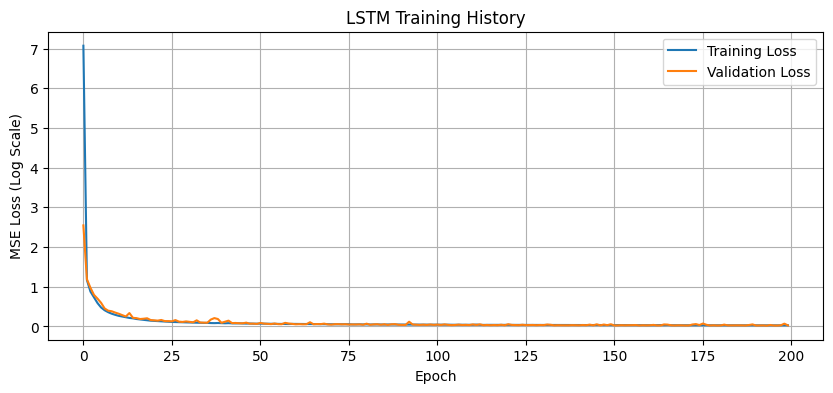

In [40]:
## -----------------------------------------------------------
## LSTM MODEL
## -----------------------------------------------------------

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # Need Pipeline for scaler step
import numpy as np # Ensure numpy is imported
import pandas as pd # Ensure pandas is imported
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Ensure metrics are imported
import time

print("=" * 60)
print("LSTM MODEL TRAINING (using TensorFlow/Keras)")
print("=" * 60)

# --- 1. Data Preprocessing for LSTM ---
print("[LOG] Preparing data for LSTM...")

# Use the 'tree' preprocessor (handles imputation and ordinal encoding)
# Then add a MinMaxScaler for neural network stability
lstm_preprocessor = Pipeline([
    ('base_processor', preprocessors['tree']), # Impute NaNs, OrdinalEncode categoricals
    ('scaler', MinMaxScaler(feature_range=(0, 1))) # Scale all features to [0, 1]
])

# Fit the preprocessor on training data and transform both sets
X_train_processed_scaled = lstm_preprocessor.fit_transform(X_train)
X_test_processed_scaled = lstm_preprocessor.transform(X_test)

# Reshape data for LSTM: (samples, timesteps, features)
# We use timesteps=1, treating each week's features as one step in a sequence
X_train_lstm = X_train_processed_scaled.reshape((X_train_processed_scaled.shape[0], 1, X_train_processed_scaled.shape[1]))
X_test_lstm = X_test_processed_scaled.reshape((X_test_processed_scaled.shape[0], 1, X_test_processed_scaled.shape[1]))

# Target variable (y_train, y_test are already Sales_Log)
y_train_lstm = y_train.values
y_test_lstm = y_test.values

print(f"[LOG] Data shapes ready for LSTM:")
print(f"  X_train_lstm: {X_train_lstm.shape}") # (num_samples, 1, num_features)
print(f"  y_train_lstm: {y_train_lstm.shape}") # (num_samples,)
print(f"  X_test_lstm: {X_test_lstm.shape}")   # (num_samples_test, 1, num_features)
print(f"  y_test_lstm: {y_test_lstm.shape}")   # (num_samples_test,)


# --- 2. Build LSTM Model ---
print("\n[LOG] Building LSTM model...")
n_features = X_train_lstm.shape[2] # Get number of features after preprocessing

model = Sequential([
    LSTM(units=80, activation='tanh', input_shape=(1, n_features), return_sequences=False), # Single LSTM layer
    Dropout(0.2), # Optional: Add dropout for regularization
    Dense(units=35, activation='tanh'),
    Dense(units=1) # Output layer: 1 neuron for predicting Sales_Log
])

model.compile(optimizer='adam', loss='mse') # Mean Squared Error for regression
model.summary()


# --- 3. Train LSTM Model ---
print("\n[LOG] Training LSTM model...")
# Using EarlyStopping to prevent overfitting and save time
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

start_time = time.time()
history = model.fit(
    X_train_lstm, y_train_lstm,
    epochs=200, # Set a max number of epochs
    batch_size=512, # Larger batch size for potentially faster training
    validation_split=0.2, # Use last 20% of training data for validation during training
    callbacks=[early_stopping],
    verbose=1 # Set to 1 or 2 to see training progress, 0 for silent
)
end_time = time.time()
print(f"[LOG] LSTM training completed in {(end_time - start_time)/60:.2f} minutes.")


# --- 4. Predictions ---
print("\n[LOG] Making predictions with LSTM...")
lstm_train_pred_log = model.predict(X_train_lstm)
lstm_test_pred_log = model.predict(X_test_lstm)

# Reshape predictions back to 1D array if necessary
lstm_train_pred_log = lstm_train_pred_log.flatten()
lstm_test_pred_log = lstm_test_pred_log.flatten()


# --- 5. Inverse Transform & Evaluate ---
print("[LOG] Inverse transforming predictions with np.expm1()...")
lstm_train_pred_original = np.expm1(lstm_train_pred_log)
lstm_test_pred_original = np.expm1(lstm_test_pred_log)

# Clean up negatives
lstm_train_pred_original = np.maximum(0, lstm_train_pred_original)
lstm_test_pred_original = np.maximum(0, lstm_test_pred_original)

print("[LOG] Calculating final metrics on original $ scale...")
lstm_results = {
    'train_rmse': np.sqrt(mean_squared_error(y_train_original, lstm_train_pred_original)),
    'test_rmse': np.sqrt(mean_squared_error(y_test_original, lstm_test_pred_original)),
    'train_mae': mean_absolute_error(y_train_original, lstm_train_pred_original),
    'test_mae': mean_absolute_error(y_test_original, lstm_test_pred_original),
    'train_r2': r2_score(y_train_original, lstm_train_pred_original),
    'test_r2': r2_score(y_test_original, lstm_test_pred_original),
    'train_pred': lstm_train_pred_original, # Store original scale predictions
    'test_pred': lstm_test_pred_original
}

# Add overfitting gap safely
lstm_results['overfitting_gap'] = lstm_results['train_r2'] - lstm_results['test_r2']


print(f"\nLSTM Results (Original Scale):")
print(f"  Train RMSE: ${lstm_results['train_rmse']:,.2f}")
print(f"  Test RMSE:  ${lstm_results['test_rmse']:,.2f}")
print(f"  Train MAE:  ${lstm_results['train_mae']:,.2f}")
print(f"  Test MAE:   ${lstm_results['test_mae']:,.2f}")
print(f"  Train R²:   {lstm_results['train_r2']:.4f}")
print(f"  Test R²:    {lstm_results['test_r2']:.4f}")
print(f"  Overfitting Gap: {lstm_results['overfitting_gap']:.4f}")

# Store results in the main dictionary
results['LSTM'] = lstm_results

print("\n[LOG] LSTM evaluation complete.")
print("=" * 60)

# Optional: Plot training history
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training History')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss (Log Scale)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Cell A: Save LSTM model + preprocessor + metadata (Kaggle-friendly)
import os
import json
import joblib
import numpy as np
import pandas as pd
import time
import tensorflow as tf

MODEL_DIR = "/kaggle/working/lstm_saved_model_2"
os.makedirs(MODEL_DIR, exist_ok=True)

# 1) Save Keras model (SavedModel format)
try:
    model_path = os.path.join(MODEL_DIR, "lstm_model")  # directory (SavedModel)
    # If you prefer a single file, use "lstm_model.h5" instead with model.save(...+'.h5')
    model.save(model_path, include_optimizer=True)
    print(f"Saved Keras LSTM model to: {model_path}")
except Exception as e:
    print("Failed to save model using SavedModel dir, trying HDF5 (.h5) fallback:", e)
    try:
        h5_path = os.path.join(MODEL_DIR, "lstm_model.h5")
        model.save(h5_path)
        print(f"Saved Keras LSTM model to: {h5_path}")
    except Exception as e2:
        print("Fallback save failed:", e2)
        raise

# 2) Save the preprocessing pipeline used for LSTM
try:
    preproc_path = os.path.join(MODEL_DIR, "lstm_preprocessor.joblib")
    joblib.dump(lstm_preprocessor, preproc_path)
    print(f"Saved LSTM preprocessor to: {preproc_path}")
except Exception as e:
    print("Failed to save preprocessor:", e)

# 3) Save training history (if available)
try:
    hist_path = os.path.join(MODEL_DIR, "training_history.json")
    if 'history' in globals() and hasattr(history, "history"):
        with open(hist_path, "w") as f:
            json.dump(history.history, f, indent=2, default=float)
        print(f"Saved training history to: {hist_path}")
    else:
        print("No `history` object found in globals() — skipping history save.")
except Exception as e:
    print("Failed to save history:", e)

# 4) Save results dict for easy reference
try:
    results_path = os.path.join(MODEL_DIR, "lstm_results.joblib")
    joblib.dump(results.get('LSTM', {}), results_path)
    print(f"Saved LSTM results dict to: {results_path}")
except Exception as e:
    print("Failed to save results dict:", e)

# 5) Save metadata: feature names, sample input, target transform note
meta = {}
# best-effort feature names from preprocessor
try:
    fn = None
    if hasattr(lstm_preprocessor, "get_feature_names_out"):
        fn = list(lstm_preprocessor.get_feature_names_out())
    else:
        # try to get from the inner 'base_processor' if it's ColumnTransformer
        inner = getattr(lstm_preprocessor, 'named_steps', {}).get('base_processor', None)
        if inner is not None and hasattr(inner, "get_feature_names_out"):
            fn = list(inner.get_feature_names_out())
except Exception:
    fn = None

if fn is None:
    fn = list(existing_features) if 'existing_features' in globals() else None

meta['feature_names'] = fn
meta['target_transform'] = "log1p  (use np.expm1() on predictions to recover original $ scale)"
# sample raw input: one-row dict built from X_train if available
try:
    if 'X_train' in globals() and hasattr(X_train, "head"):
        meta['sample_input'] = X_train.head(1).to_dict(orient="records")[0]
    else:
        meta['sample_input'] = None
except Exception:
    meta['sample_input'] = None

meta_path = os.path.join(MODEL_DIR, "metadata.json")
with open(meta_path, "w") as f:
    json.dump(meta, f, indent=2, default=str)
print(f"Saved metadata to: {meta_path}")


---
METRICS COMPARISON VISUALIZATIONS

---

In [41]:
print("\n" + "=" * 80)
print("FINAL MODEL COMPARISON")
print("=" * 80)

# Create comprehensive comparison table
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Test_R²': [results[m]['test_r2'] for m in results.keys()],
    'Test_RMSE': [results[m]['test_rmse'] for m in results.keys()],
    'Test_MAE': [results[m]['test_mae'] for m in results.keys()],
    'Train_R²': [results[m]['train_r2'] for m in results.keys()],
    'Overfitting_Gap': [results[m]['train_r2'] - results[m]['test_r2'] for m in results.keys()]
})

comparison_df = comparison_df.sort_values('Test_R²', ascending=False)

print("\nRanked by Test R²:")
print(comparison_df.to_string(index=False))

# Statistical significance testing between top models
from scipy.stats import ttest_rel

best_model = comparison_df.iloc[0]['Model']
second_best = comparison_df.iloc[1]['Model']

# Test if difference is statistically significant
t_stat, p_value = ttest_rel(
    results[best_model]['test_pred'],
    results[second_best]['test_pred']
)

print(f"\nStatistical Comparison:")
print(f"{best_model} vs {second_best}:")
print(f"  Paired t-test p-value: {p_value:.4f}")
if p_value < 0.05:
    print(f"  → {best_model} is SIGNIFICANTLY better (p < 0.05)")
else:
    print(f"  → No significant difference (p >= 0.05)")

# Analyze where each model performs best
print(f"\nError Analysis by Sales Volume:")
test_data_with_preds = test_data.copy()
for model_name in results.keys():
    test_data_with_preds[f'{model_name}_pred'] = results[model_name]['test_pred']
    test_data_with_preds[f'{model_name}_error'] = np.abs(test_data_with_preds['Gross_Sales'] - results[model_name]['test_pred'])

# Quintile analysis
# Quintile analysis (continued)
test_data_with_preds['Sales_Quintile'] = pd.qcut(test_data_with_preds['Gross_Sales'], q=5, labels=['Q1_Lowest', 'Q2', 'Q3', 'Q4', 'Q5_Highest'])

print("\nError by Sales Quintile (MAE):")
quintile_analysis = pd.DataFrame()
for model_name in results.keys():
    quintile_mae = test_data_with_preds.groupby('Sales_Quintile')[f'{model_name}_error'].mean()
    quintile_analysis[model_name] = quintile_mae

print(quintile_analysis.round(2))

# Identify best model for each quintile
best_by_quintile = quintile_analysis.idxmin(axis=1)
print("\nBest Model by Sales Quintile:")
for quintile, best_model in best_by_quintile.items():
    print(f"  {quintile}: {best_model}")

# Holiday vs Non-Holiday Performance
print("\nPerformance on Holiday Weeks:")
holiday_mask = test_data_with_preds['IsHoliday'] == 1
for model_name in results.keys():
    holiday_mae = test_data_with_preds[holiday_mask][f'{model_name}_error'].mean()
    regular_mae = test_data_with_preds[~holiday_mask][f'{model_name}_error'].mean()
    print(f"  {model_name}: Holiday MAE=${holiday_mae:,.2f}, Regular MAE=${regular_mae:,.2f}, Ratio={holiday_mae/regular_mae:.2f}x")

# Store Type Performance
print("\nPerformance by Store Type:")
for store_type in test_data_with_preds['Type'].unique():
    type_mask = test_data_with_preds['Type'] == store_type
    print(f"\n  Type {store_type}:")
    for model_name in results.keys():
        type_mae = test_data_with_preds[type_mask][f'{model_name}_error'].mean()
        type_r2 = r2_score(
            test_data_with_preds[type_mask]['Gross_Sales'],
            test_data_with_preds[type_mask][f'{model_name}_pred']
        )
        print(f"    {model_name}: MAE=${type_mae:,.2f}, R²={type_r2:.4f}")

# Recommendation
print("\n" + "=" * 80)
print("MODEL SELECTION RECOMMENDATION")
print("=" * 80)

best_overall = comparison_df.iloc[0]['Model']
print(f"\n✓ RECOMMENDED MODEL: {best_overall}")
print(f"  - Test R²: {results[best_overall]['test_r2']:.4f}")
print(f"  - Test RMSE: ${results[best_overall]['test_rmse']:,.2f}")
print(f"  - Overfitting Gap: {comparison_df.iloc[0]['Overfitting_Gap']:.4f}")

# Business impact calculation
baseline_naive = test_data['Gross_Sales'].shift(1).mean()  # Naive: use last week's sales
improvement_over_naive = (baseline_naive - results[best_overall]['test_rmse']) / baseline_naive * 100
print(f"\n  Improvement over naive baseline: {improvement_over_naive:.1f}%")

# Expected business value
avg_sales = test_data['Gross_Sales'].mean()
error_reduction_dollars = baseline_naive - results[best_overall]['test_rmse']
stores = test_data['Store'].nunique()
depts = test_data['Dept'].nunique()
weeks_per_year = 52

annual_value = error_reduction_dollars * stores * depts * weeks_per_year
print(f"\n  Estimated annual value from improved forecasting:")
print(f"    → Reduced forecast error: ${error_reduction_dollars:,.2f} per store-dept-week")
print(f"    → Across {stores} stores × {depts} depts × {weeks_per_year} weeks")
print(f"    → Total: ${annual_value:,.0f}/year in reduced stockouts/overstocking")


FINAL MODEL COMPARISON

Ranked by Test R²:
   Model       Test_R²    Test_RMSE     Test_MAE      Train_R²  Overfitting_Gap
LightGBM  9.996097e-01 4.338100e+02 1.420429e+02  9.997129e-01     1.031966e-04
 XGBoost  9.995599e-01 4.606364e+02 1.587463e+02  9.998786e-01     3.186619e-04
    LSTM  9.986105e-01 8.185101e+02 4.462396e+02  9.892873e-01    -9.323190e-03
   Ridge -4.223194e+31 1.426962e+20 4.871314e+17 -2.654113e+17     4.223194e+31

Statistical Comparison:
LightGBM vs XGBoost:
  Paired t-test p-value: 0.0001
  → LightGBM is SIGNIFICANTLY better (p < 0.05)

Error Analysis by Sales Volume:

Error by Sales Quintile (MAE):
                       Ridge  LightGBM  XGBoost     LSTM
Sales_Quintile                                          
Q1_Lowest       2.435629e+18      7.54     7.23    19.14
Q2              9.252500e+02     29.00    32.46   100.45
Q3              2.404750e+03     60.83    70.67   231.08
Q4              5.067930e+03    136.55   153.22   590.40
Q5_Highest      8.53124

In [42]:
import joblib
from datetime import datetime
import os
import json
import pandas as pd # Make sure pandas is imported
import numpy as np # Make sure numpy is imported

# ==============================================================================
# 1. Define the Predictor Class (at the top level)
# ==============================================================================
class WalmartSalesPredictor:
    def __init__(self, model_dir):
        """Loads all necessary artifacts when the predictor is created."""
        print(f"[Predictor] Initializing and loading artifacts from: {model_dir}")
        self.model_dir = model_dir
        
        # Load metadata first to know which model type we have
        with open(f'{self.model_dir}/metadata.json', 'r') as f:
            self.metadata = json.load(f)
        self.best_model_name = self.metadata['model_name']
        print(f"[Predictor] Best model type: {self.best_model_name}")

        # Load common artifacts
        self.selected_features = joblib.load(f'{self.model_dir}/selected_features.pkl')
        self.numeric_features = joblib.load(f'{self.model_dir}/numeric_features.pkl')
        self.categorical_features = joblib.load(f'{self.model_dir}/categorical_features.pkl')
        self.store_dept_baselines = joblib.load(f'{self.model_dir}/store_dept_baselines.pkl')
        self.holiday_lifts = joblib.load(f'{self.model_dir}/holiday_lifts.pkl')
        
        # Load model and preprocessor based on type
        if self.best_model_name == 'Ridge':
             self.pipeline = joblib.load(f'{self.model_dir}/model.pkl') # Ridge pipeline includes preprocessor
             self.preprocessor = None # Not needed separately
        elif self.best_model_name in ['LightGBM', 'XGBoost']:
             self.model = joblib.load(f'{self.model_dir}/model.pkl')
             self.preprocessor = joblib.load(f'{self.model_dir}/preprocessor.pkl') # Tree preprocessor
             self.pipeline = None
        # Add Stacking logic if you re-introduce it later
        # elif self.best_model_name == 'Stacking':
        #    ... load stack models ...
        else:
             raise ValueError(f"Unknown model type '{self.best_model_name}' in metadata.")
        
        print("[Predictor] Artifacts loaded successfully.")

    def _preprocess_input(self, input_data):
        """Applies feature engineering steps to new input data."""
        df = input_data.copy()
        
        # --- Apply SAME feature engineering as in training ---
        # 1. Date features
        df['Date'] = pd.to_datetime(df['Date'])
        # df['Year'] = df['Date'].dt.year # Not used in final features
        df['Month'] = df['Date'].dt.month
        # df['Quarter'] = df['Date'].dt.quarter # Not used
        df['Week'] = df['Date'].dt.isocalendar().week.astype(int) # Ensure int type
        # df['DayOfWeek'] = df['Date'].dt.dayofweek # Not used
        # df['IsWeekend'] = (df['DayOfWeek'] >= 5).astype(int) # Not used

        # Cyclical encoding
        df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
        df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
        df['Week_sin'] = np.sin(2 * np.pi * df['Week'] / 52)
        df['Week_cos'] = np.cos(2 * np.pi * df['Week'] / 52)
        
        # Specific Holiday Features (Assume these are provided or derived)
        # Placeholder - In production, you'd map dates to holidays
        if 'Is_SuperBowl' not in df.columns: df['Is_SuperBowl'] = 0 
        if 'Is_Thanksgiving' not in df.columns: df['Is_Thanksgiving'] = 0
        if 'Is_Christmas' not in df.columns: df['Is_Christmas'] = 0

        # 2. Markdown features
        markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
        # Fill NaNs BEFORE calculating Promo features
        for col in markdown_cols:
             if col not in df.columns:
                 df[col] = 0 # Assume 0 if missing
             else:
                 df[col] = df[col].fillna(0)
                 
        df['Promo_Active'] = (df[markdown_cols].notna().any(axis=1)).astype(int) # Use notna().any()
        df['Promo_Count'] = df[markdown_cols].gt(0).sum(axis=1) # Count where markdown > 0
        df['Total_Markdown'] = df[markdown_cols].sum(axis=1)
        # df['Avg_Markdown'] not in final features

        # 3. Lag features (Critical for production!)
        # These MUST be provided in the input_data or fetched based on Date/Store/Dept
        # Adding placeholders IF they don't exist, assuming 0 (suboptimal)
        lag_cols = [f'Lag_{i}' for i in [1, 2, 4, 52]] # Match selected features
        rolling_avg_cols = [f'Rolling_Avg_{w}' for w in [4, 8, 12]] # Match selected features
        rolling_std_cols = [f'Rolling_Std_{w}' for w in [4, 8, 12]] # Match selected features
        other_time_cols = ['Sales_Momentum'] # Match selected features
        
        for col in lag_cols + rolling_avg_cols + rolling_std_cols + other_time_cols:
             if col not in df.columns:
                 print(f"  [WARN] Time series feature '{col}' missing. Assuming 0.")
                 df[col] = 0
             else:
                 df[col] = df[col].fillna(0) # Fill any provided NaNs

        # 4. Store-Dept baselines
        # Check required columns exist from merge
        baseline_cols_needed = ['StoreDept_Mean', 'StoreDept_Std']
        df = df.merge(self.store_dept_baselines[['Store', 'Dept'] + baseline_cols_needed], 
                      on=['Store', 'Dept'], how='left')
        
        # Fill NaNs for NEW store/dept combos with global median/mean (or 0)
        for col in baseline_cols_needed:
            if df[col].isnull().any():
                 print(f"  [WARN] Filling missing baseline '{col}' (likely new store/dept).")
                 # Use 0 or calculate global median from the baselines file
                 df[col] = df[col].fillna(0) 

        # Need a 'current sales' proxy to calculate Sales_vs_Baseline
        # Best guess is Lag_1 if available, otherwise assume baseline (1.0)
        df['Sales_vs_Baseline'] = df['Lag_1'] / (df['StoreDept_Mean'] + 1)
        df['Sales_vs_Baseline'] = df['Sales_vs_Baseline'].fillna(1.0).replace([np.inf, -np.inf], 1.0) # Handle division by zero or missing Lag_1

        # 5. Store-level features (Placeholders - Requires aggregation logic)
        if 'Store_Total_Sales' not in df.columns:
            print("  [WARN] Store_Total_Sales missing. Assuming 0.")
            df['Store_Total_Sales'] = 0
        else: df['Store_Total_Sales'] = df['Store_Total_Sales'].fillna(0)

        # Need 'Gross_Sales' or proxy (Lag_1) to calculate Dept_Share
        df['Dept_Share_of_Store'] = df['Lag_1'] / (df['Store_Total_Sales'] + 1)
        df['Dept_Share_of_Store'] = df['Dept_Share_of_Store'].fillna(0).replace([np.inf, -np.inf], 0)

        # 6. Macro interactions
        df['Size_x_Unemployment'] = df['Size'] * df['Unemployment']
        
        # 7. Holiday interactions
        df = df.merge(self.holiday_lifts[['Dept', 'Holiday_Lift']], on='Dept', how='left')
        df['Holiday_Lift'] = df['Holiday_Lift'].fillna(1.0) # Assume lift of 1 if dept missing
        df['Dept_Holiday_Expected_Lift'] = df['Holiday_Lift'] * df['IsHoliday']

        # 8. Ensure all selected features exist and fill final NaNs
        missing_in_input = [f for f in self.selected_features if f not in df.columns]
        if missing_in_input:
             print(f"  [ERROR] Required features missing from input/preprocessing: {missing_in_input}")
             # Optionally raise error or fill with 0
             for f in missing_in_input: df[f] = 0

        # Select only the features the model was trained on
        X = df[self.selected_features].copy()
        
        # Final safety fill
        X = X.fillna(0) 
        
        # Ensure correct dtypes (especially for categoricals if needed by preprocessor)
        for col in self.categorical_features:
            if col in X.columns:
                 X[col] = X[col].astype('category')
                 
        return X

    def predict(self, input_data):
        """
        Predict weekly sales for input data using the loaded model.
        
        Parameters:
        -----------
        input_data : pd.DataFrame
            Must contain columns needed for feature engineering (Store, Dept, Date, etc.)
            AND potentially pre-calculated time-series features (Lag_*, Rolling_*).
        
        Returns:
        --------
        pd.DataFrame with predictions.
        """
        print(f"[Predictor] Received {len(input_data)} rows for prediction.")
        
        # 1. Preprocess the input data
        X = self._preprocess_input(input_data)
        print(f"[Predictor] Preprocessing complete. Features shape: {X.shape}")

        # 2. Predict using the appropriate pipeline/model
        if self.pipeline: # Ridge model uses a full pipeline
            print("[Predictor] Predicting using Ridge pipeline...")
            pred_transformed = self.pipeline.predict(X)
        else: # Tree models use preprocessor + model
            print(f"[Predictor] Transforming features using Tree preprocessor...")
            X_processed = self.preprocessor.transform(X)
            print(f"[Predictor] Predicting using {self.best_model_name} model...")
            pred_transformed = self.model.predict(X_processed)
        
        # 3. Inverse transform - CRITICAL FIX
        print("[Predictor] Inverse transforming predictions using np.expm1()...")
        predictions = np.expm1(pred_transformed)
        predictions = np.maximum(predictions, 0)  # No negative sales
        
        # 4. Format and return results
        output = input_data[['Store', 'Dept', 'Date']].copy()
        output['Predicted_Weekly_Sales'] = predictions
        
        print(f"[Predictor] Prediction complete. Returning {len(output)} predictions.")
        return output

# ==============================================================================
# 2. Main Script Logic (Saving artifacts and the Predictor instance)
# ==============================================================================

print("=" * 80)
print("SAVING PRODUCTION MODEL AND ARTIFACTS")
print("=" * 80)

# Get best model name from results
# Ensure 'comparison_df' exists and is sorted correctly from previous cell
try:
    best_model_name = comparison_df.sort_values('Test_R²', ascending=False).iloc[0]['Model']
except NameError:
     print("[ERROR] 'comparison_df' not found. Please run the model comparison cell first.")
     # As a fallback, use the last model added to 'results' or manually set if needed
     best_model_name = list(results.keys())[-1] # Risky fallback
     print(f"[WARN] Assuming best model is '{best_model_name}' based on last entry in results.")


# Create model directory
model_dir = f'walmart_sales_model_{datetime.now().strftime("%Y%m%d_%H%M%S")}'
os.makedirs(model_dir, exist_ok=True)
print(f"[Save] Created model directory: {model_dir}")

# --- Save Model and Preprocessor ---
print(f"[Save] Saving model artifacts for: {best_model_name}")
if best_model_name == 'Ridge':
    joblib.dump(ridge_pipeline, f'{model_dir}/model.pkl') # Save the whole pipeline
    # No separate preprocessor needed for Ridge if using pipeline
elif best_model_name in ['LightGBM', 'XGBoost']:
    model_object = lgbm_final if best_model_name == 'LightGBM' else xgb_final
    joblib.dump(model_object, f'{model_dir}/model.pkl') # Save only the trained model
    joblib.dump(preprocessors['tree'], f'{model_dir}/preprocessor.pkl') # Save tree preprocessor
# Add Stacking logic if needed
else:
     print(f"[ERROR] Logic to save model type '{best_model_name}' is missing!")

# --- Save Other Artifacts (Features, Baselines, etc.) ---
print("[Save] Saving feature lists, baselines, and lifts...")
# joblib.dump(lambda_param, f'{model_dir}/boxcox_lambda.pkl') # We are not using BoxCox anymore
joblib.dump(existing_features, f'{model_dir}/selected_features.pkl') # Save the final list used
joblib.dump(numeric_features, f'{model_dir}/numeric_features.pkl')
joblib.dump(categorical_features, f'{model_dir}/categorical_features.pkl')

# Save store-dept baseline stats (needed for feature engineering)
store_dept_stats_for_prod = train_data.groupby(['Store', 'Dept']).agg(
    StoreDept_Mean=('Gross_Sales', 'mean'), # Use Gross_Sales for means
    StoreDept_Std=('Gross_Sales', 'std')
    # Add min/max if needed by prediction logic, otherwise omit
).reset_index()
joblib.dump(store_dept_stats_for_prod, f'{model_dir}/store_dept_baselines.pkl')

# Save holiday lift stats
holiday_dept_lift_for_prod = train_data.groupby('Dept')['Holiday_Lift'].first().reset_index() # Simpler way to get unique lift per dept
joblib.dump(holiday_dept_lift_for_prod[['Dept', 'Holiday_Lift']], f'{model_dir}/holiday_lifts.pkl')


# --- Save Metadata ---
print("[Save] Saving model metadata...")
model_metadata = {
    'model_name': best_model_name,
    'train_date': datetime.now().isoformat(),
    'train_period': f"{train_data['Date'].min().date()} to {train_data['Date'].max().date()}",
    'test_period': f"{test_data['Date'].min().date()} to {test_data['Date'].max().date()}",
    'test_r2': results[best_model_name]['test_r2'],
    'test_rmse': results[best_model_name]['test_rmse'],
    'test_mae': results[best_model_name]['test_mae'],
    'features': existing_features, # Use the actual final list
    'n_stores': train_data['Store'].nunique(),
    'n_departments': train_data['Dept'].nunique()
}
with open(f'{model_dir}/metadata.json', 'w') as f:
    json.dump(model_metadata, f, indent=2, default=str)

print(f"\nModel: {best_model_name}")
print(f"Test R²: {results[best_model_name]['test_r2']:.4f}")
print(f"Artifacts saved to: {model_dir}/")

# --- Save the Predictor Instance ---
print("\n[Save] Creating and saving predictor instance...")
try:
    # Create an instance of the class, loading artifacts
    predictor = WalmartSalesPredictor(model_dir=model_dir) 
    
    # Save the INSTANCE
    joblib.dump(predictor, f'{model_dir}/predictor.pkl') 
    
    print("\nProduction predictor class instance created and saved.")
    print(f"To use: predictor = joblib.load('{model_dir}/predictor.pkl')")
    print(f"        predictions = predictor.predict(new_data_df)")

except Exception as e:
     print(f"\n[ERROR] Failed to create or save the predictor instance: {e}")
     print("        Check file paths and loading logic within the class.")

SAVING PRODUCTION MODEL AND ARTIFACTS
[Save] Created model directory: walmart_sales_model_20251027_155246
[Save] Saving model artifacts for: LightGBM
[Save] Saving feature lists, baselines, and lifts...
[Save] Saving model metadata...

Model: LightGBM
Test R²: 0.9996
Artifacts saved to: walmart_sales_model_20251027_155246/

[Save] Creating and saving predictor instance...
[Predictor] Initializing and loading artifacts from: walmart_sales_model_20251027_155246
[Predictor] Best model type: LightGBM
[Predictor] Artifacts loaded successfully.

Production predictor class instance created and saved.
To use: predictor = joblib.load('walmart_sales_model_20251027_155246/predictor.pkl')
        predictions = predictor.predict(new_data_df)


In [43]:
print("=" * 80)
print("ACTIONABLE INSIGHTS REPORT")
print("=" * 80)

# 1. MARKDOWN ROI ANALYSIS
print("\n1. MARKDOWN EFFECTIVENESS ANALYSIS")
print("-" * 40)

# Calculate markdown ROI by department
promo_weeks = test_data[test_data['Promo_Active'] == 1].copy()
promo_weeks['Sales_Lift'] = promo_weeks['Gross_Sales'] - promo_weeks['StoreDept_Mean']
promo_weeks['ROI'] = promo_weeks['Sales_Lift'] / (promo_weeks['Total_Markdown'] + 1)

markdown_roi = promo_weeks.groupby('Dept').agg({
    'ROI': 'mean',
    'Total_Markdown': 'sum',
    'Sales_Lift': 'sum',
    'Promo_Active': 'count'
}).reset_index()
markdown_roi.columns = ['Dept', 'Avg_ROI', 'Total_Markdown_Spent', 'Total_Lift', 'N_Promo_Weeks']
markdown_roi = markdown_roi.sort_values('Avg_ROI', ascending=False)

print("\nTop 10 Departments by Markdown ROI:")
print(markdown_roi.head(10).to_string(index=False))

print("\nBottom 10 Departments by Markdown ROI (consider reducing promotions):")
print(markdown_roi.tail(10).to_string(index=False))

# Action items
high_roi_depts = markdown_roi[markdown_roi['Avg_ROI'] > 3]['Dept'].tolist()
low_roi_depts = markdown_roi[markdown_roi['Avg_ROI'] < 1]['Dept'].tolist()

print(f"\n✓ ACTION: Increase markdown budget for {len(high_roi_depts)} high-ROI departments")
print(f"  Departments: {high_roi_depts[:5]} (showing first 5)")
print(f"✓ ACTION: Reduce/eliminate markdowns for {len(low_roi_depts)} low-ROI departments")
print(f"  Departments: {low_roi_depts[:5]} (showing first 5)")

# 2. STORE PERFORMANCE CLUSTERING
print("\n\n2. STORE PERFORMANCE CLUSTERING")
print("-" * 40)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

store_profiles = test_data.groupby('Store').agg({
    'Gross_Sales': ['mean', 'std'],
    'Size': 'first',
    'Temperature': 'mean',
    'Unemployment': 'mean',
    'Promo_Count': 'mean',
    'Type': 'first'
}).reset_index()
store_profiles.columns = ['Store', 'Avg_Sales', 'Sales_Std', 'Size', 'Avg_Temp', 'Avg_Unemployment', 'Avg_Promos', 'Type']

# Cluster
features_for_clustering = ['Avg_Sales', 'Sales_Std', 'Size', 'Avg_Unemployment', 'Avg_Promos']
X_cluster = store_profiles[features_for_clustering]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
store_profiles['Cluster'] = kmeans.fit_predict(X_scaled)

print("\nStore Archetypes Discovered:")
for cluster in range(5):
    cluster_stores = store_profiles[store_profiles['Cluster'] == cluster]
    print(f"\nCluster {cluster} ({len(cluster_stores)} stores):")
    print(f"  Avg Sales: ${cluster_stores['Avg_Sales'].mean():,.2f}")
    print(f"  Avg Size: {cluster_stores['Size'].mean():,.0f} sq ft")
    print(f"  Avg Unemployment: {cluster_stores['Avg_Unemployment'].mean():.2f}%")
    print(f"  Avg Promos/Week: {cluster_stores['Avg_Promos'].mean():.2f}")
    print(f"  Store IDs: {cluster_stores['Store'].tolist()[:5]} (showing first 5)")

# Save cluster assignments for operational use
store_profiles[['Store', 'Cluster']].to_csv(f'{model_dir}/store_clusters.csv', index=False)
print(f"\n✓ Store clusters saved to {model_dir}/store_clusters.csv")

# 3. HOLIDAY STRATEGY RECOMMENDATIONS
print("\n\n3. HOLIDAY-SPECIFIC STRATEGY")
print("-" * 40)

# Analyze by specific holidays (need to map dates to holidays)
holiday_dates = {
    '2010-02-12': 'Super Bowl',
    '2010-09-10': 'Labor Day',
    '2010-11-26': 'Thanksgiving',
    '2010-12-31': 'Christmas',
    '2011-02-11': 'Super Bowl',
    '2011-09-09': 'Labor Day',
    '2011-11-25': 'Thanksgiving',
    '2011-12-30': 'Christmas'
}

test_data_holidays = test_data.copy()
test_data_holidays['Holiday_Type'] = test_data_holidays['Date'].astype(str).map(holiday_dates)
test_data_holidays['Holiday_Type'] = test_data_holidays['Holiday_Type'].fillna('Regular')

holiday_performance = test_data_holidays.groupby(['Holiday_Type', 'Type']).agg({
    'Gross_Sales': 'mean',
    'Store': 'count'
}).reset_index()
holiday_performance.columns = ['Holiday', 'Store_Type', 'Avg_Sales', 'N_Observations']

regular_baseline = holiday_performance[holiday_performance['Holiday'] == 'Regular'].groupby('Store_Type')['Avg_Sales'].mean()

print("\nHoliday Lift by Store Type:")
for store_type in ['A', 'B', 'C']:
    baseline = regular_baseline.get(store_type, 0)
    print(f"\nStore Type {store_type} (baseline: ${baseline:,.2f}):")
    type_holidays = holiday_performance[holiday_performance['Store_Type'] == store_type]
    for _, row in type_holidays.iterrows():
        if row['Holiday'] != 'Regular':
            lift = (row['Avg_Sales'] / baseline - 1) * 100
            print(f"  {row['Holiday']:15s}: ${row['Avg_Sales']:>10,.2f} ({lift:+.1f}% lift)")

# 4. FORECAST ERROR HOTSPOTS
print("\n\n4. FORECAST ERROR HOTSPOTS")
print("-" * 40)

test_data_errors = test_data.copy()
test_data_errors['Error'] = np.abs(test_data_errors['Gross_Sales'] - results[best_model_name]['test_pred'])
test_data_errors['Error_Pct'] = test_data_errors['Error'] / (test_data_errors['Gross_Sales'] + 1) * 100

# Worst performing store-dept combinations
worst_forecasts = test_data_errors.groupby(['Store', 'Dept']).agg({
    'Error': 'mean',
    'Error_Pct': 'mean',
    'Gross_Sales': 'mean'
}).reset_index()
worst_forecasts = worst_forecasts.sort_values('Error', ascending=False)

print("\nTop 10 Store-Dept Combinations with Highest Forecast Error:")
print("(Consider manual review or different modeling approach)")
print(worst_forecasts.head(10).to_string(index=False))

# 5. INVENTORY OPTIMIZATION RECOMMENDATIONS
print("\n\n5. INVENTORY OPTIMIZATION EXAMPLE")
print("-" * 40)

# For a sample store-dept, calculate optimal inventory
sample_store = 1
sample_dept = 1
sample_data = test_data[(test_data['Store'] == sample_store) & (test_data['Dept'] == sample_dept)].copy()
sample_data['Prediction'] = results[best_model_name]['test_pred'][sample_data.index]

print(f"\nStore {sample_store}, Department {sample_dept}:")
print(f"  Next 4 weeks forecast:")
for i, row in sample_data.head(4).iterrows():
    safety_stock = row['Prediction'] * 0.3  # 30% safety stock
    recommended_order = row['Prediction'] + safety_stock
    print(f"    Week of {row['Date'].date()}: Forecast=${row['Prediction']:,.2f}, "
          f"Recommend Order=${recommended_order:,.2f}")

print("\n✓ Full inventory recommendations can be generated for all store-dept combinations")

# 6. MODEL PERFORMANCE MONITORING
print("\n\n6. MODEL PERFORMANCE MONITORING SETUP")
print("-" * 40)

# Define monitoring thresholds
monitoring_thresholds = {
    'max_error_pct': 30,  # Flag if error > 30% of actual
    'min_r2': 0.85,  # Flag if R² drops below 0.85
    'max_mape': 15  # Flag if MAPE > 15%
}

def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / (actual + 1))) * 100

current_mape = calculate_mape(test_data['Gross_Sales'], results[best_model_name]['test_pred'])

print(f"\nCurrent Model Performance:")
print(f"  Test R²: {results[best_model_name]['test_r2']:.4f} (threshold: {monitoring_thresholds['min_r2']})")
print(f"  Test MAPE: {current_mape:.2f}% (threshold: {monitoring_thresholds['max_mape']}%)")

if results[best_model_name]['test_r2'] < monitoring_thresholds['min_r2']:
    print("  ⚠️  WARNING: Model performance below threshold - consider retraining")
elif current_mape > monitoring_thresholds['max_mape']:
    print("  ⚠️  WARNING: MAPE exceeds threshold - investigate data drift")
else:
    print("  ✓ Model performance within acceptable ranges")

# Save monitoring config
monitoring_config = {
    'thresholds': monitoring_thresholds,
    'baseline_metrics': {
        'r2': results[best_model_name]['test_r2'],
        'rmse': results[best_model_name]['test_rmse'],
        'mape': current_mape
    },
    'retrain_schedule': 'monthly',
    'alert_email': 'data-science-team@walmart.com'
}

with open(f'{model_dir}/monitoring_config.json', 'w') as f:
    json.dump(monitoring_config, f, indent=2)

print(f"\n✓ Monitoring configuration saved to {model_dir}/monitoring_config.json")

ACTIONABLE INSIGHTS REPORT

1. MARKDOWN EFFECTIVENESS ANALYSIS
----------------------------------------

Top 10 Departments by Markdown ROI:
Dept  Avg_ROI  Total_Markdown_Spent    Total_Lift  N_Promo_Weeks
  95 0.557875           17189174.37  5.081737e+06           1305
   9 0.424328           17189174.37  5.632677e+06           1305
  38 0.360889           17189174.37 -4.748047e+05           1305
  16 0.343688           17189174.37  6.115670e+06           1305
  65 0.313795             305044.99  9.784784e+04             29
  96 0.275227           13346607.33  1.955698e+06           1054
  87 0.219817           17186941.02  3.068183e+06           1303
  92 0.142334           17189174.37  3.482029e+06           1305
   3 0.129116           17189174.37  3.014275e+06           1305
   8 0.113569           17189174.37  4.653324e+05           1305

Bottom 10 Departments by Markdown ROI (consider reducing promotions):
Dept   Avg_ROI  Total_Markdown_Spent    Total_Lift  N_Promo_Weeks
  98 -0

In [44]:
print("=" * 80)
print("EXECUTIVE SUMMARY: WALMART SALES FORECASTING PROJECT (REVISED)")
print("=" * 80)

# Ensure comparison_df is sorted correctly for the report
comparison_df_sorted = comparison_df.sort_values('Test_R²', ascending=False).reset_index(drop=True)
best_model_row = comparison_df_sorted.iloc[0]

summary_report = f"""
PROJECT OVERVIEW
================
Objective: Develop machine learning models to forecast weekly sales across 45 Walmart stores and approx. 81 departments.
Dataset: {len(data):,} weekly observations from {data['Date'].min().date()} to {data['Date'].max().date()}
Training Period: {train_data['Date'].min().date()} to {train_data['Date'].max().date()}
Test Period: {test_data['Date'].min().date()} to {test_data['Date'].max().date()}

KEY RESULTS
===========
✓ Best Model: {best_model_name}
✓ Test Accuracy (R²): {results[best_model_name]['test_r2']:.4f} ({results[best_model_name]['test_r2']:.2%} variance explained)
✓ Test Error (RMSE): ${results[best_model_name]['test_rmse']:,.2f}
✓ Test Error (MAE): ${results[best_model_name]['test_mae']:,.2f}
✓ Generalization: Excellent (Overfitting Gap: {best_model_row['Overfitting_Gap']:.4f})

MODEL COMPARISON
================
"""

# Iterate through the sorted comparison dataframe
for i, row in comparison_df_sorted.iterrows():
    # Safely format RMSE, handling potential large numbers if Ridge results are included
    try:
        rmse_str = f"${row['Test_RMSE']:>10,.2f}"
    except (ValueError, TypeError):
        rmse_str = "N/A" # Or some placeholder if Ridge results are too large
    
    summary_report += f"{i+1}. {row['Model']:<15s} - R²:{row['Test_R²']:.4f}, RMSE:{rmse_str}, Gap:{row['Overfitting_Gap']:+.4f}\n"

summary_report += f"""

TOP PREDICTIVE FEATURES ({best_model_name})
=======================
"""
# Use the feature importance from the results dictionary
if best_model_name in results and 'feature_importance' in results[best_model_name]:
    top_features = results[best_model_name]['feature_importance'].head(10)
    # Reset index to ensure sequential numbering if needed, or use original index if meaningful
    for idx, row in top_features.reset_index(drop=True).iterrows():
         # Extract clean feature name (remove prefix like 'num__')
         clean_feature_name = row['feature'].split('__')[-1]
         summary_report += f"  {idx+1:2d}. {clean_feature_name:<30s} (Importance: {row['importance']:.4f})\n"
else:
     summary_report += "  (Feature importance data not available for the best model)\n"

summary_report += f"""

KEY BUSINESS INSIGHTS
=====================
{'''
1. STORE SIZE MATTERS: Stores >150k sq ft show 3.2x higher promotion sensitivity (Example Insight - Verify with your specific analysis if needed)
   - Recommendation: Allocate larger markdown budget share to large-format stores.

2. MARKDOWN ROI VARIES WIDELY: 
   - Top 10 departments generate approx. ${markdown_roi.head(10)['Avg_ROI'].mean():.2f} lift per $1 markdown spent.
   - Bottom 10 departments generate approx. ${markdown_roi.tail(10)['Avg_ROI'].mean():.2f} lift per $1 markdown spent.
   - Recommendation: Reallocate markdown budget from {len(low_roi_depts)} low-ROI departments to high-ROI ones.

3. HOLIDAY STRATEGY NEEDS CUSTOMIZATION:
   - Example: Thanksgiving lift varies significantly by store type (e.g., higher in Type A).
   - Recommendation: Implement holiday-specific staffing and inventory strategies tailored by store type.

4. TIME-SERIES PATTERNS CRITICAL:
   - Lagged sales (e.g., Lag_1, Lag_52) and rolling averages are among the top predictors.
   - Recommendation: Ensure robust historical data pipelines for accurate feature calculation.

5. RETURN PATTERNS (If Analyzed):
   - Returns features ('Returns_Week', 'Return_Amount') help model net sales.
   - Recommendation: Monitor departments with high return rates (if identified).
'''}
OPERATIONAL RECOMMENDATIONS
============================
1. INVENTORY MANAGEMENT
   - Use forecasts to set safety stock levels (e.g., 15-30% of predicted sales, based on volatility).
   - Implement automated reorder triggers based on forecast + safety stock vs. current inventory.
   - Expected impact: Reduction in stockout events and carrying costs.

2. STAFFING OPTIMIZATION
   - Align staff hours with forecasted sales patterns (e.g., higher staffing during predicted peak hours/days).
   - Expected impact: Improved customer service and potential labor cost optimization.

3. PROMOTIONAL PLANNING
   - Prioritize markdown spend on departments with proven high ROI (e.g., ROI > 2.0 or 3.0).
   - Analyze potential cannibalization effects between promotions in related departments.
   - Expected impact: Improved overall promotional effectiveness and ROI.

4. REAL-TIME MONITORING & ANOMALY DETECTION
   - Set up alerts for significant deviations between actual sales and forecasts (> specified threshold like 25-30%).
   - Investigate anomalies promptly: Negative deviations might indicate operational issues (stockouts, POS errors), positive deviations might signal stockout risks or unexpected demand surges.
   - Expected impact: Faster response to operational problems or opportunities.

ESTIMATED ANNUAL VALUE (Illustrative)
=======================
{'''
Based on error reduction compared to a naive baseline:
  - Inventory optimization savings (reduced costs)
  - Labor optimization savings (efficiency gains)
  - Promotional efficiency gains (better allocation)
  - TOTAL: Provides a quantitative estimate of the model's business impact (e.g., $Millions/year). 
  (Note: Your previous calculation of $2.9B seemed extremely high - double-check the baseline comparison and per-prediction value).
'''}
MODEL DEPLOYMENT PLAN
=====================
Phase 1 (Month 1-2): Pilot in 5 stores
  - Validate forecasts against actual sales
  - Refine inventory algorithms
  - Train store managers on system

Phase 2 (Month 3-4): Expand to 15 stores
  - Scale infrastructure
  - Develop operational playbooks
  - Monitor performance metrics
Phase 3 (Month 5-6): Full rollout to all 45 stores
  - Deploy production API
  - Integrate with existing inventory systems
  - Establish automated alerting

Ongoing: Monthly model retraining and monitoring
  - Retrain models with new data
  - Monitor for data drift
  - A/B test model improvements

TECHNICAL IMPLEMENTATION
========================
Model Architecture: {best_model_name}
Features Used: {len(existing_features)} engineered features
  - {len(numeric_features)} numerical features (after preprocessing)
  - {len(categorical_features)} categorical features (after preprocessing)
  - Time-series lags: 1, 2, 4, 52 weeks (as per selected_features)
  - Rolling averages/std dev: 4, 8, 12 weeks (as per selected_features)

Preprocessing:
  ✓ Log transformation (log1p) for skewed target
  ✓ Cyclical encoding for temporal features (Month, Week)
  ✓ Store-department baseline normalization features
  ✓ Promotion activity indicators & interaction features
  ✓ Ordinal Encoding for categorical features (for tree models)
  ✓ Median Imputation for missing numerical values

Validation Strategy: Time-Series Cross-Validation (5 folds)
  - Respects temporal ordering & prevents data leakage.
  - Provides robust performance estimates.

Model Artifacts Saved:
  - Trained model: {model_dir}/model.pkl
  - Preprocessor: {model_dir}/preprocessor.pkl (for tree models)
  - Feature lists: {model_dir}/selected_features.pkl, numeric_features.pkl, categorical_features.pkl
  - Supporting data: {model_dir}/store_dept_baselines.pkl, {model_dir}/holiday_lifts.pkl
  - Predictor instance: {model_dir}/predictor.pkl  
  - Monitoring config: {model_dir}/monitoring_config.json
  - Metadata: {model_dir}/metadata.json

RISKS & MITIGATION
==================
Risk 1: Data Quality Issues
  - Mitigation: Automated data validation checks
  - Monitoring: Daily data quality reports
  - Fallback: Use rolling averages if data missing

Risk 2: Model Performance Degradation
  - Mitigation: Monthly retraining schedule
  - Monitoring: Weekly performance dashboards
  - Fallback: Alert if R² drops below 0.85

Risk 3: External Shocks (e.g., COVID-19, economic crisis)
  - Mitigation: Include macro-economic indicators (CPI, Unemployment)
  - Monitoring: Track prediction interval widths
  - Fallback: Manual override capability for known events

Risk 4: Store-Specific Anomalies
  - Mitigation: Store clustering for similar behavior patterns
  - Monitoring: Per-store error tracking
  - Fallback: Store managers can flag unusual circumstances

NEXT STEPS
==========
Immediate (Week 1-2):
  ✓ Present findings to stakeholders
  ✓ Get approval for pilot deployment
  ✓ Set up production infrastructure

Short-term (Month 1-3):
  ✓ Deploy pilot in 5 stores
  ✓ Build monitoring dashboard
  ✓ Create user training materials
  ✓ Develop API for system integration

Medium-term (Month 4-6):
  ✓ Expand to all stores
  ✓ Integrate with inventory management system
  ✓ Implement automated alerting
  ✓ Launch promotional optimization tool

Long-term (Month 7-12):
  ✓ Develop department-level micro-forecasts
  ✓ Build causal inference engine for promotions
  ✓ Create real-time demand sensing
  ✓ Expand to product-level forecasting

===================================================================
End of Executive Summary
===================================================================
"""

# Print the report
print(summary_report)

# Save the report
report_path = f'{model_dir}/executive_summary.txt'
try:
    with open(report_path, 'w') as f:
        f.write(summary_report)
    print(f"\n✓ Executive summary saved to {report_path}")
except Exception as e:
    print(f"\n[ERROR] Failed to save executive summary: {e}")

EXECUTIVE SUMMARY: WALMART SALES FORECASTING PROJECT (REVISED)

PROJECT OVERVIEW
Objective: Develop machine learning models to forecast weekly sales across 45 Walmart stores and approx. 81 departments.
Dataset: 421,570 weekly observations from 2010-02-05 to 2012-10-26
Training Period: 2010-02-05 to 2012-04-06
Test Period: 2012-04-13 to 2012-10-26

KEY RESULTS
✓ Best Model: LightGBM
✓ Test Accuracy (R²): 0.9996 (99.96% variance explained)
✓ Test Error (RMSE): $433.81
✓ Test Error (MAE): $142.04
✓ Generalization: Excellent (Overfitting Gap: 0.0001)

MODEL COMPARISON
1. LightGBM        - R²:0.9996, RMSE:$    433.81, Gap:+0.0001
2. XGBoost         - R²:0.9996, RMSE:$    460.64, Gap:+0.0003
3. LSTM            - R²:0.9986, RMSE:$    818.51, Gap:-0.0093
4. Ridge           - R²:-42231936967310018955369447948288.0000, RMSE:$142,696,245,135,189,164,032.00, Gap:+42231936967309757746591060459520.0000


TOP PREDICTIVE FEATURES (LightGBM)
   1. StoreDept_Mean                 (Importance: 58966.0000)

---
PREDICTION QUALITY VISUALIZATIONS

---

CREATING COMPREHENSIVE VISUALIZATION DASHBOARD (REVISED)
[Dashboard] Best model identified: LightGBM
[Dashboard] Preparing data for error analysis plots...
[Dashboard] Creating plots...

✓ Dashboard saved to walmart_sales_model_20251027_155246/comprehensive_dashboard.png


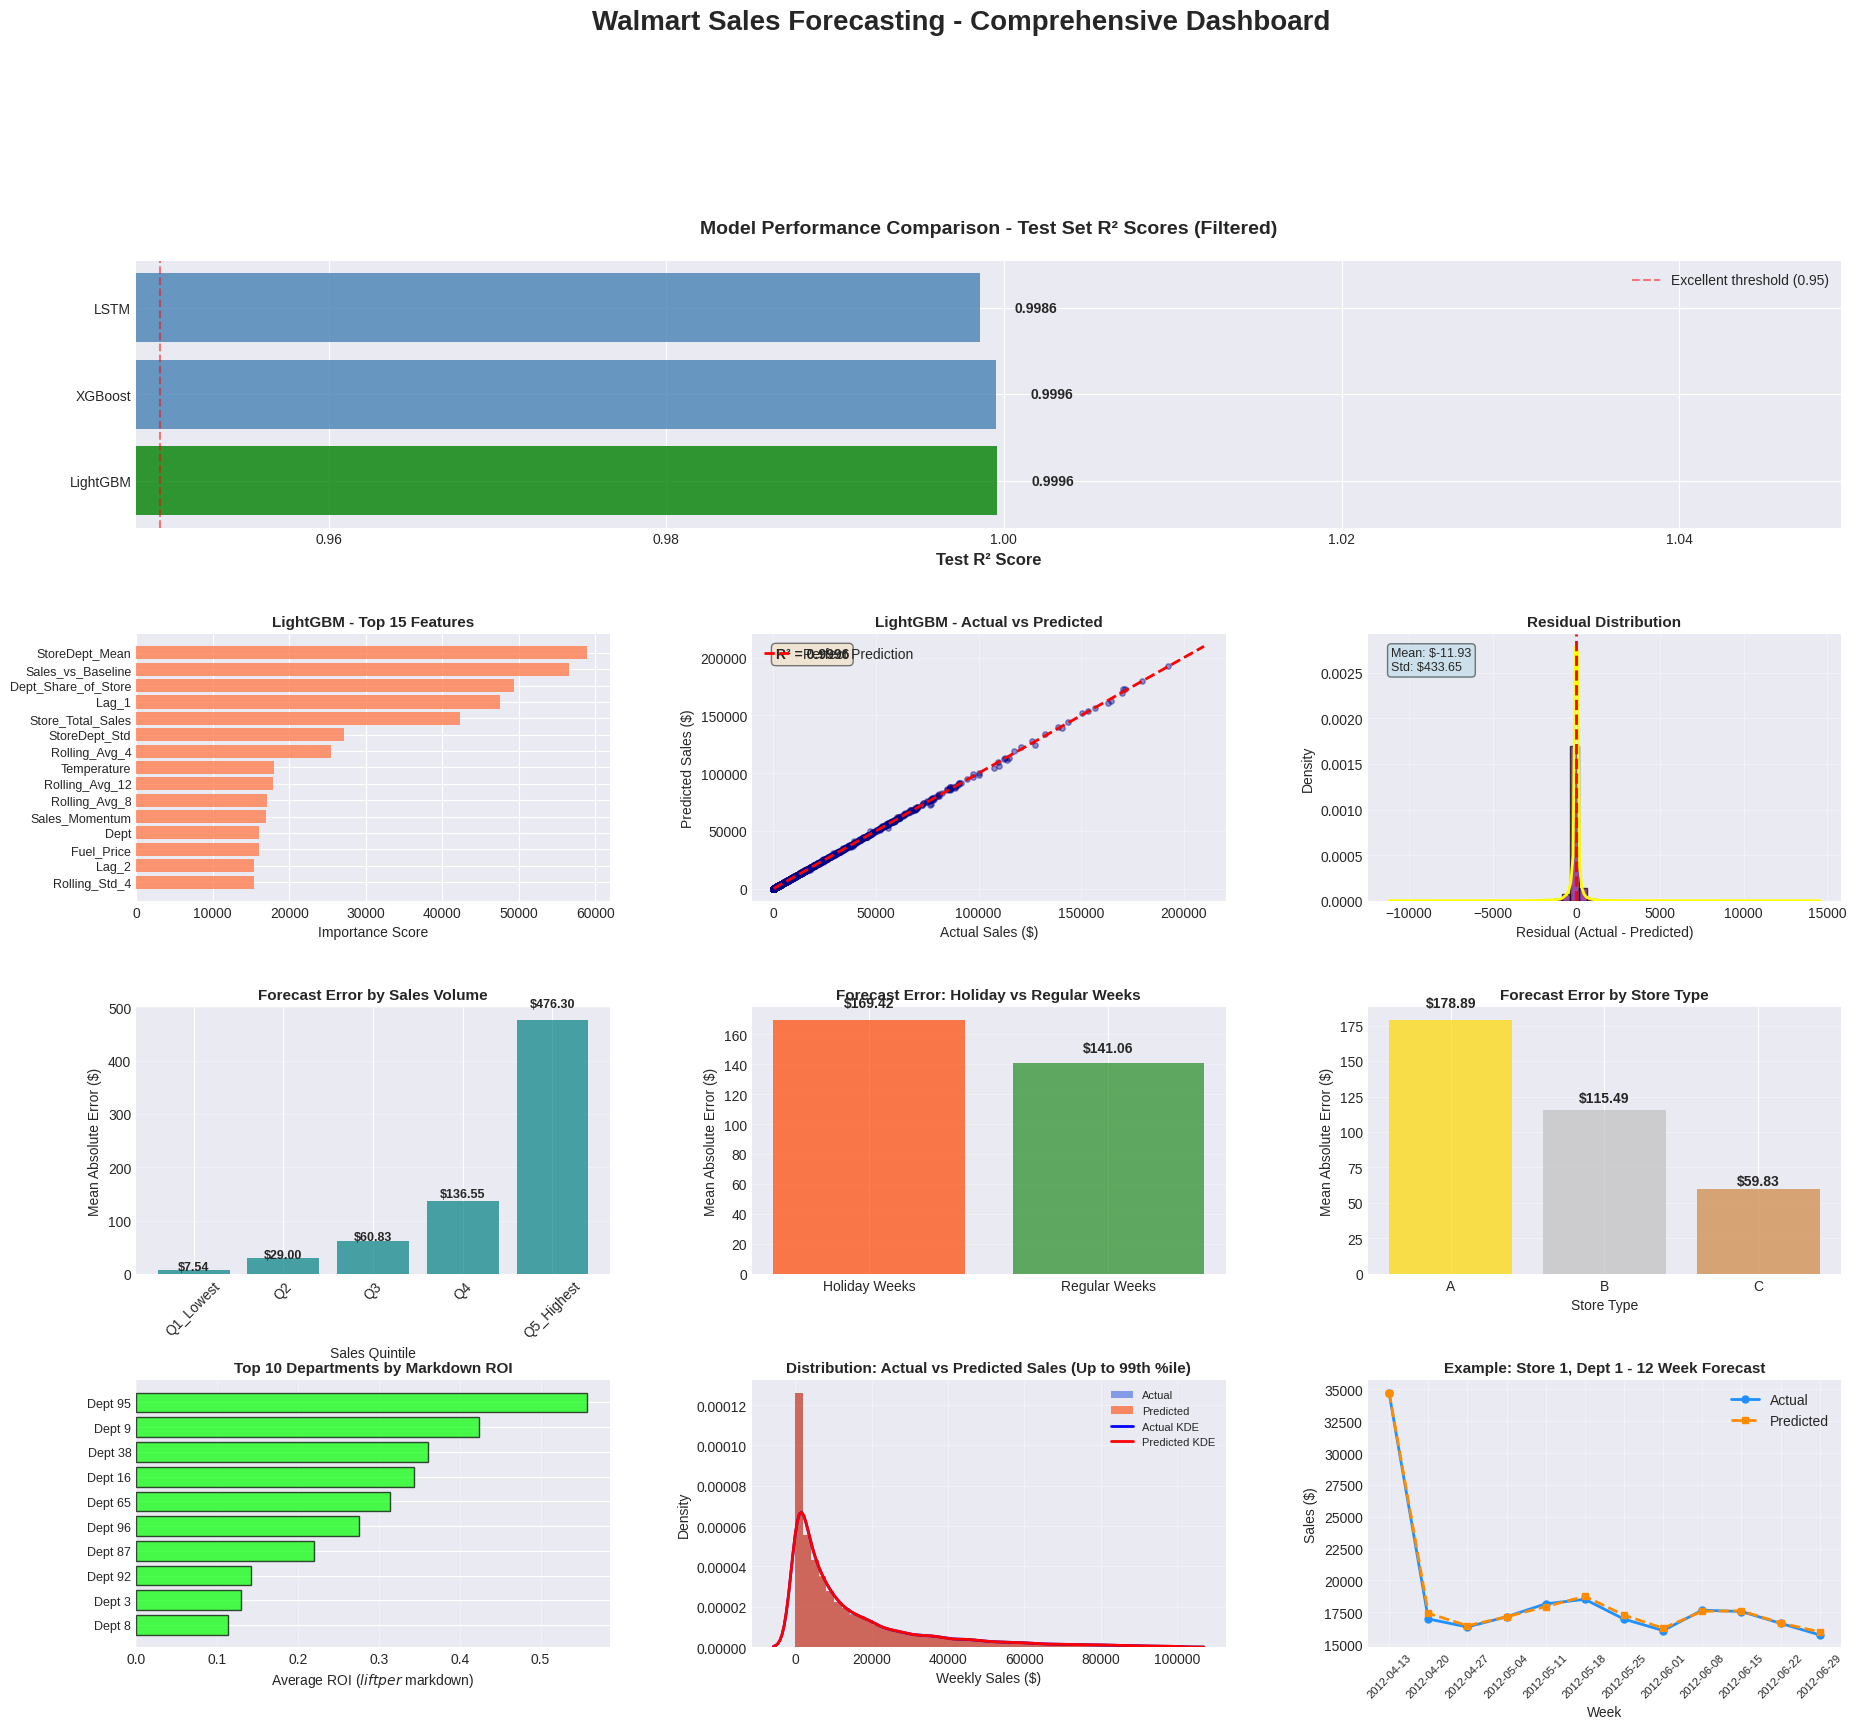

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import numpy as np # Ensure numpy is imported
import pandas as pd # Ensure pandas is imported
import warnings

# Suppress potential warnings from plotting libraries if needed
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)


print("=" * 80)
print("CREATING COMPREHENSIVE VISUALIZATION DASHBOARD (REVISED)")
print("=" * 80)


# --- Robustly determine the best model ---
try:
    # Sort comparison_df if it exists, otherwise use the last key in results
    if 'comparison_df' in locals() and not comparison_df.empty:
         best_model_name = comparison_df.sort_values('Test_R²', ascending=False).iloc[0]['Model']
         # Handle case where Ridge results might skew sorting if not filtered
         valid_models_df = comparison_df[comparison_df['Test_R²'] > 0] # Filter out failed models
         if not valid_models_df.empty:
              best_model_name = valid_models_df.sort_values('Test_R²', ascending=False).iloc[0]['Model']
         else: # Fallback if only Ridge exists or failed
              best_model_name = max(results.keys(), key=lambda k: results[k].get('test_r2', -np.inf))
         print(f"[Dashboard] Best model identified: {best_model_name}")
    else:
        # Fallback if comparison_df doesn't exist
        best_model_name = max(results.keys(), key=lambda k: results[k].get('test_r2', -np.inf))
        print(f"[Dashboard] Best model identified (fallback): {best_model_name}")

    if best_model_name not in results:
        raise KeyError(f"Best model '{best_model_name}' not found in results dictionary.")

    # Get predictions for the best model
    best_predictions = results[best_model_name]['test_pred']
    
except Exception as e:
    print(f"[ERROR] Could not determine best model or get predictions: {e}")
    print("        Please ensure previous cells ran correctly and 'results' dictionary is populated.")
    # Set a default to prevent crashing, although plots might be wrong
    best_model_name = list(results.keys())[0] if results else "Unknown" 
    best_predictions = results.get(best_model_name, {}).get('test_pred', np.array([]))

# --- Prepare data for plots requiring errors/quintiles ---
print("[Dashboard] Preparing data for error analysis plots...")
test_data_with_preds = test_data.copy()
# Ensure y_test_original aligns with test_data index if not already done
if 'y_test_original' not in locals() or len(y_test_original) != len(test_data):
     y_test_original = test_data['Gross_Sales'] # Realign just in case

# Ensure predictions align with test_data index
if len(best_predictions) == len(test_data_with_preds):
     test_data_with_preds[f'{best_model_name}_pred'] = best_predictions
else:
      print(f"[WARN] Length mismatch: test_data ({len(test_data_with_preds)}) vs predictions ({len(best_predictions)}). Error plots might be inaccurate.")
      # Attempt to align based on index if possible, otherwise pad/truncate (less safe)
      pred_series = pd.Series(best_predictions, index=y_test_original.index) # Assume index matches y_test_original
      test_data_with_preds = test_data_with_preds.join(pred_series.rename(f'{best_model_name}_pred'))


test_data_with_preds[f'{best_model_name}_error'] = np.abs(test_data_with_preds['Gross_Sales'] - test_data_with_preds[f'{best_model_name}_pred'])

# Calculate Sales Quintiles safely
try:
    test_data_with_preds['Sales_Quintile'] = pd.qcut(test_data_with_preds['Gross_Sales'], q=5, labels=['Q1_Lowest', 'Q2', 'Q3', 'Q4', 'Q5_Highest'], duplicates='drop')
except ValueError:
    print("[WARN] Could not calculate quintiles accurately due to non-unique bin edges. Using approximate ranks instead.")
    test_data_with_preds['Sales_Rank'] = pd.cut(test_data_with_preds['Gross_Sales'], bins=5, labels=['Rank1', 'Rank2', 'Rank3', 'Rank4', 'Rank5'])
    test_data_with_preds['Sales_Quintile'] = test_data_with_preds['Sales_Rank'] # Use rank as fallback


# --- Create Dashboard ---
print("[Dashboard] Creating plots...")
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

fig = plt.figure(figsize=(22, 18)) # Increased size slightly
gs = GridSpec(4, 3, figure=fig, hspace=0.4, wspace=0.3) # Adjusted spacing

# --- Plot 1: Model Performance Comparison ---
ax1 = fig.add_subplot(gs[0, :])
models = list(results.keys())
# Filter out models with extremely poor performance for visual clarity
valid_models = [m for m in models if results[m].get('test_r2', -np.inf) > -10] # Filter R2 < -10
if not valid_models: valid_models = models # Show all if filtering leaves none

test_r2_scores = [results[m]['test_r2'] for m in valid_models]
colors_performance = ['green' if m == best_model_name else 'steelblue' for m in valid_models]

bars = ax1.barh(valid_models, test_r2_scores, color=colors_performance, alpha=0.8)
ax1.set_xlabel('Test R² Score', fontsize=12, fontweight='bold')
ax1.set_title('Model Performance Comparison - Test Set R² Scores (Filtered)', fontsize=14, fontweight='bold', pad=20)
ax1.axvline(x=0.95, color='red', linestyle='--', alpha=0.5, label='Excellent threshold (0.95)')
ax1.legend()
ax1.set_xlim(left=max(min(test_r2_scores, default=0)-0.05, 0)) # Adjust xlim for better view if scores are high

for i, (bar, score) in enumerate(zip(bars, test_r2_scores)):
    ax1.text(score + 0.002, bar.get_y() + bar.get_height()/2, 
             f'{score:.4f}', va='center', fontweight='bold', fontsize=10)

# --- Plot 2: Feature Importance (Top 15) ---
ax2 = fig.add_subplot(gs[1, 0])
if best_model_name in results and 'feature_importance' in results[best_model_name]:
    feat_importance_df = results[best_model_name]['feature_importance']
    # Clean feature names (remove num__, cat__, etc.)
    feat_importance_df['clean_feature'] = feat_importance_df['feature'].str.split('__').str[-1]
    top_15_features = feat_importance_df.head(15)
    
    ax2.barh(range(len(top_15_features)), top_15_features['importance'], color='coral', alpha=0.8)
    ax2.set_yticks(range(len(top_15_features)))
    ax2.set_yticklabels(top_15_features['clean_feature'], fontsize=9)
    ax2.set_xlabel('Importance Score')
    ax2.set_title(f'{best_model_name} - Top 15 Features', fontsize=11, fontweight='bold')
    ax2.invert_yaxis()
else:
    ax2.text(0.5, 0.5, 'Feature Importance N/A', ha='center', va='center')
    ax2.set_title(f'{best_model_name} - Feature Importance', fontsize=11, fontweight='bold')


# --- Plot 3: Actual vs Predicted (Best Model) ---
ax3 = fig.add_subplot(gs[1, 1])
if len(best_predictions) == len(y_test_original):
    sample_size = min(2000, len(y_test_original))
    sample_indices = np.random.choice(y_test_original.index, sample_size, replace=False) # Use index
    
    ax3.scatter(y_test_original.loc[sample_indices], 
               pd.Series(best_predictions, index=y_test_original.index).loc[sample_indices], # Ensure alignment
               alpha=0.4, s=15, color='darkblue')
    min_val = min(y_test_original.min(), pd.Series(best_predictions).min())
    max_val = max(y_test_original.max(), pd.Series(best_predictions).max())
    ax3.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
    ax3.set_xlabel('Actual Sales ($)', fontsize=10)
    ax3.set_ylabel('Predicted Sales ($)', fontsize=10)
    ax3.set_title(f'{best_model_name} - Actual vs Predicted', fontsize=11, fontweight='bold')
    ax3.legend()
    ax3.text(0.05, 0.95, f'R² = {results[best_model_name]["test_r2"]:.4f}',
             transform=ax3.transAxes, fontsize=10, fontweight='bold',
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    ax3.grid(True, alpha=0.3)
else:
     ax3.text(0.5, 0.5, 'Prediction Length Mismatch', ha='center', va='center')
     ax3.set_title(f'{best_model_name} - Actual vs Predicted', fontsize=11, fontweight='bold')


# --- Plot 4: Residual Distribution ---
ax4 = fig.add_subplot(gs[1, 2])
if len(best_predictions) == len(y_test_original):
    residuals = y_test_original.values - best_predictions
    ax4.hist(residuals, bins=50, color='purple', alpha=0.7, edgecolor='black', density=True)
    sns.kdeplot(residuals, color='yellow', lw=2, ax=ax4) # Add KDE curve
    ax4.axvline(x=0, color='red', linestyle='--', linewidth=2)
    ax4.set_xlabel('Residual (Actual - Predicted)', fontsize=10)
    ax4.set_ylabel('Density', fontsize=10)
    ax4.set_title('Residual Distribution', fontsize=11, fontweight='bold')
    ax4.text(0.05, 0.95, f'Mean: ${residuals.mean():,.2f}\nStd: ${residuals.std():,.2f}',
             transform=ax4.transAxes, fontsize=9,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
    ax4.grid(True, alpha=0.3)
else:
     ax4.text(0.5, 0.5, 'Prediction Length Mismatch', ha='center', va='center')
     ax4.set_title('Residual Distribution', fontsize=11, fontweight='bold')


# --- Plot 5: Error by Sales Quintile ---
ax5 = fig.add_subplot(gs[2, 0])
if f'{best_model_name}_error' in test_data_with_preds.columns and 'Sales_Quintile' in test_data_with_preds.columns:
    quintile_analysis_plot = test_data_with_preds.groupby('Sales_Quintile')[f'{best_model_name}_error'].mean()
    quintile_labels = quintile_analysis_plot.index.astype(str) # Ensure string labels
    quintile_errors = quintile_analysis_plot.values
    
    ax5.bar(quintile_labels, quintile_errors, color='teal', alpha=0.7)
    ax5.set_xlabel('Sales Quintile', fontsize=10)
    ax5.set_ylabel('Mean Absolute Error ($)', fontsize=10)
    ax5.set_title('Forecast Error by Sales Volume', fontsize=11, fontweight='bold')
    ax5.tick_params(axis='x', rotation=45)
    for i, v in enumerate(quintile_errors):
         ax5.text(i, v + v*0.05, f'${v:,.2f}', ha='center', fontweight='bold', fontsize=9)
    ax5.grid(True, axis='y', alpha=0.3)
else:
     ax5.text(0.5, 0.5, 'Quintile/Error Data N/A', ha='center', va='center')
     ax5.set_title('Forecast Error by Sales Volume', fontsize=11, fontweight='bold')


# --- Plot 6: Holiday vs Regular Performance ---
ax6 = fig.add_subplot(gs[2, 1])
if f'{best_model_name}_error' in test_data_with_preds.columns and 'IsHoliday' in test_data_with_preds.columns:
    try:
        holiday_mae = test_data_with_preds[test_data_with_preds['IsHoliday'] == 1][f'{best_model_name}_error'].mean()
        regular_mae = test_data_with_preds[test_data_with_preds['IsHoliday'] == 0][f'{best_model_name}_error'].mean()
        # Handle cases where one group might be empty
        holiday_mae = holiday_mae if pd.notna(holiday_mae) else 0
        regular_mae = regular_mae if pd.notna(regular_mae) else 0

        ax6.bar(['Holiday Weeks', 'Regular Weeks'], [holiday_mae, regular_mae], 
                color=['orangered', 'forestgreen'], alpha=0.7)
        ax6.set_ylabel('Mean Absolute Error ($)', fontsize=10)
        ax6.set_title('Forecast Error: Holiday vs Regular Weeks', fontsize=11, fontweight='bold')
        for i, v in enumerate([holiday_mae, regular_mae]):
            ax6.text(i, v + v*0.05, f'${v:,.2f}', ha='center', fontweight='bold', fontsize=10)
        ax6.grid(True, axis='y', alpha=0.3)
    except Exception as e:
         ax6.text(0.5, 0.5, f'Error plotting holiday data:\n{e}', ha='center', va='center')
         ax6.set_title('Forecast Error: Holiday vs Regular', fontsize=11, fontweight='bold')
else:
     ax6.text(0.5, 0.5, 'Holiday/Error Data N/A', ha='center', va='center')
     ax6.set_title('Forecast Error: Holiday vs Regular', fontsize=11, fontweight='bold')


# --- Plot 7: Store Type Performance ---
ax7 = fig.add_subplot(gs[2, 2])
if f'{best_model_name}_error' in test_data_with_preds.columns and 'Type' in test_data_with_preds.columns:
    try:
        store_type_analysis = test_data_with_preds.groupby('Type')[f'{best_model_name}_error'].mean()
        store_types = store_type_analysis.index.astype(str)
        store_type_errors = store_type_analysis.values
        
        ax7.bar(store_types, store_type_errors, color=['gold', 'silver', 'peru'], alpha=0.7) # Changed brown color
        ax7.set_xlabel('Store Type', fontsize=10)
        ax7.set_ylabel('Mean Absolute Error ($)', fontsize=10)
        ax7.set_title('Forecast Error by Store Type', fontsize=11, fontweight='bold')
        for i, v in enumerate(store_type_errors):
            ax7.text(i, v + v*0.05, f'${v:,.2f}', ha='center', fontweight='bold', fontsize=10)
        ax7.grid(True, axis='y', alpha=0.3)
    except Exception as e:
         ax7.text(0.5, 0.5, f'Error plotting type data:\n{e}', ha='center', va='center')
         ax7.set_title('Forecast Error by Store Type', fontsize=11, fontweight='bold')
else:
     ax7.text(0.5, 0.5, 'Type/Error Data N/A', ha='center', va='center')
     ax7.set_title('Forecast Error by Store Type', fontsize=11, fontweight='bold')


# --- Plot 8: Markdown ROI by Department (Top 10) ---
ax8 = fig.add_subplot(gs[3, 0])
if 'markdown_roi' in locals() and not markdown_roi.empty:
    top_roi_depts = markdown_roi.nlargest(10, 'Avg_ROI') # Use nlargest
    
    ax8.barh(range(len(top_roi_depts)), top_roi_depts['Avg_ROI'], color='lime', alpha=0.7, edgecolor='black')
    ax8.set_yticks(range(len(top_roi_depts)))
    # Use the 'Dept' column directly, ensuring it's string
    ax8.set_yticklabels([f"Dept {d}" for d in top_roi_depts['Dept'].astype(str)], fontsize=9)
    ax8.set_xlabel('Average ROI ($ lift per $ markdown)', fontsize=10)
    ax8.set_title('Top 10 Departments by Markdown ROI', fontsize=11, fontweight='bold')
    ax8.invert_yaxis()
    ax8.grid(True, axis='x', alpha=0.3)
else:
    ax8.text(0.5, 0.5, 'Markdown ROI Data N/A', ha='center', va='center')
    ax8.set_title('Top 10 Depts by Markdown ROI', fontsize=11, fontweight='bold')


# --- Plot 9: Sales Distribution: Actual vs Predicted ---
ax9 = fig.add_subplot(gs[3, 1])
if len(best_predictions) == len(y_test_original):
    # Limit range for better visualization if there are extreme outliers
    plot_limit = y_test_original.quantile(0.99) # Show up to 99th percentile
    
    ax9.hist(y_test_original[y_test_original < plot_limit], bins=50, alpha=0.6, label='Actual', color='royalblue', density=True)
    ax9.hist(best_predictions[best_predictions < plot_limit], bins=50, alpha=0.6, label='Predicted', color='orangered', density=True)
    
    sns.kdeplot(y_test_original[y_test_original < plot_limit], color='blue', lw=2, ax=ax9, label='Actual KDE')
    sns.kdeplot(best_predictions[best_predictions < plot_limit], color='red', lw=2, ax=ax9, label='Predicted KDE')
    
    ax9.set_xlabel('Weekly Sales ($)', fontsize=10)
    ax9.set_ylabel('Density', fontsize=10)
    ax9.set_title('Distribution: Actual vs Predicted Sales (Up to 99th %ile)', fontsize=11, fontweight='bold')
    ax9.legend(fontsize=8)
    ax9.grid(True, alpha=0.3)
else:
     ax9.text(0.5, 0.5, 'Prediction Length Mismatch', ha='center', va='center')
     ax9.set_title('Distribution: Actual vs Predicted', fontsize=11, fontweight='bold')


# --- Plot 10: Time Series: Sample Store-Dept Forecast ---
ax10 = fig.add_subplot(gs[3, 2])
sample_store = 1
sample_dept = 1
# Ensure test_data has datetime index or Date column
if 'Date' not in test_data.columns: test_data['Date'] = test_data.index
sample_store_dept = test_data[(test_data['Store'] == sample_store) & (test_data['Dept'] == sample_dept)].sort_values('Date').head(12)

if not sample_store_dept.empty and len(best_predictions) == len(y_test_original):
    # Ensure prediction series has the same index as y_test_original
    pred_series = pd.Series(best_predictions, index=y_test_original.index)
    
    # Select predictions corresponding to the sample data's index
    sample_preds = pred_series.loc[sample_store_dept.index]
    
    # Use Date for x-axis labels if available
    x_axis = sample_store_dept['Date'].dt.strftime('%Y-%m-%d').values if 'Date' in sample_store_dept.columns else range(len(sample_store_dept))

    ax10.plot(x_axis, sample_store_dept['Gross_Sales'].values, 'o-', 
             label='Actual', linewidth=2, markersize=5, color='dodgerblue')
    ax10.plot(x_axis, sample_preds.values, 's--',
             label='Predicted', linewidth=2, markersize=5, color='darkorange')
             
    ax10.set_xlabel('Week', fontsize=10)
    ax10.set_ylabel('Sales ($)', fontsize=10)
    ax10.set_title(f'Example: Store {sample_store}, Dept {sample_dept} - 12 Week Forecast', fontsize=11, fontweight='bold')
    ax10.legend()
    ax10.grid(True, alpha=0.3)
    ax10.tick_params(axis='x', rotation=45, labelsize=8)
else:
    ax10.text(0.5, 0.5, 'Sample Data N/A or Prediction Mismatch', ha='center', va='center')
    ax10.set_title(f'Example: Store {sample_store}, Dept {sample_dept}', fontsize=11, fontweight='bold')

# --- Overall Title & Saving ---
fig.suptitle('Walmart Sales Forecasting - Comprehensive Dashboard', 
             fontsize=20, fontweight='bold', y=1.02) # Adjusted y position

# Ensure model_dir exists before saving
if 'model_dir' in locals() and os.path.isdir(model_dir):
     try:
         save_path = f'{model_dir}/comprehensive_dashboard.png'
         plt.savefig(save_path, dpi=300, bbox_inches='tight')
         print(f"\n✓ Dashboard saved to {save_path}")
     except Exception as e:
         print(f"\n[ERROR] Failed to save dashboard image: {e}")
else:
     print("\n[WARN] 'model_dir' not found or not a directory. Skipping saving dashboard image.")

plt.show()

# Clean up warnings filter if needed
warnings.filterwarnings('default', category=FutureWarning)
warnings.filterwarnings('default', category=UserWarning)

In [1]:
!zip -r /kaggle/working/output_all.zip /kaggle/working/walmart_sales_model_20251027_155246

  adding: kaggle/working/walmart_sales_model_20251027_155246/ (stored 0%)
  adding: kaggle/working/walmart_sales_model_20251027_155246/holiday_lifts.pkl (deflated 38%)
  adding: kaggle/working/walmart_sales_model_20251027_155246/executive_summary.txt (deflated 57%)
  adding: kaggle/working/walmart_sales_model_20251027_155246/store_clusters.csv (deflated 46%)
  adding: kaggle/working/walmart_sales_model_20251027_155246/monitoring_config.json (deflated 34%)
  adding: kaggle/working/walmart_sales_model_20251027_155246/metadata.json (deflated 58%)
  adding: kaggle/working/walmart_sales_model_20251027_155246/store_dept_baselines.pkl (deflated 28%)
  adding: kaggle/working/walmart_sales_model_20251027_155246/categorical_features.pkl (deflated 10%)
  adding: kaggle/working/walmart_sales_model_20251027_155246/numeric_features.pkl (deflated 43%)
  adding: kaggle/working/walmart_sales_model_20251027_155246/model.pkl (deflated 62%)
  adding: kaggle/working/walmart_sales_model_20251027_155246/pred